In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("fivethirtyeight")


In [2]:
data=pd.read_csv("C:/Users/Asus-2020/Downloads/marketing_campaign.csv", sep="\t")

In [3]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
data.shape

(2240, 29)

In [5]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
data.drop('ID', axis=1, inplace=True)

In [8]:
data.drop(["Z_Revenue", "Z_CostContact", 'Dt_Customer'], axis=1, inplace=True)

In [9]:
categoricals = ["Education", 'Marital_Status']
numericals = []
for col in data.columns:
    if not col in categoricals:
        numericals.append(col)

23


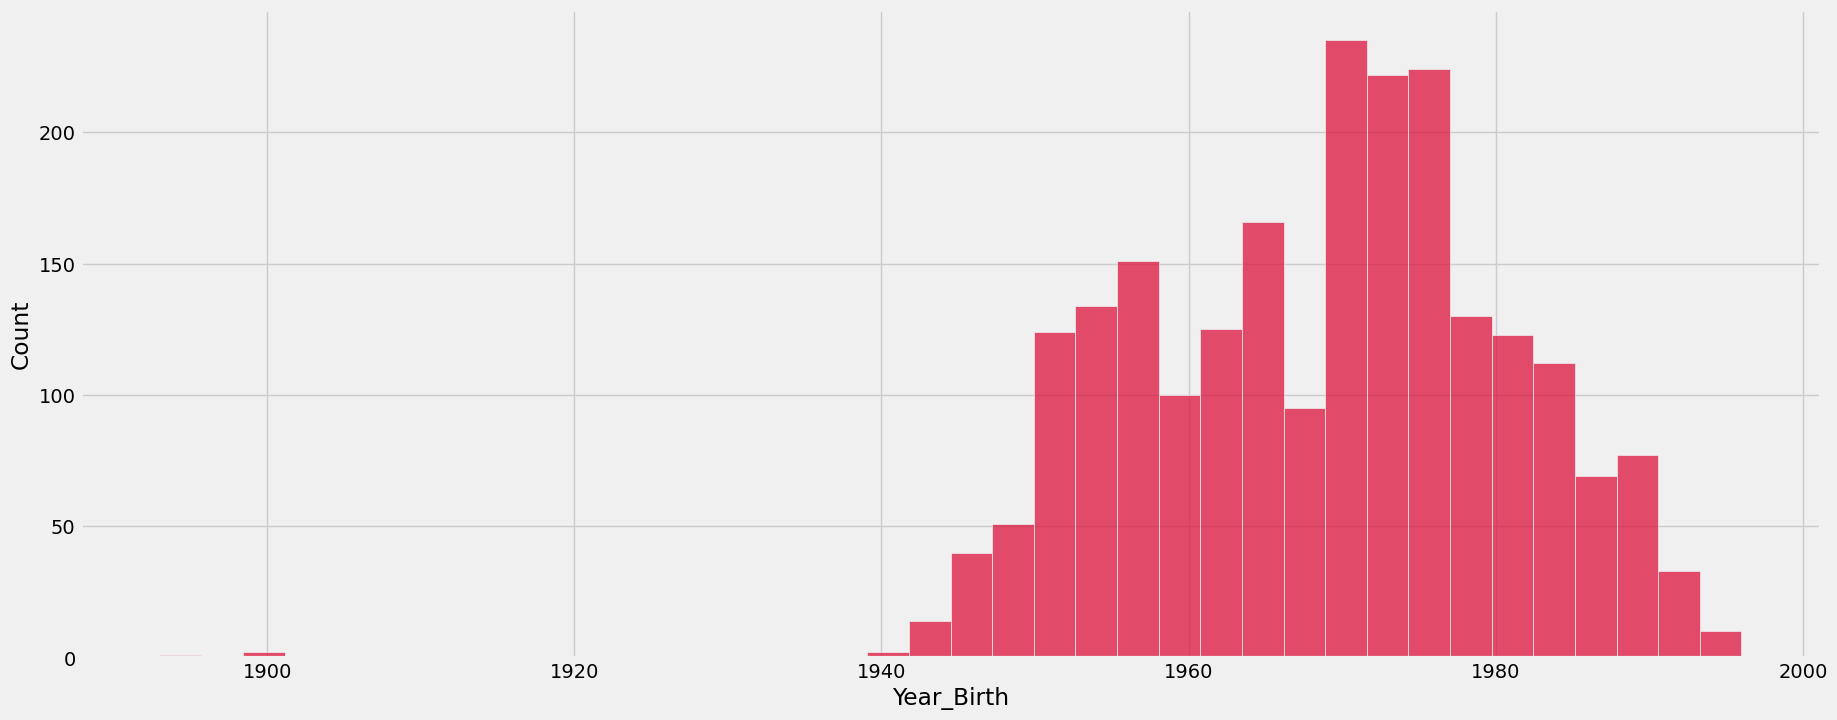

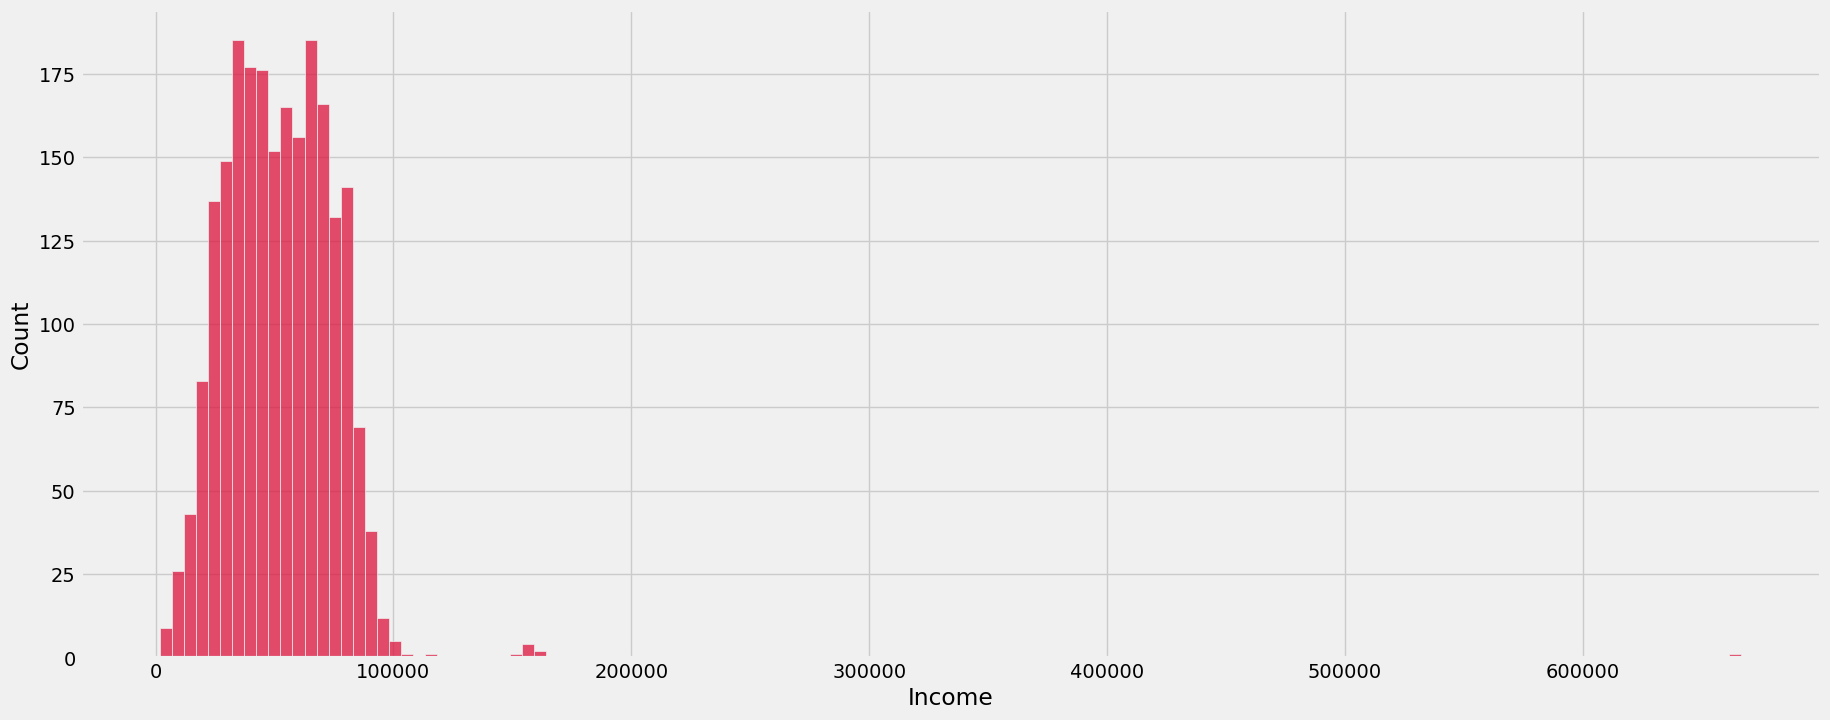

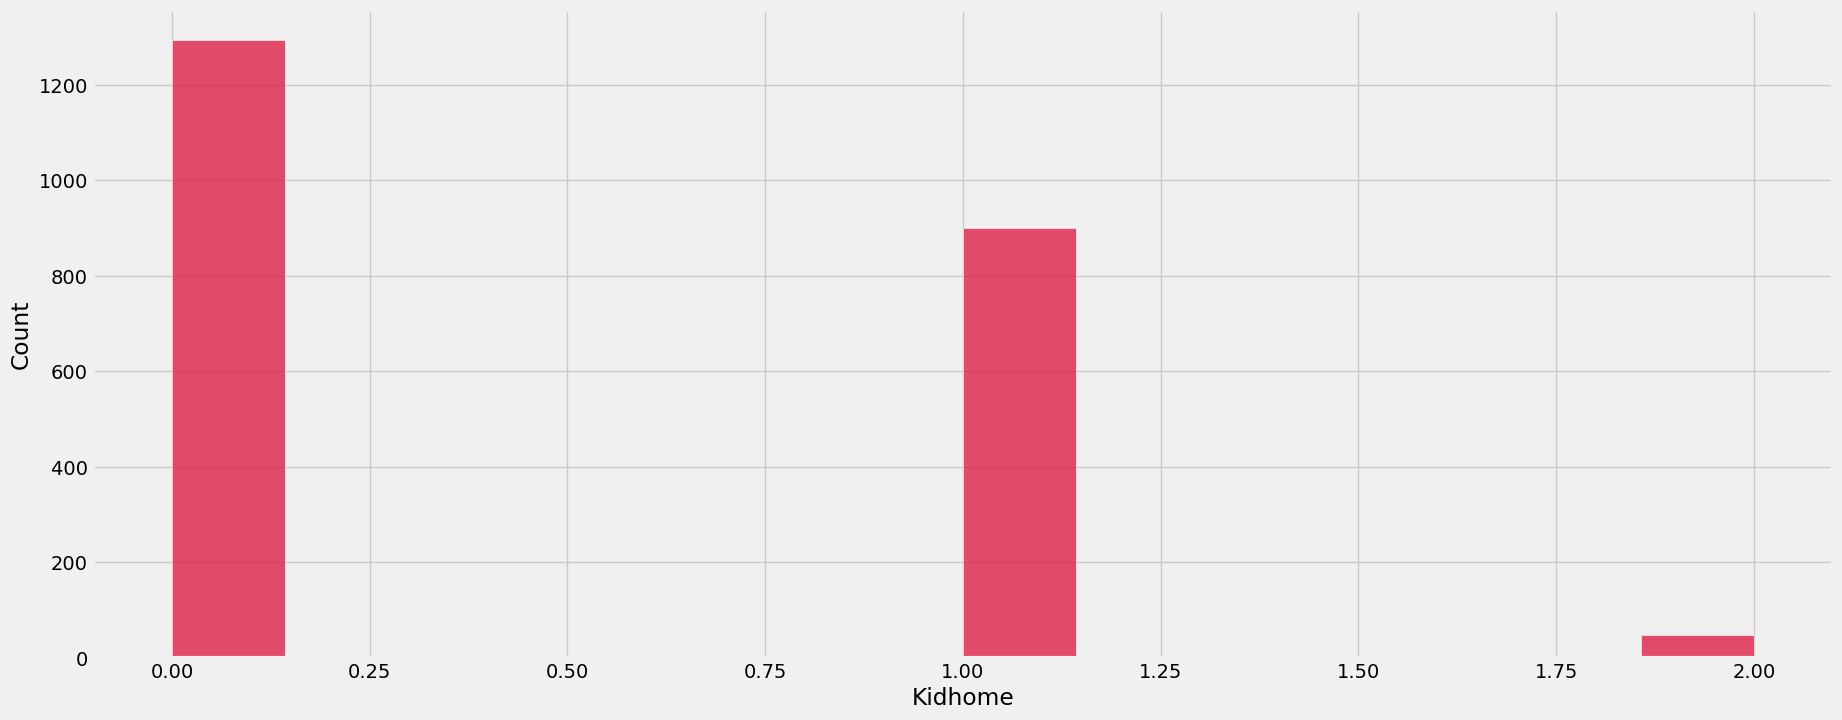

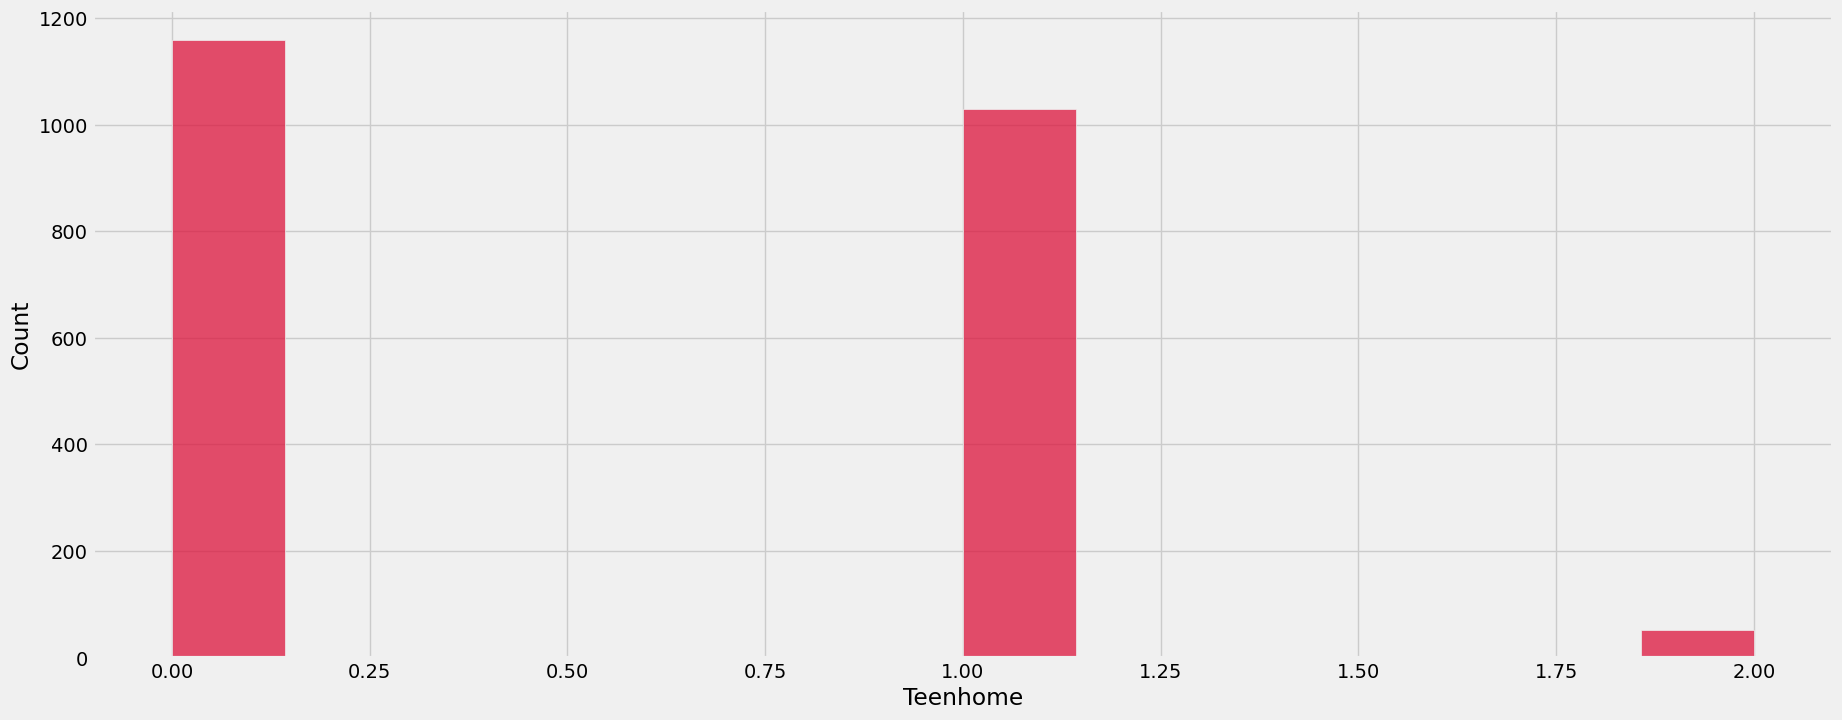

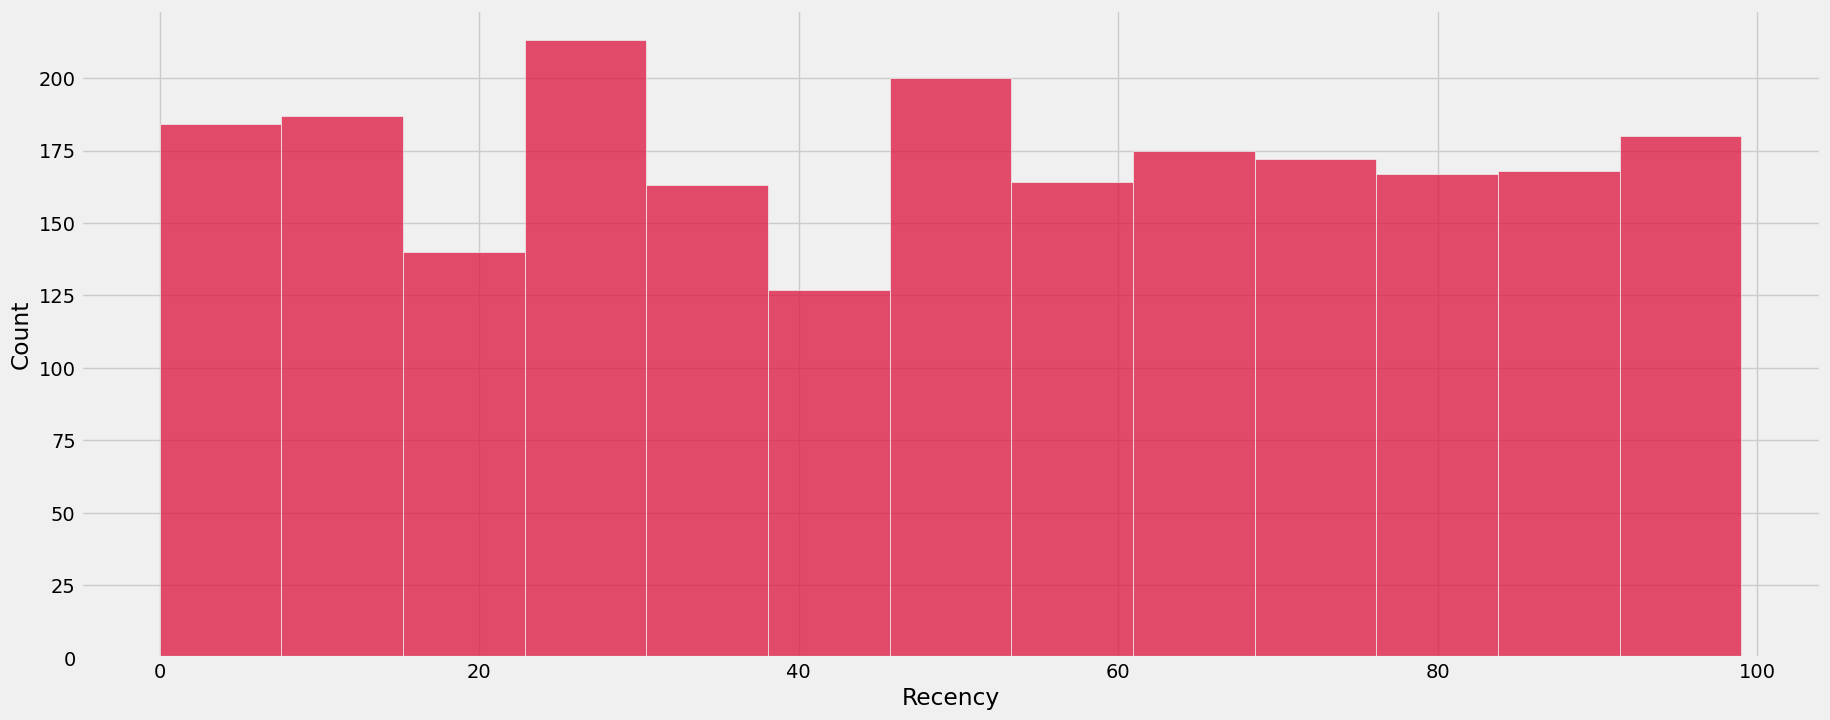

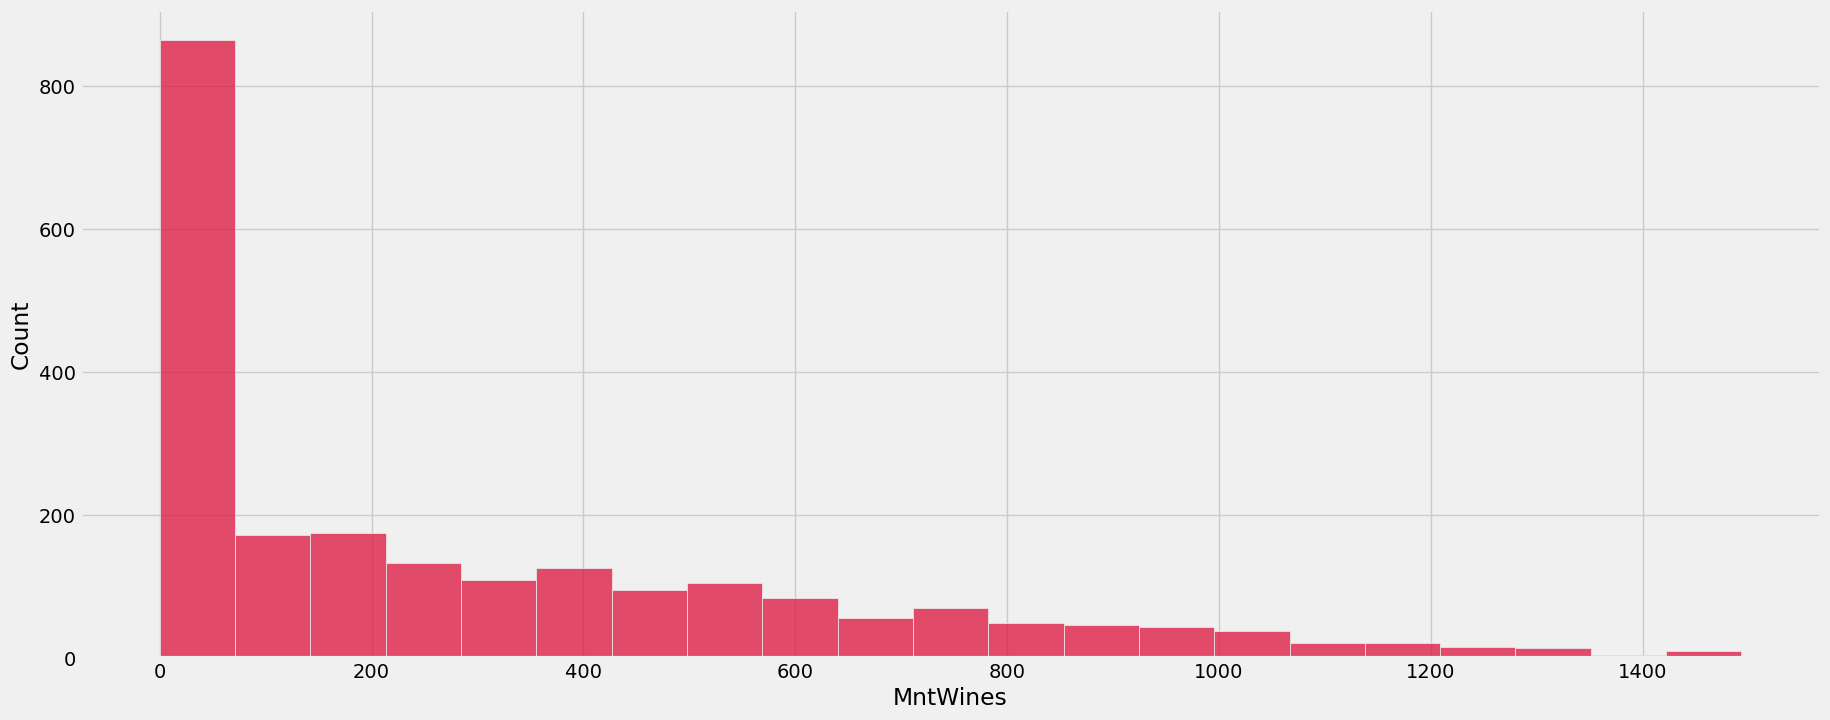

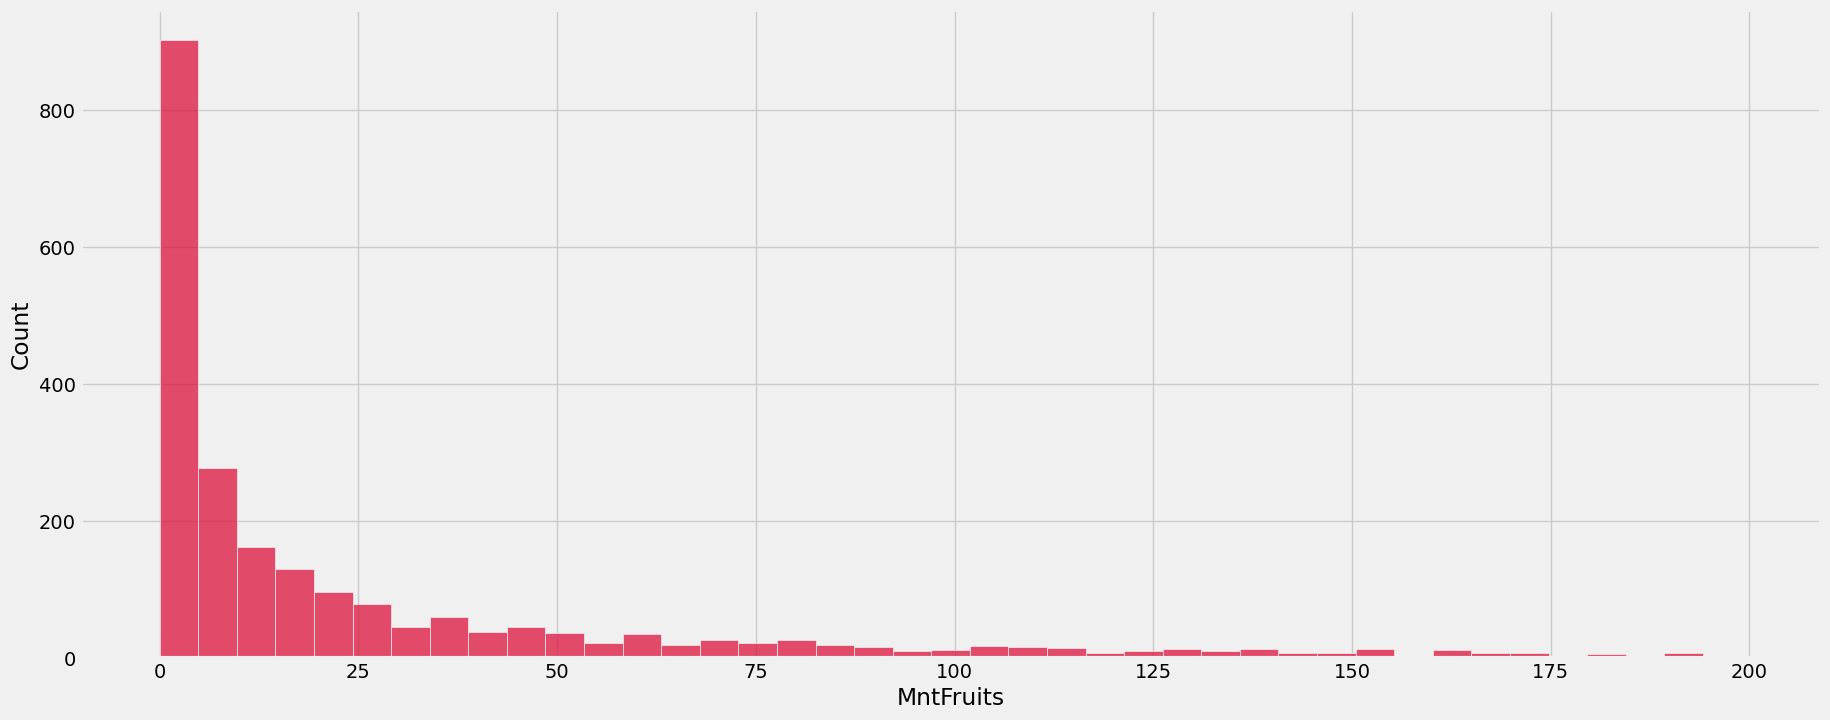

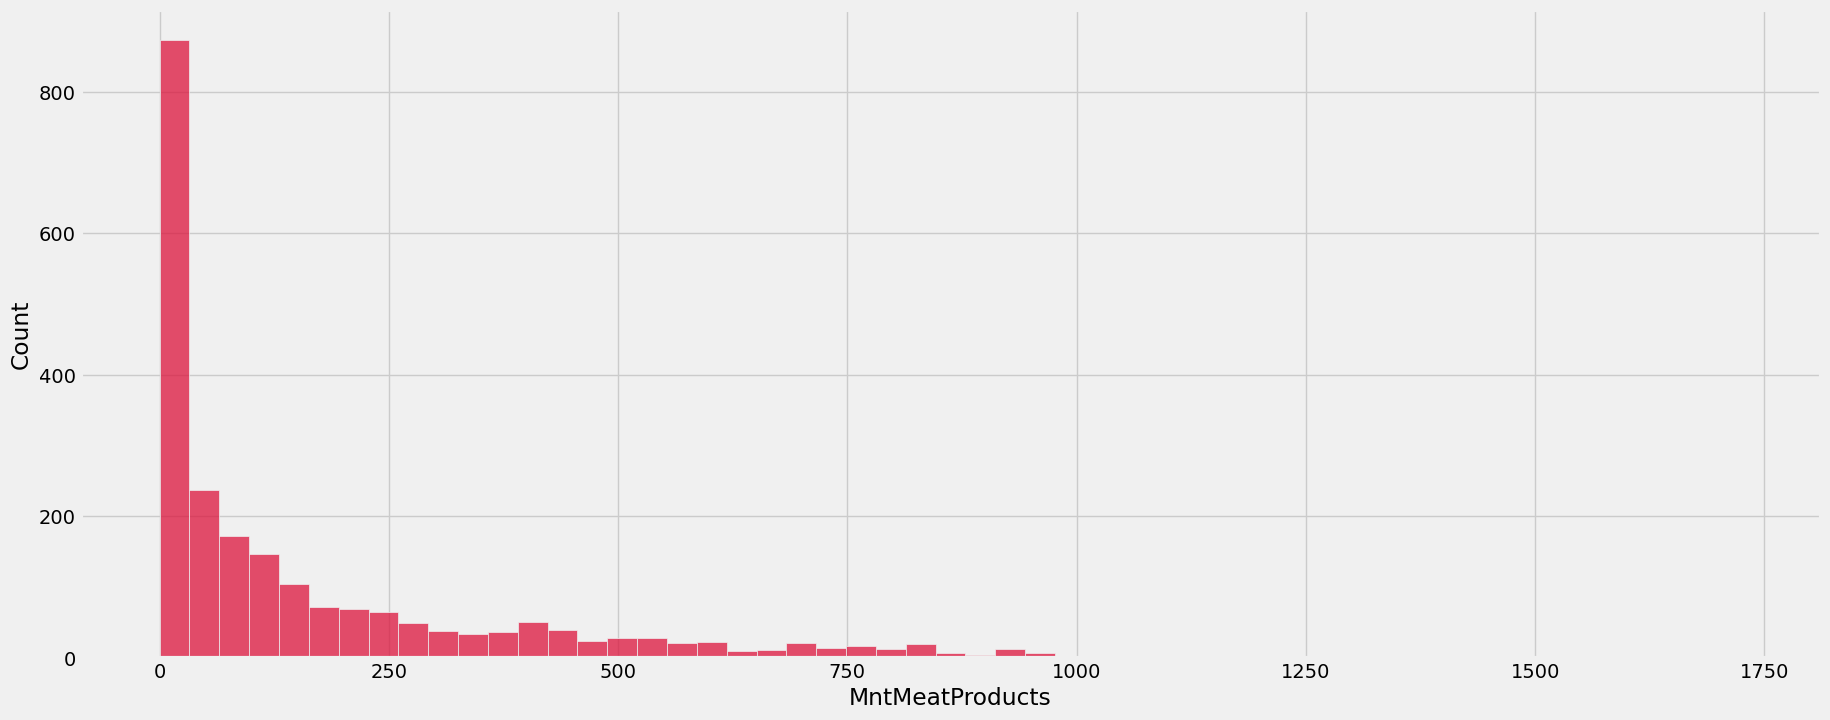

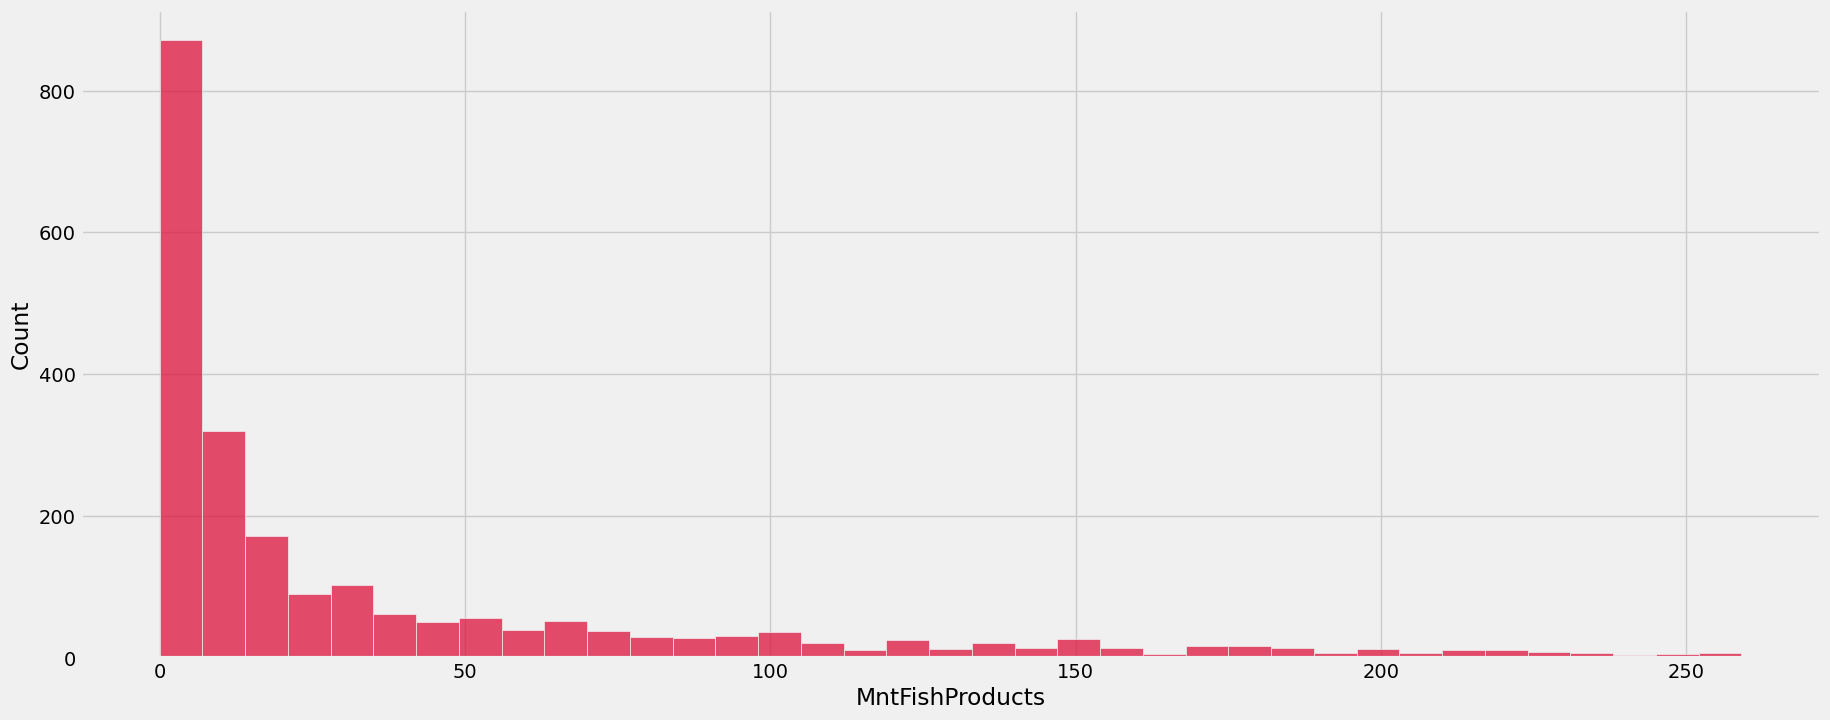

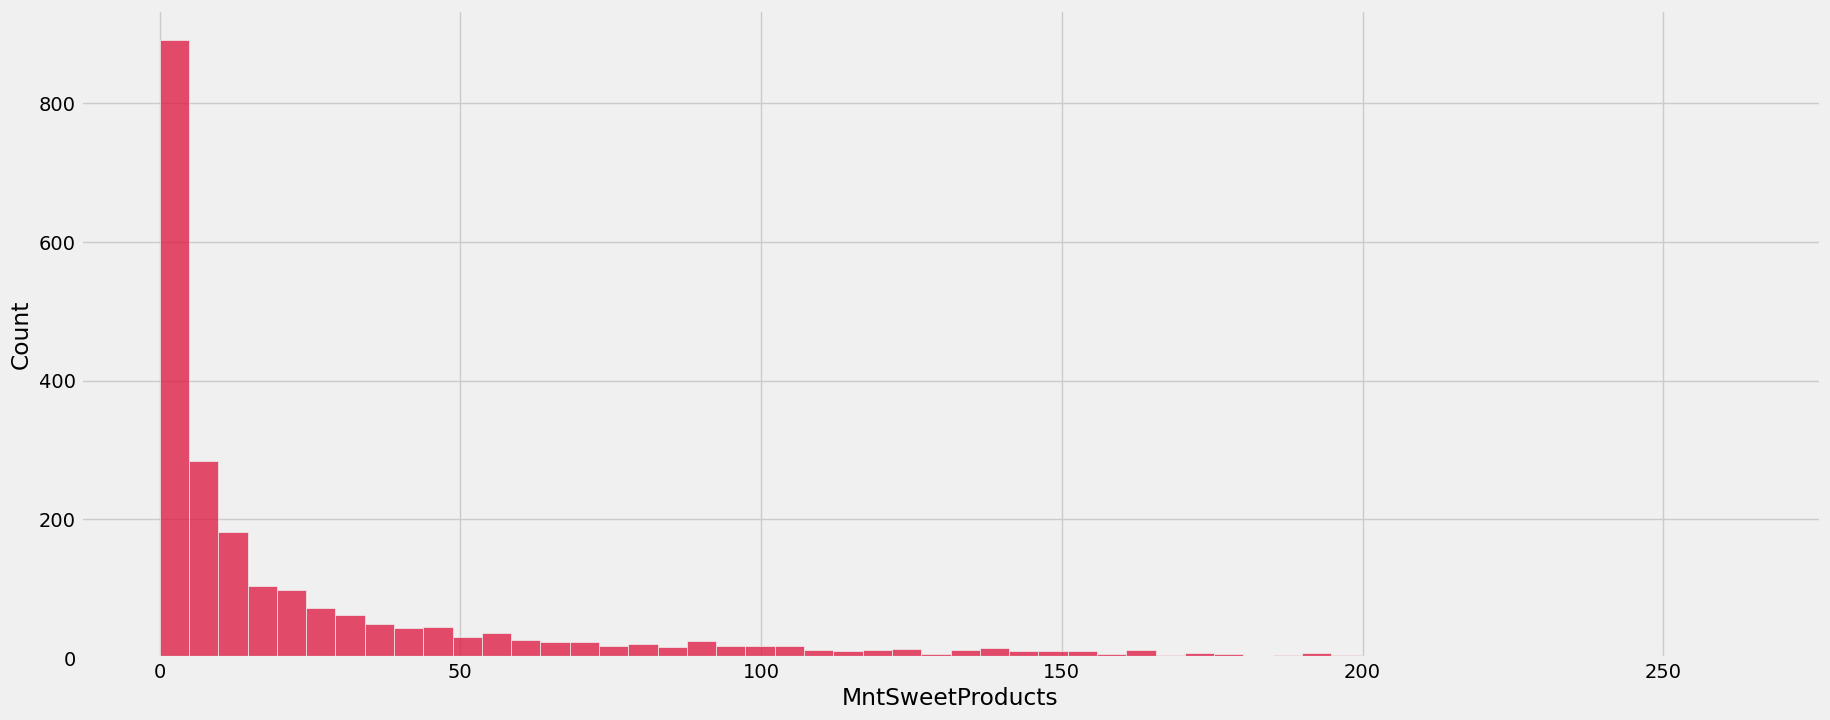

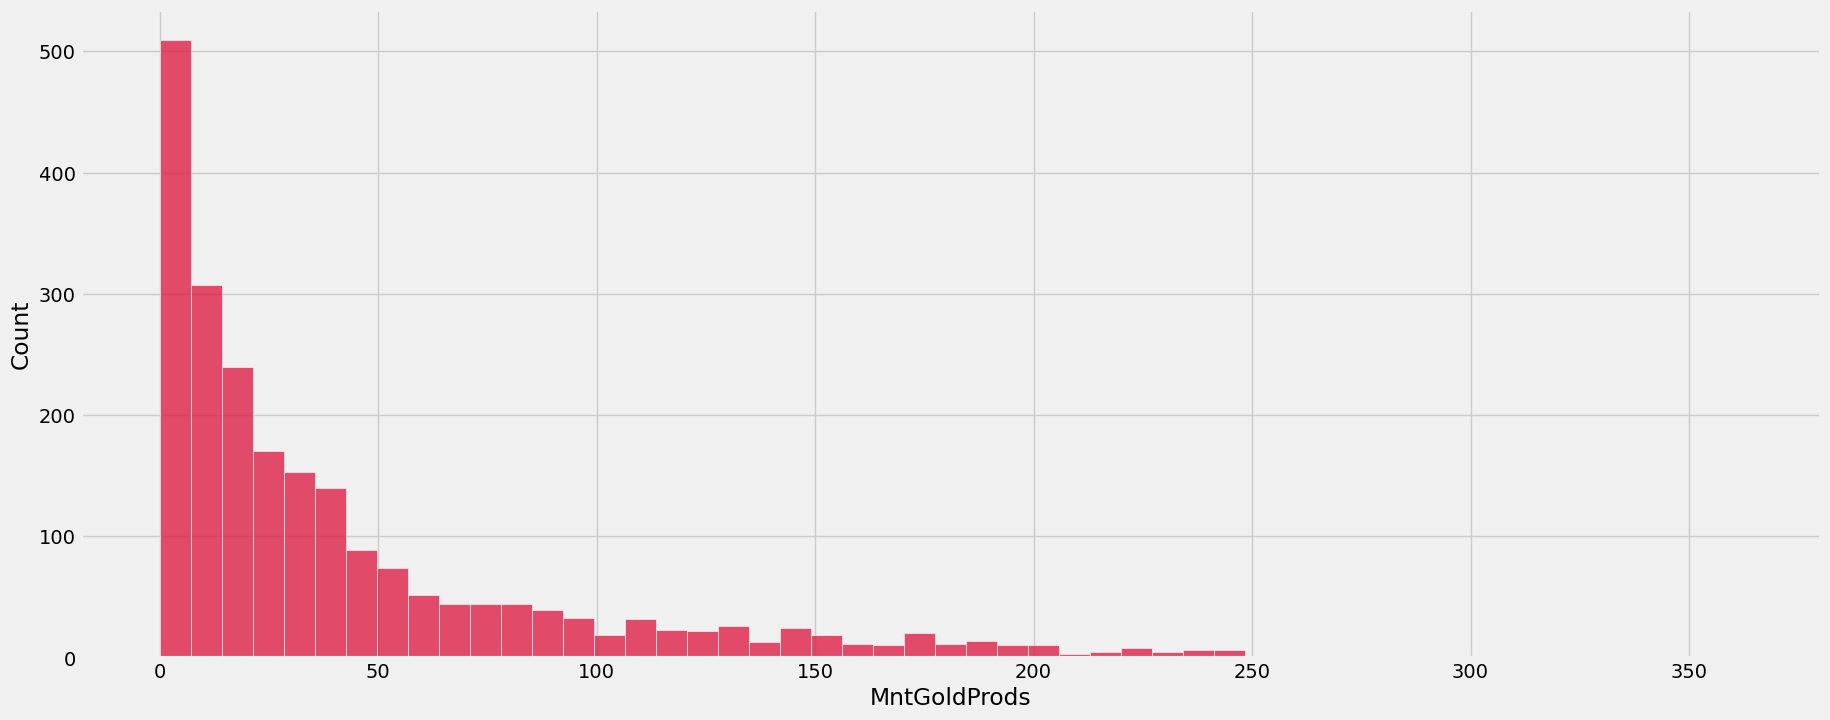

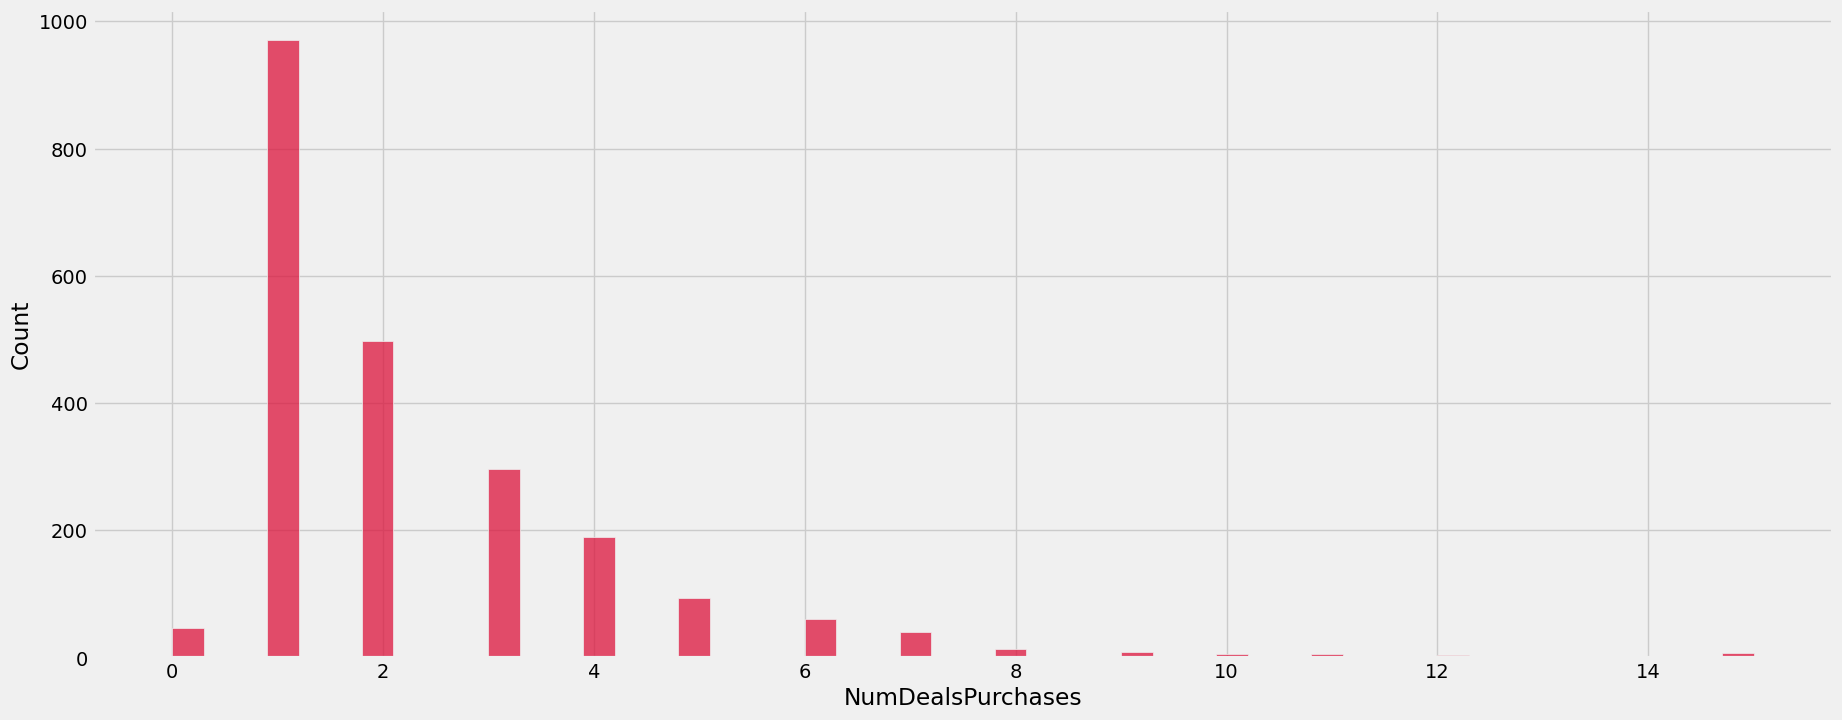

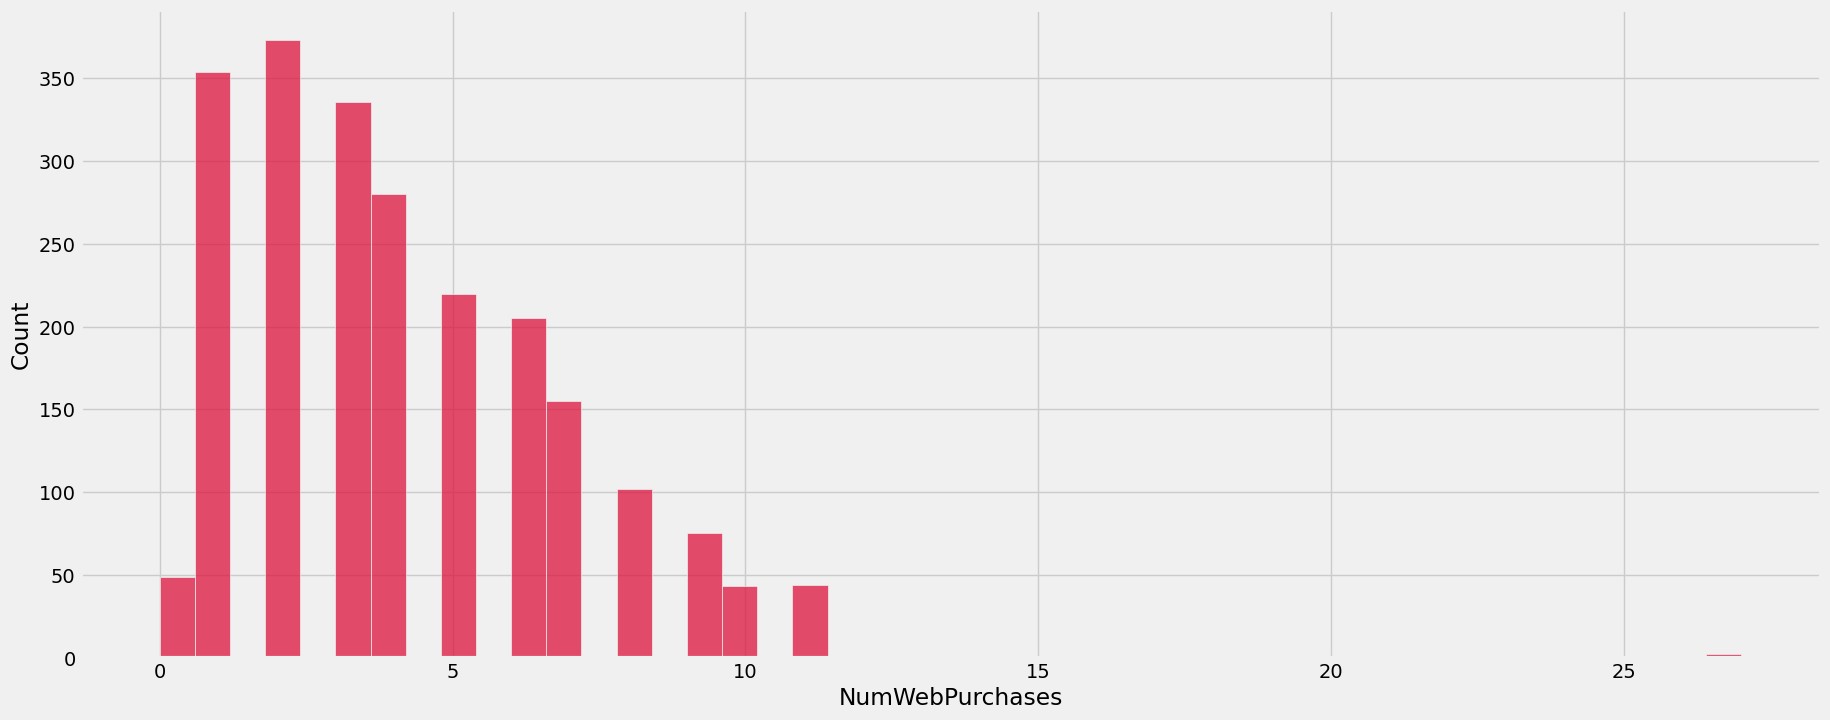

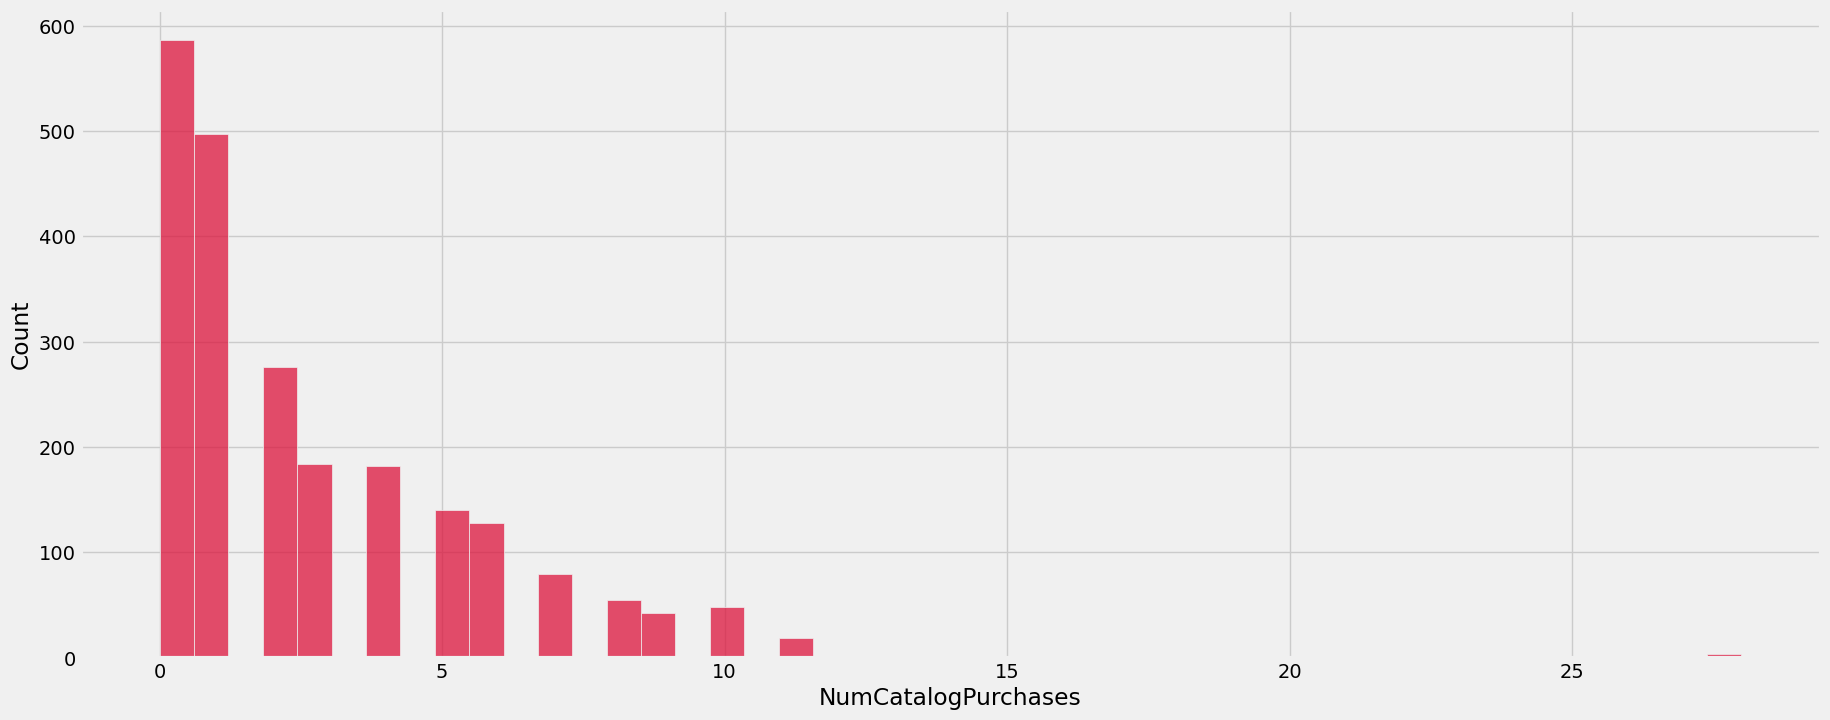

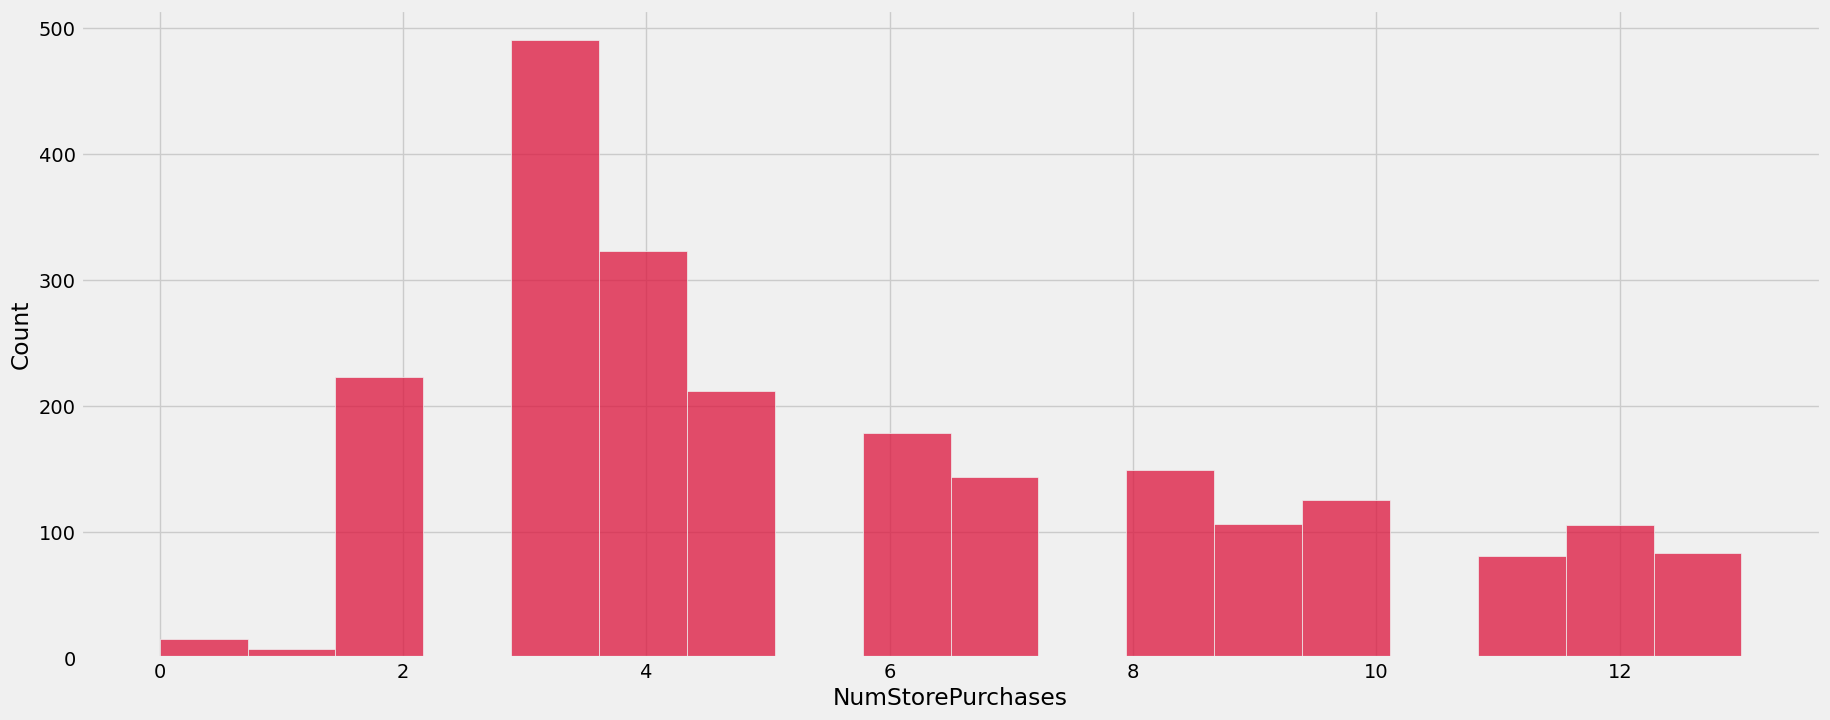

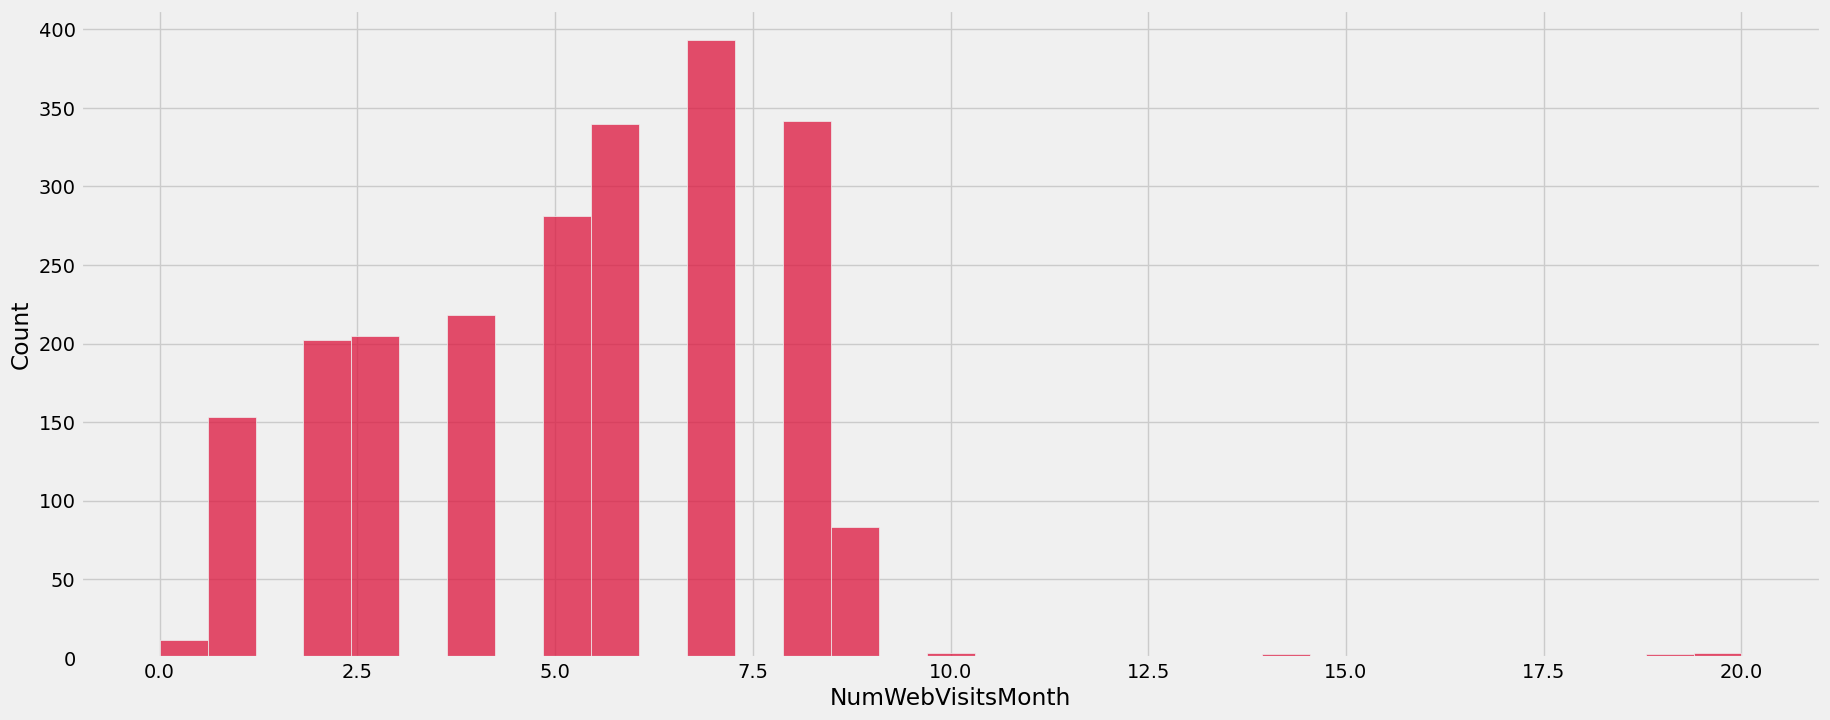

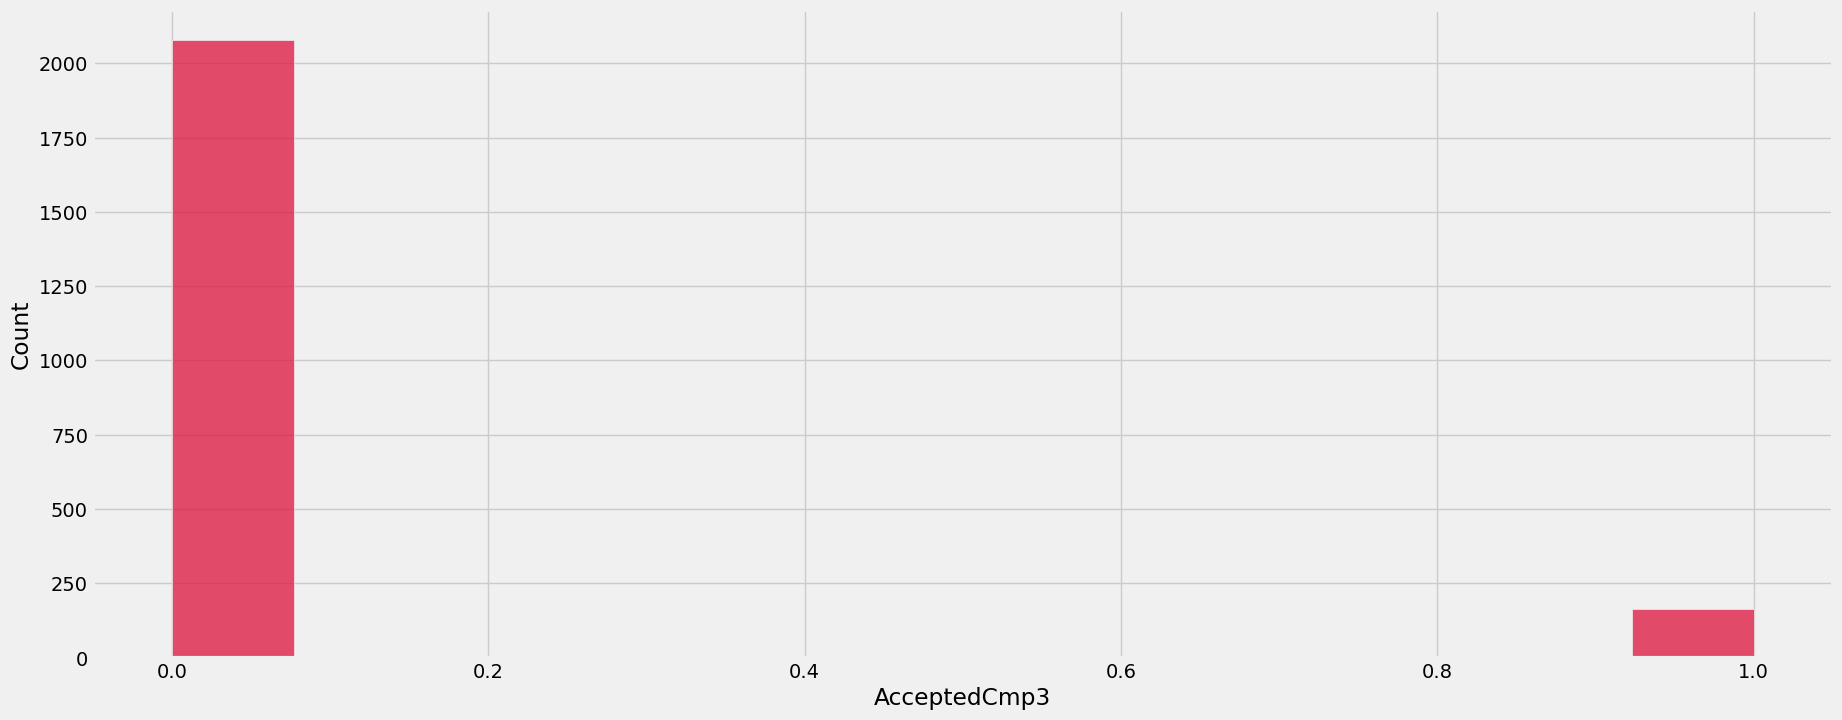

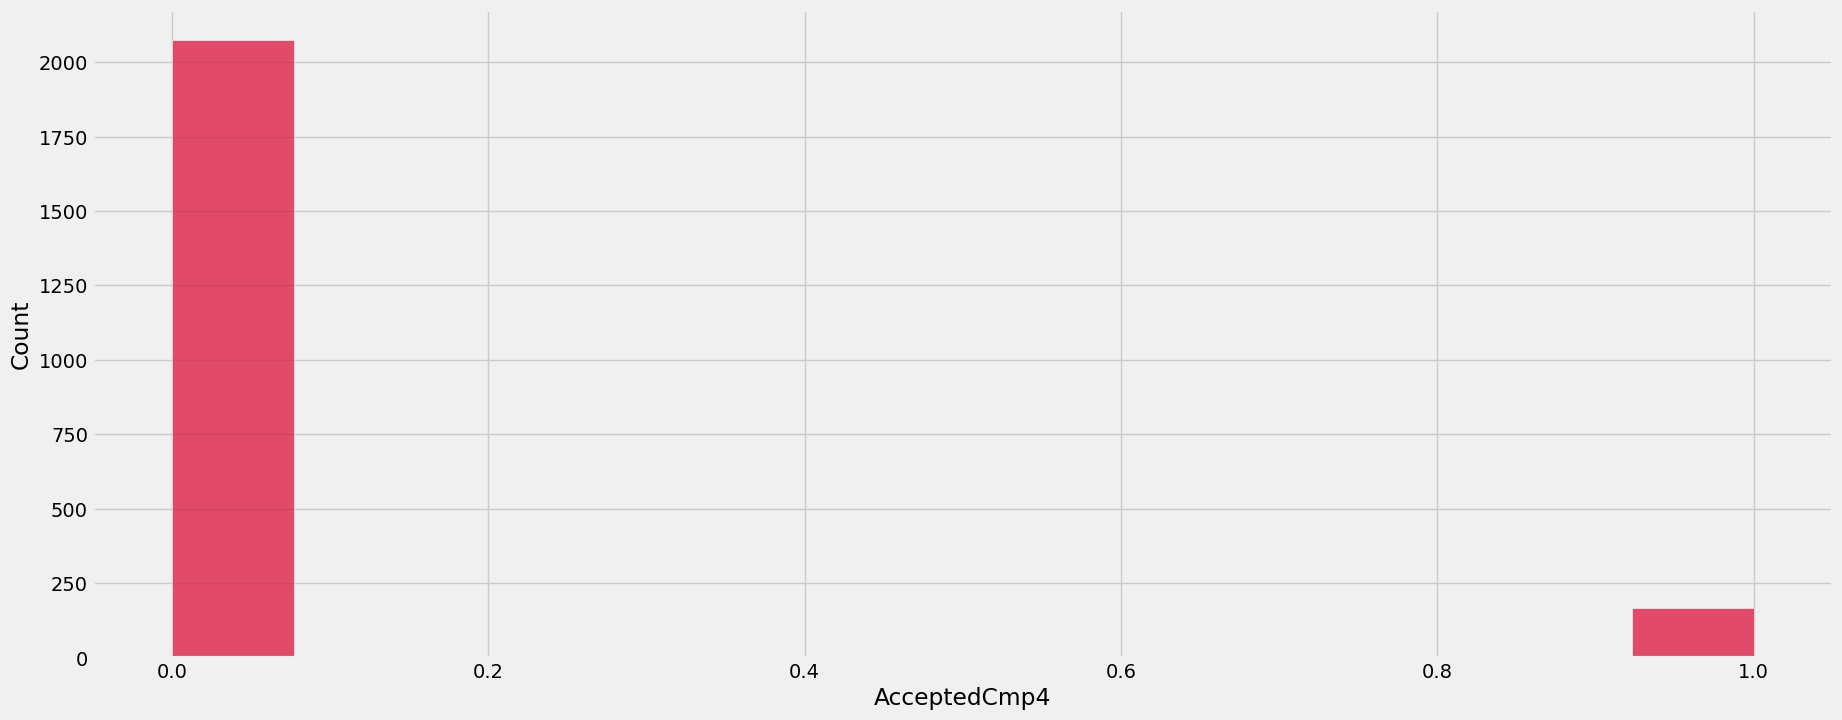

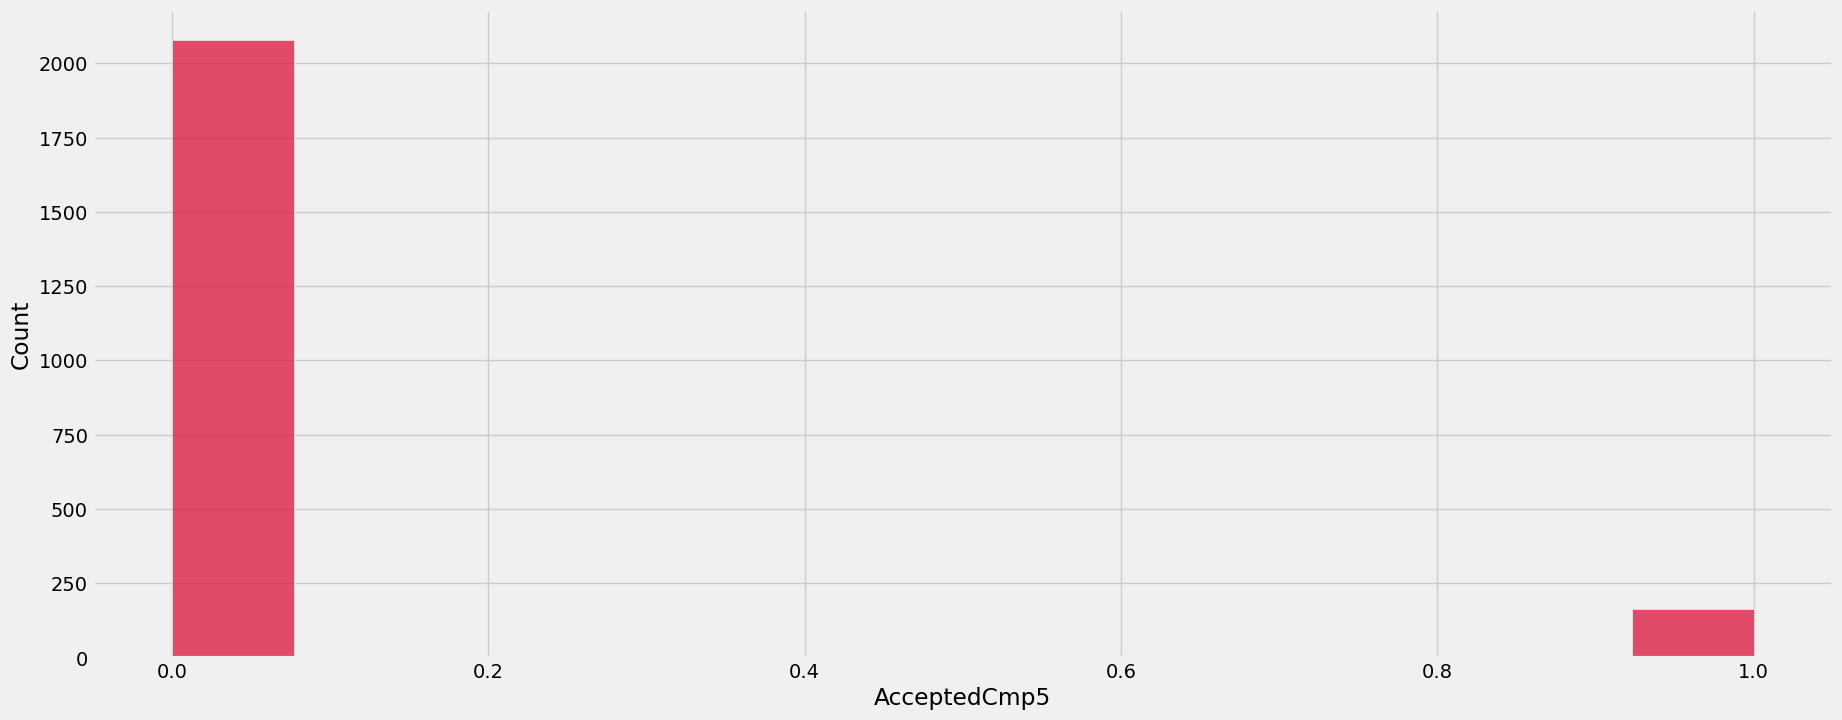

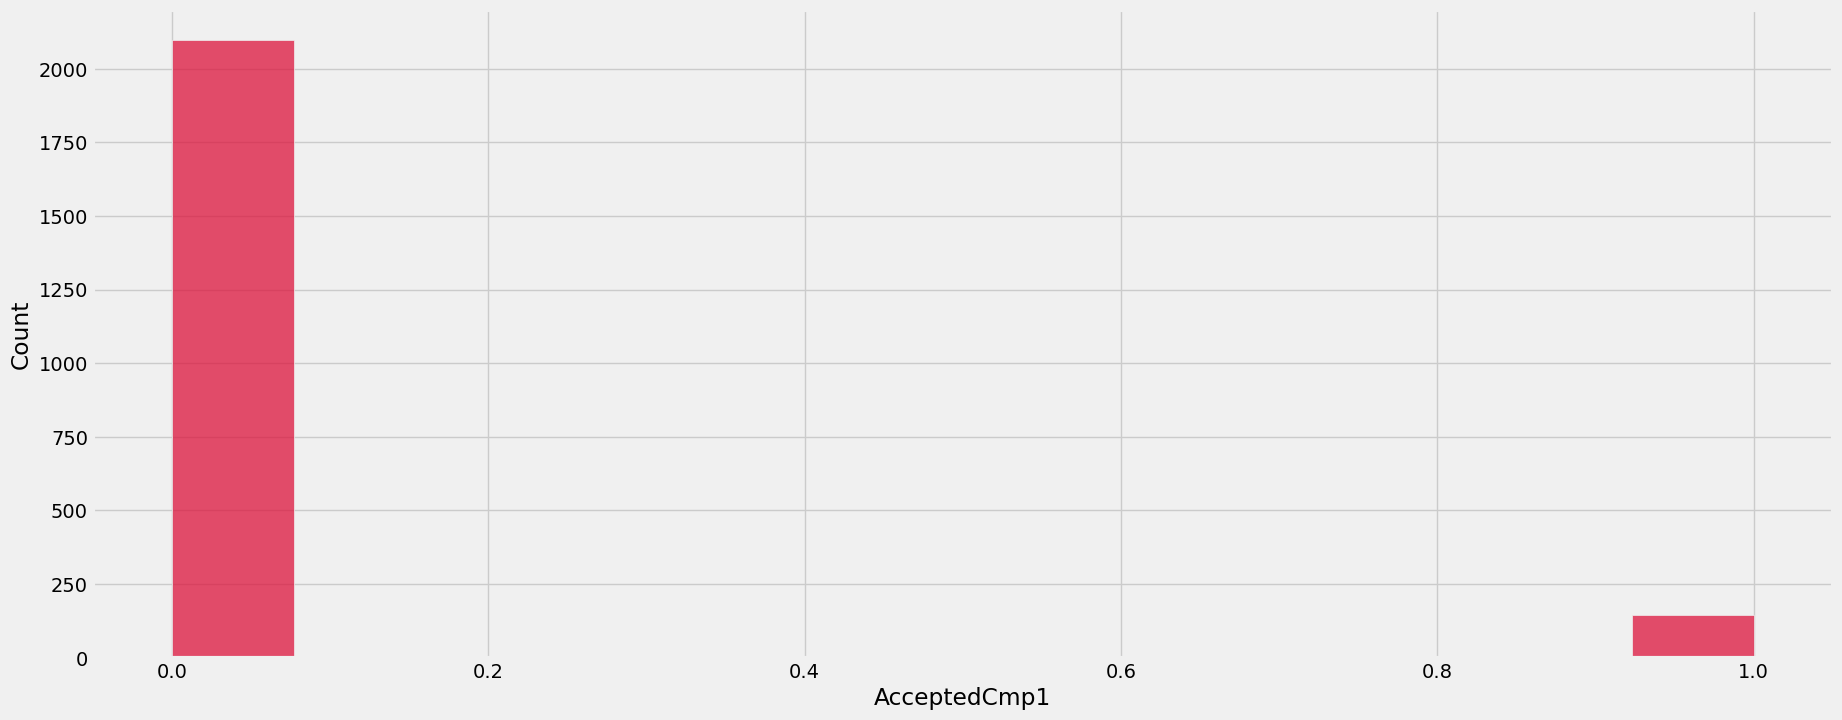

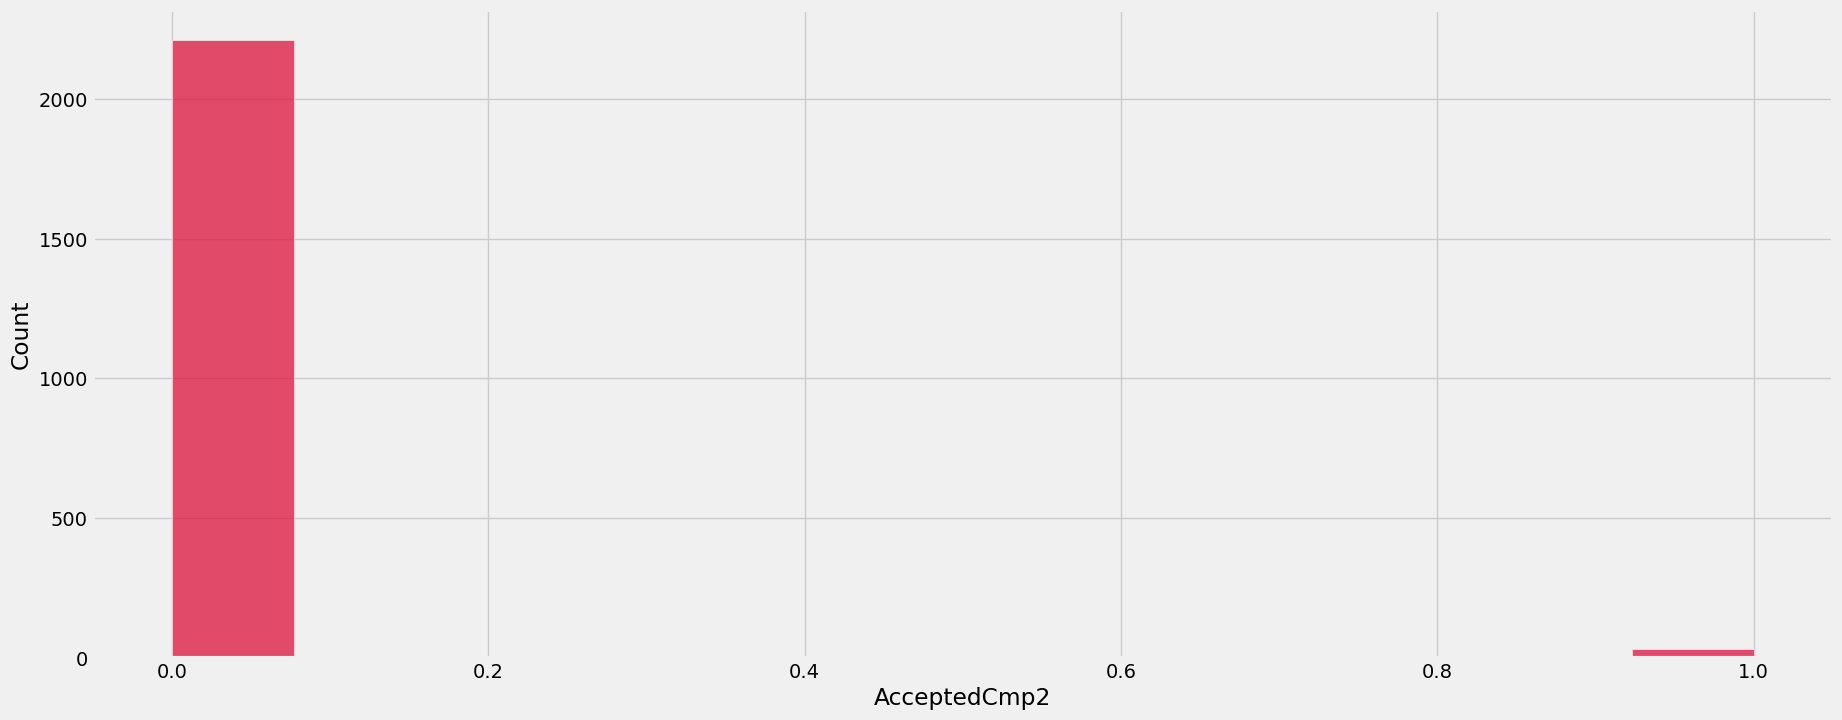

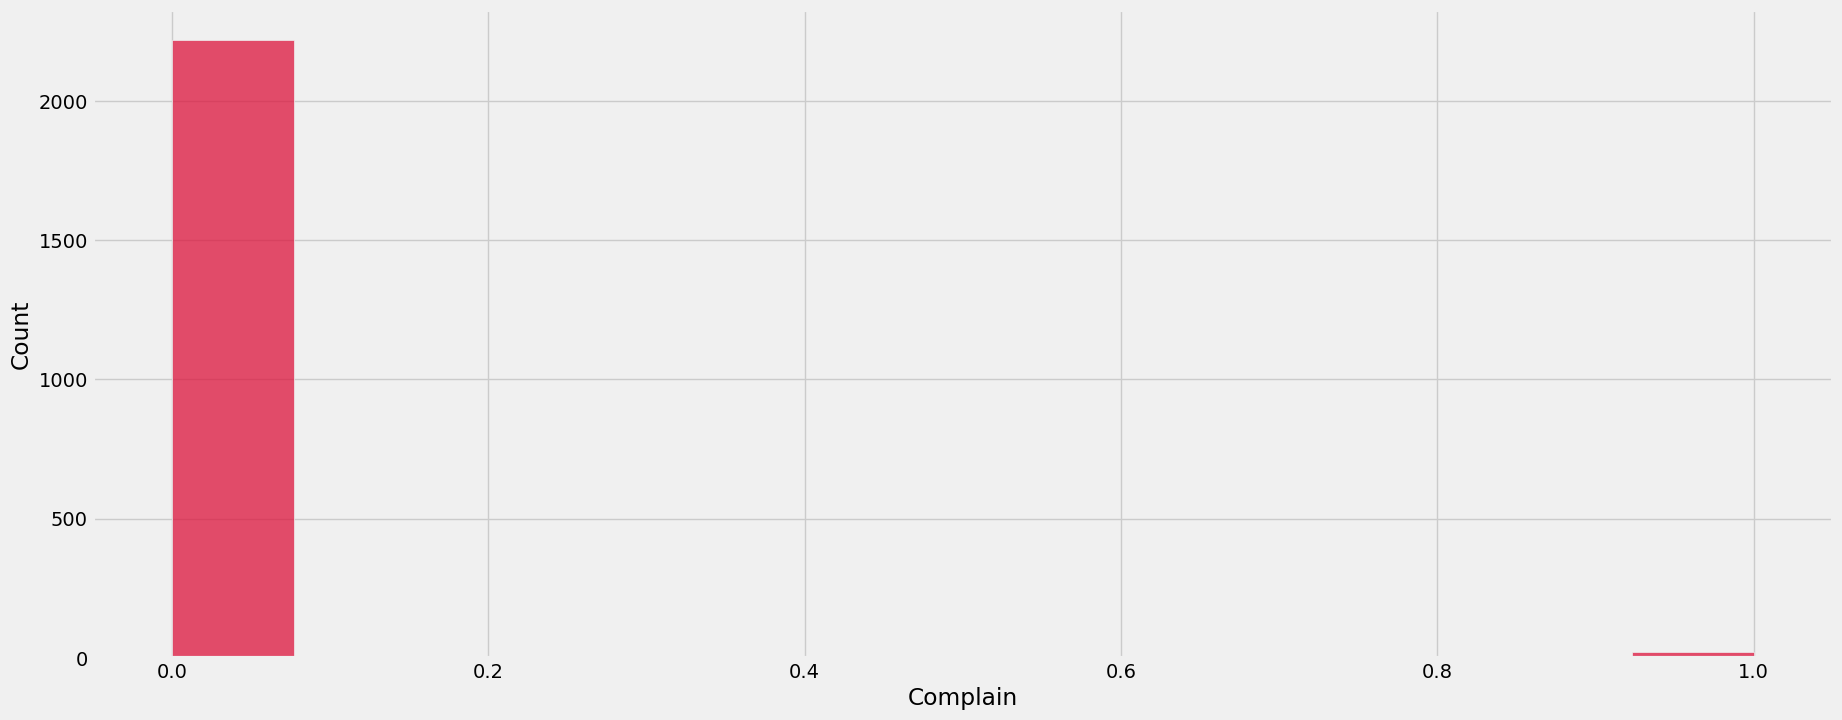

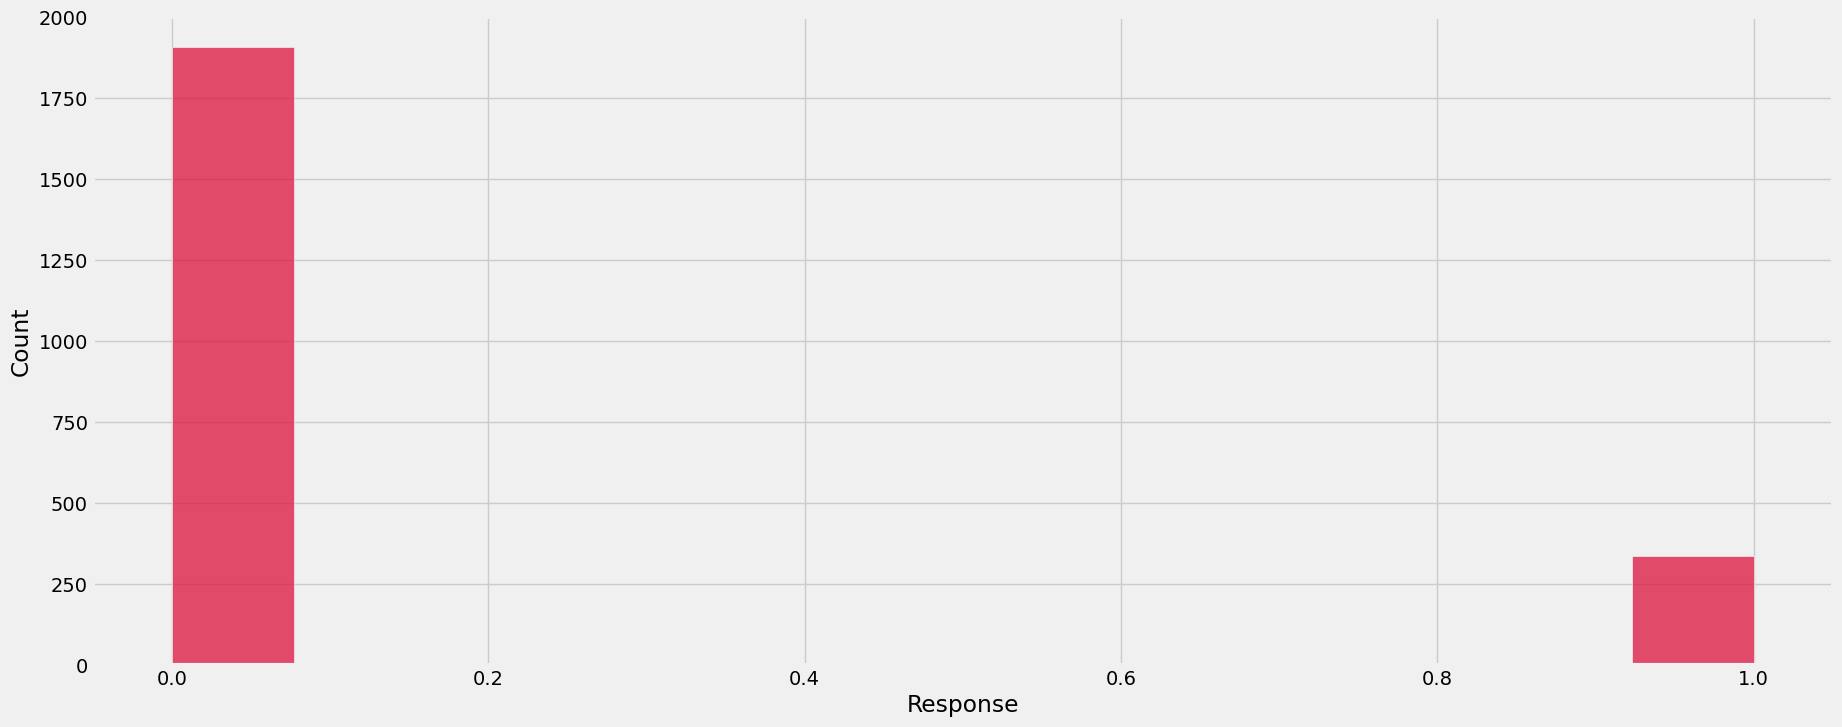

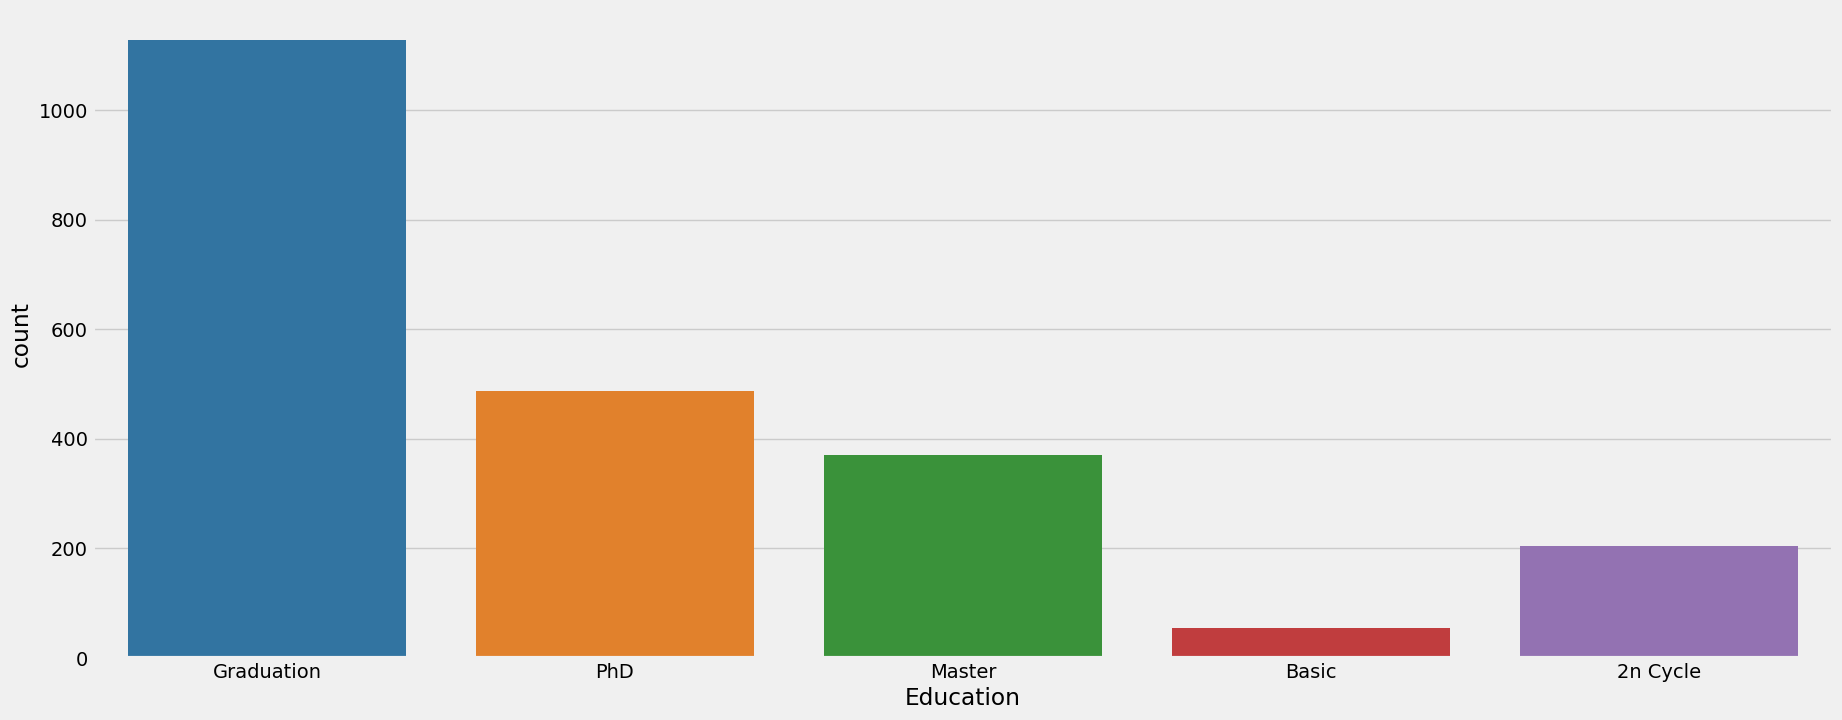

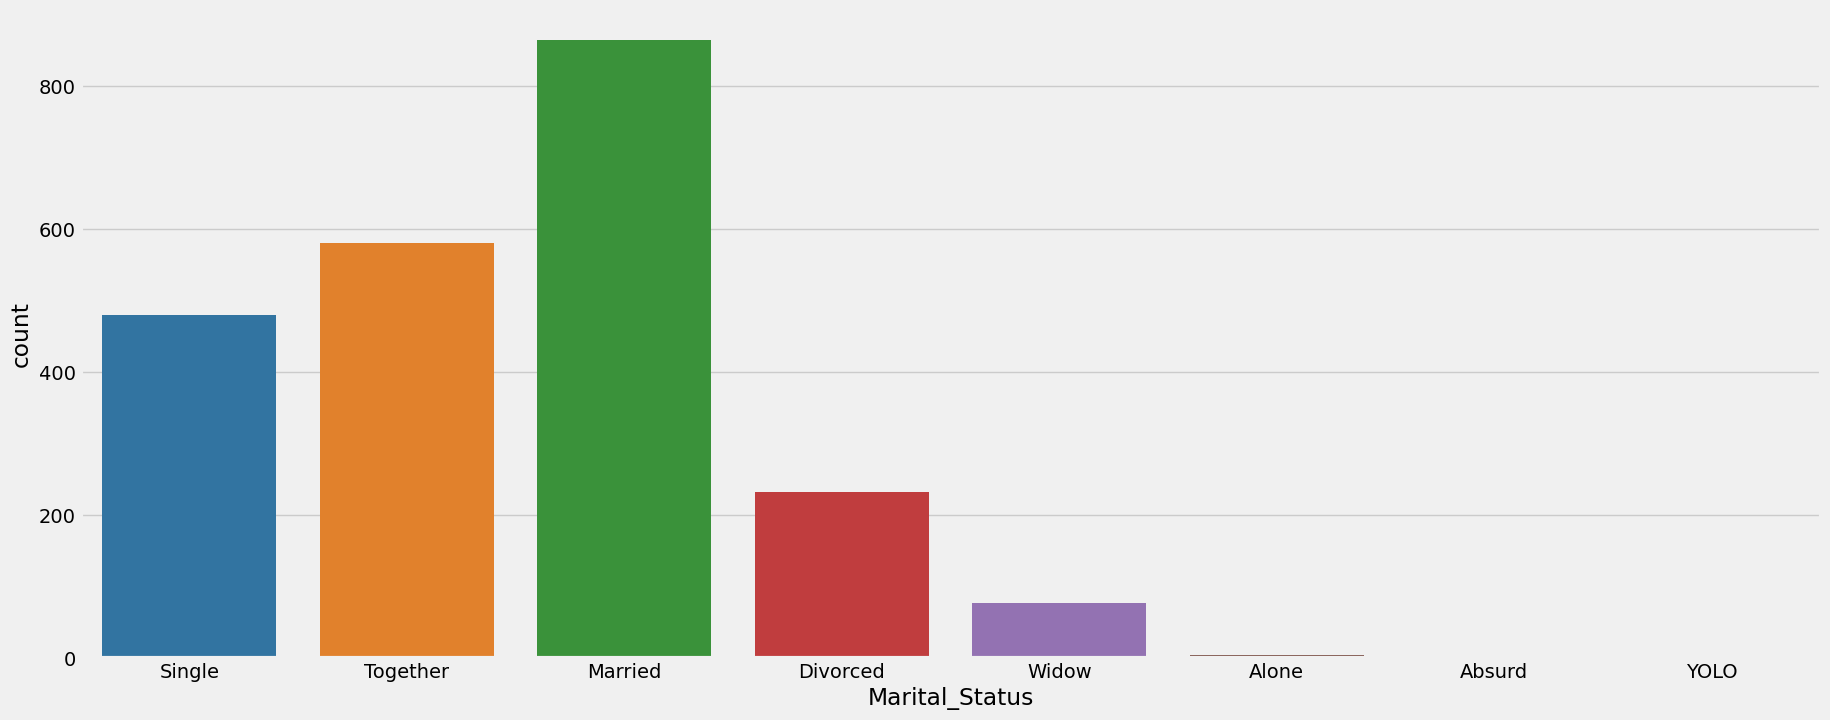

In [10]:
for col in numericals:
    plt.figure(figsize=(20,8))
    sns.histplot(data[col], color="crimson")
    plt.show()
for col in categoricals:
    plt.figure(figsize=(20,8))
    sns.countplot(x=data[col], palette="tab10")
    plt.show()

In [11]:
filler = data["Income"].median()
data["Income"] = data["Income"].fillna(filler)

In [12]:
from scipy.stats import zscore
scores=np.abs(zscore(data[numericals]))
cleaned_data=data[(scores<4).all(axis=1)]
cleaned_data.shape

(2133, 25)

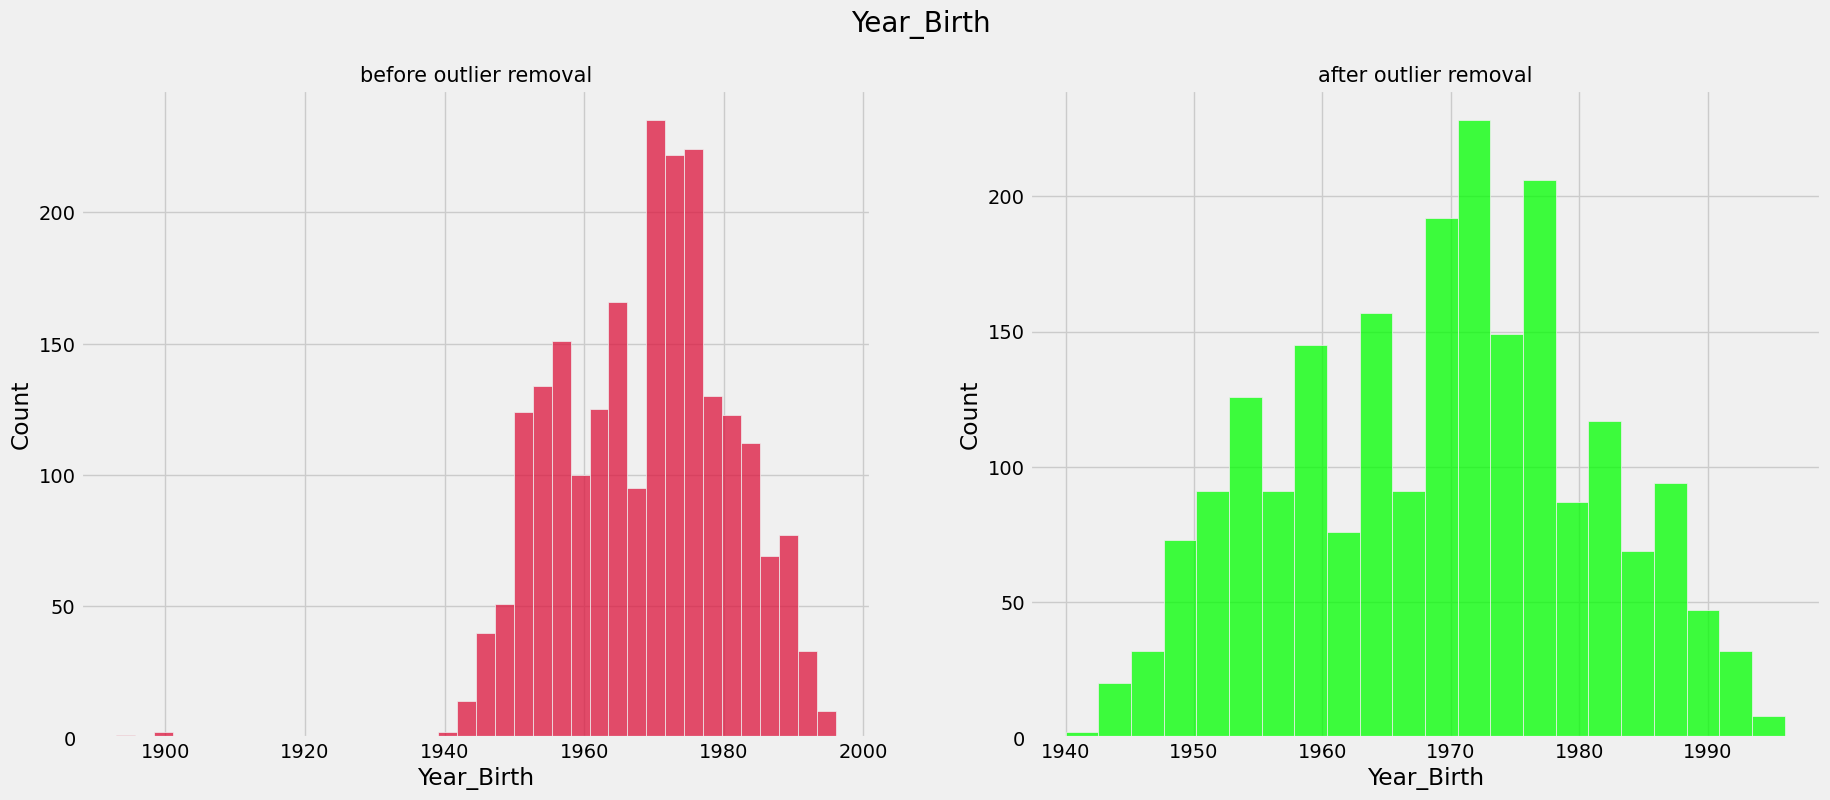

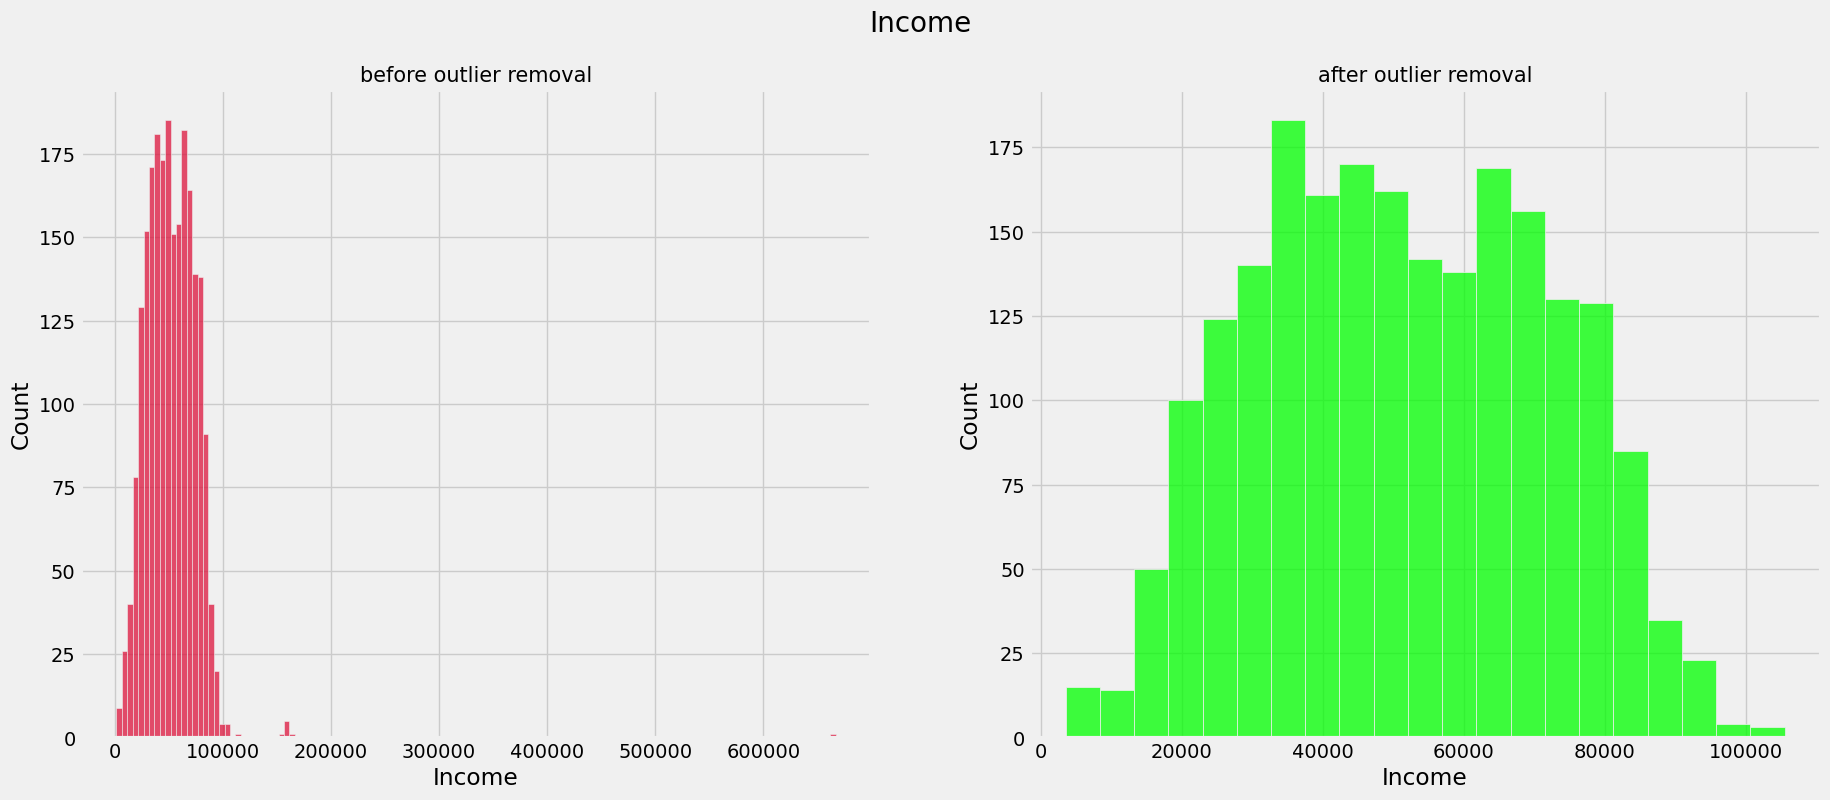

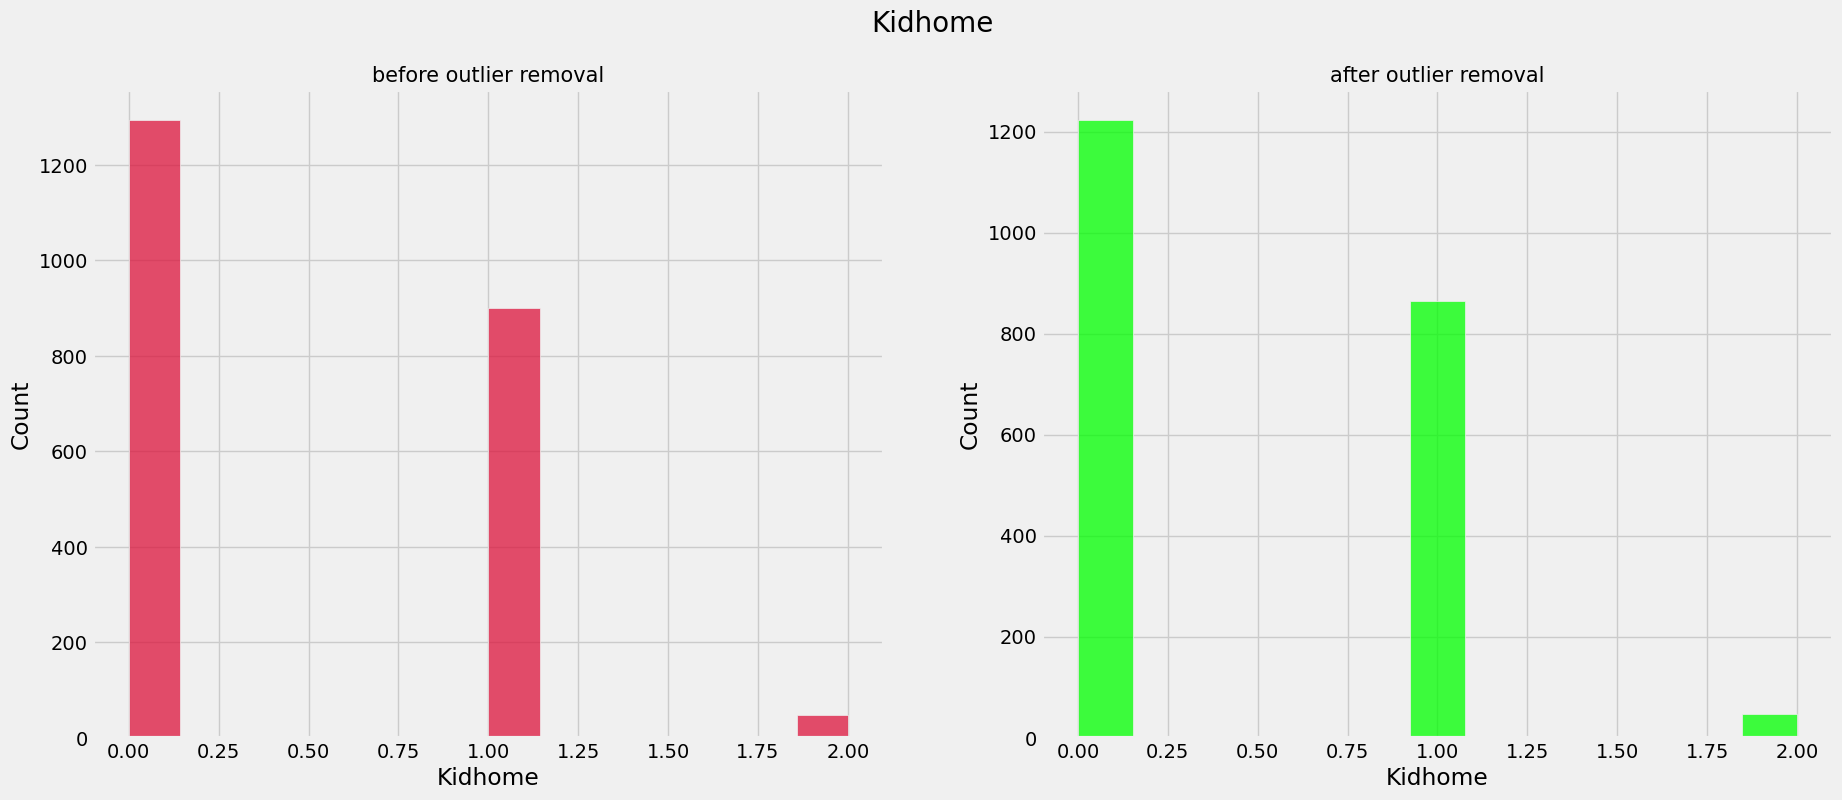

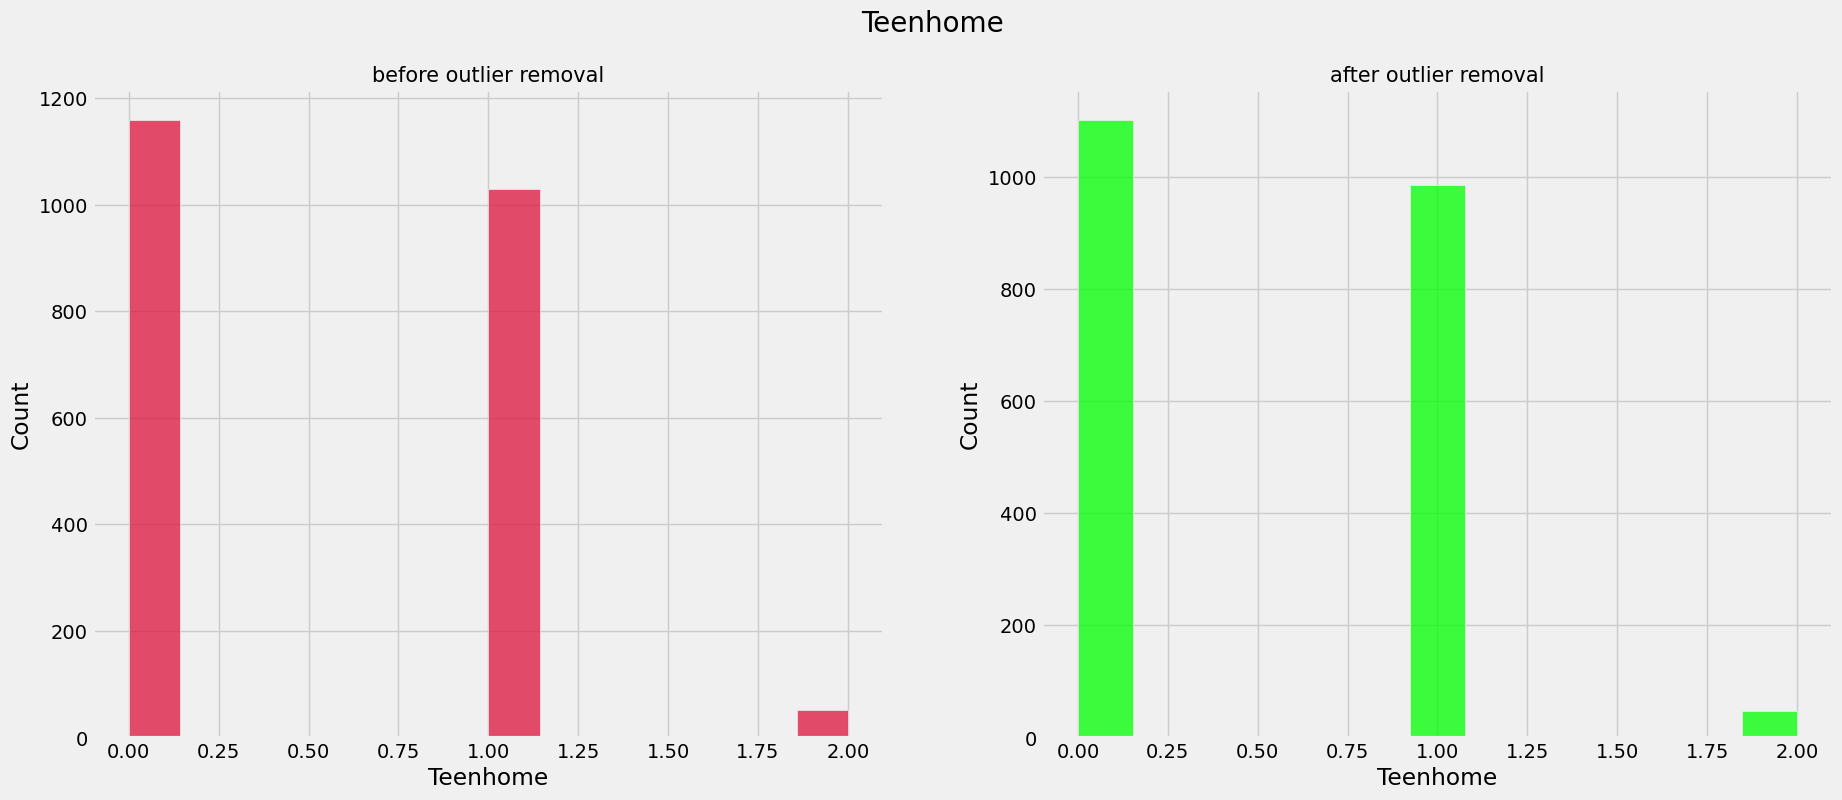

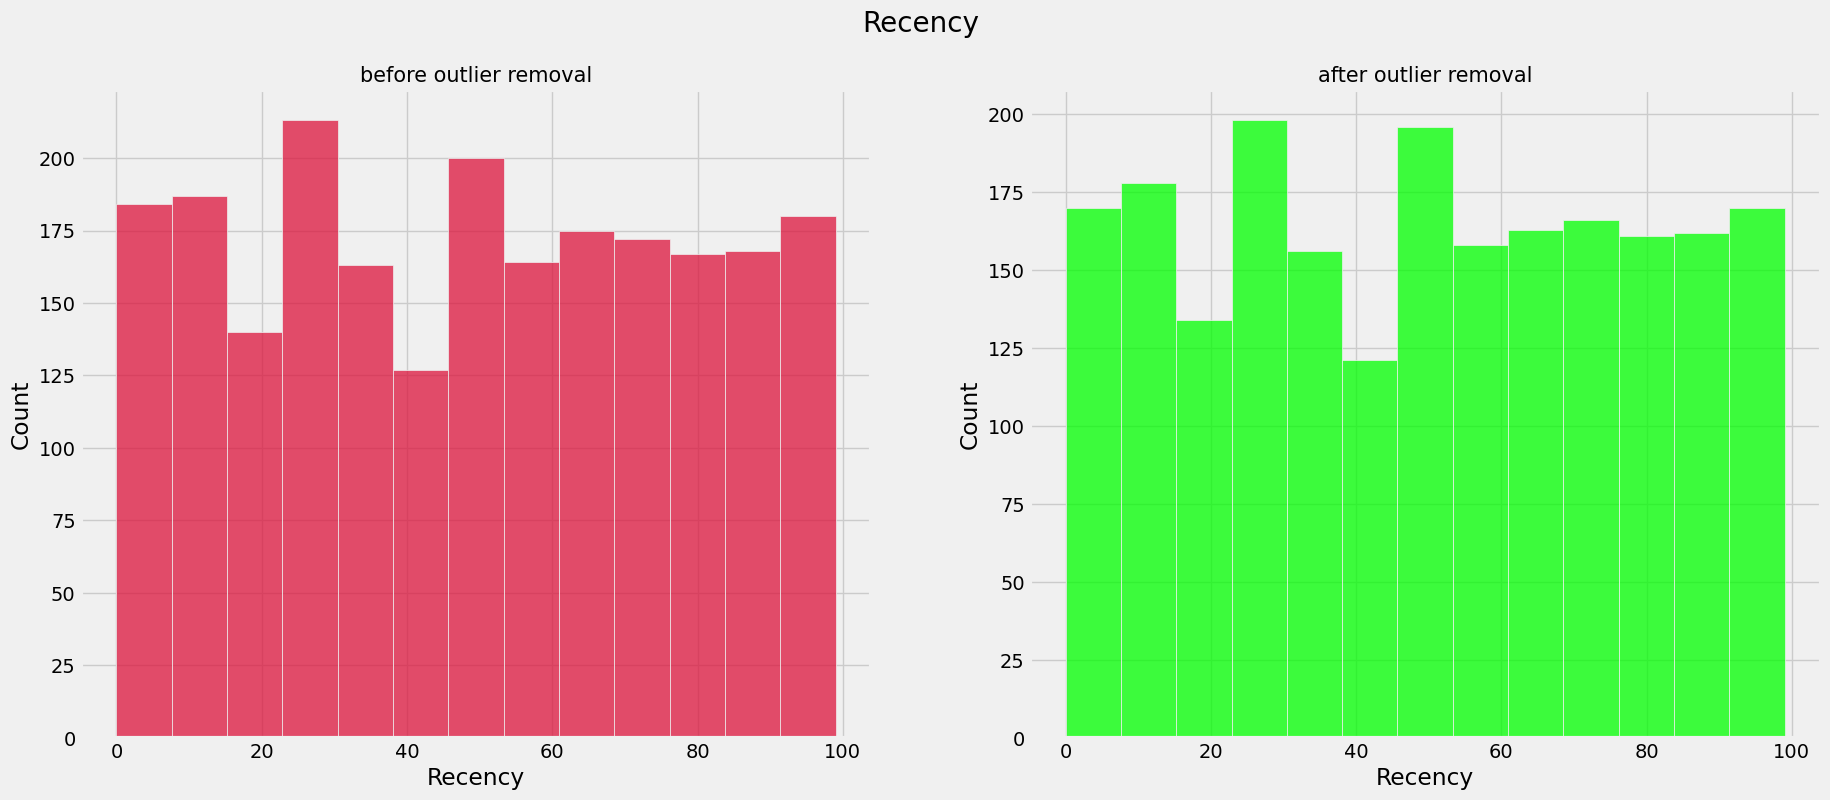

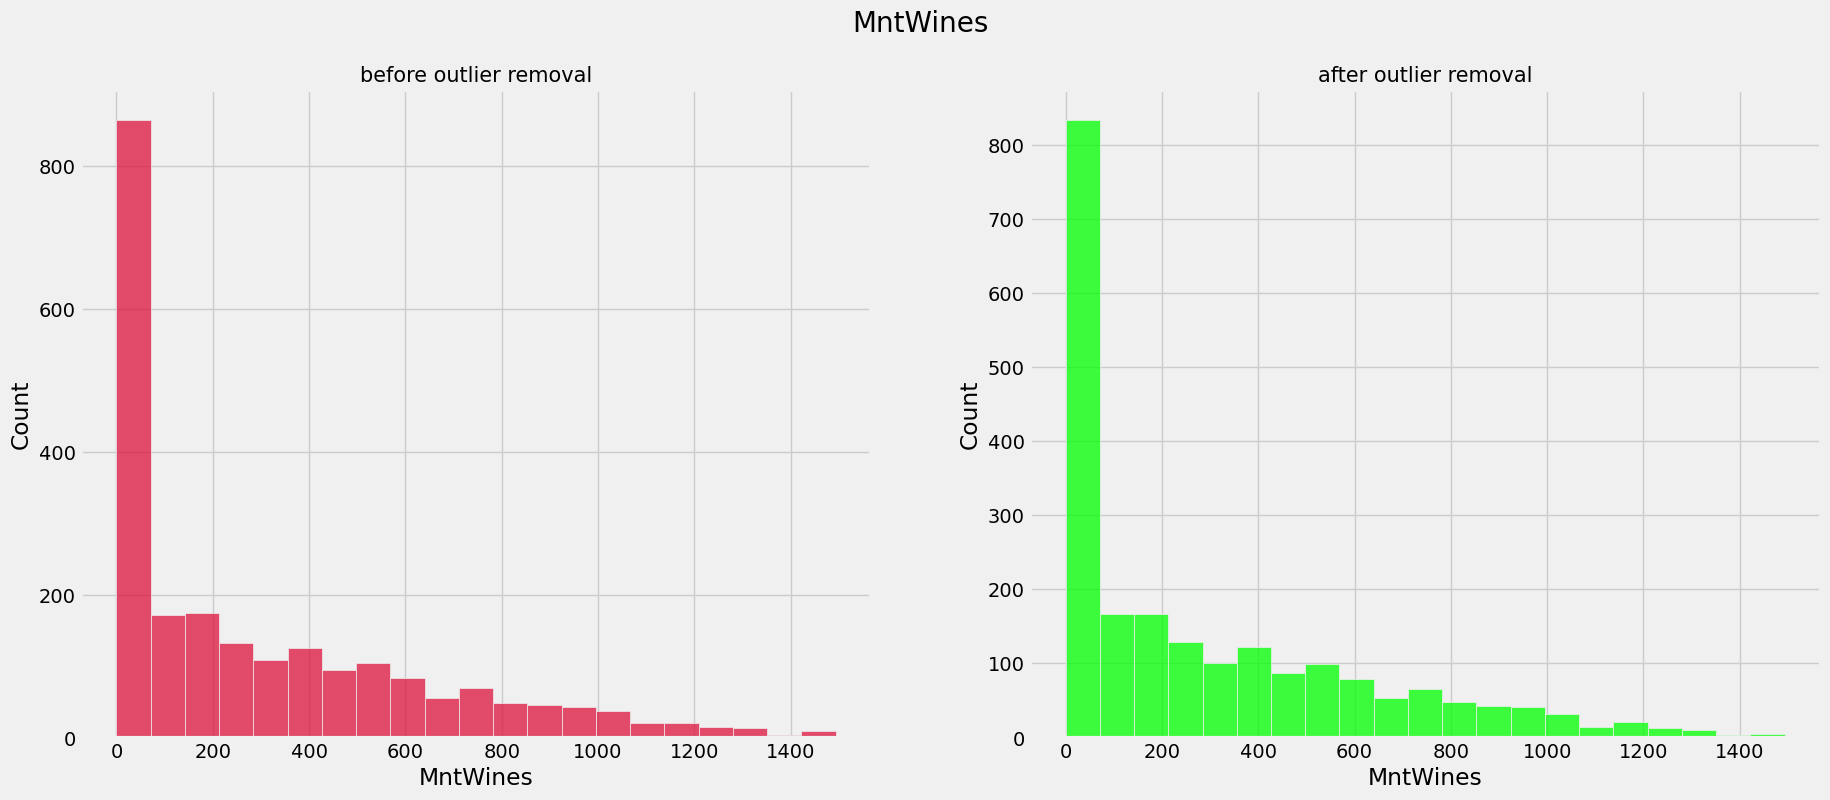

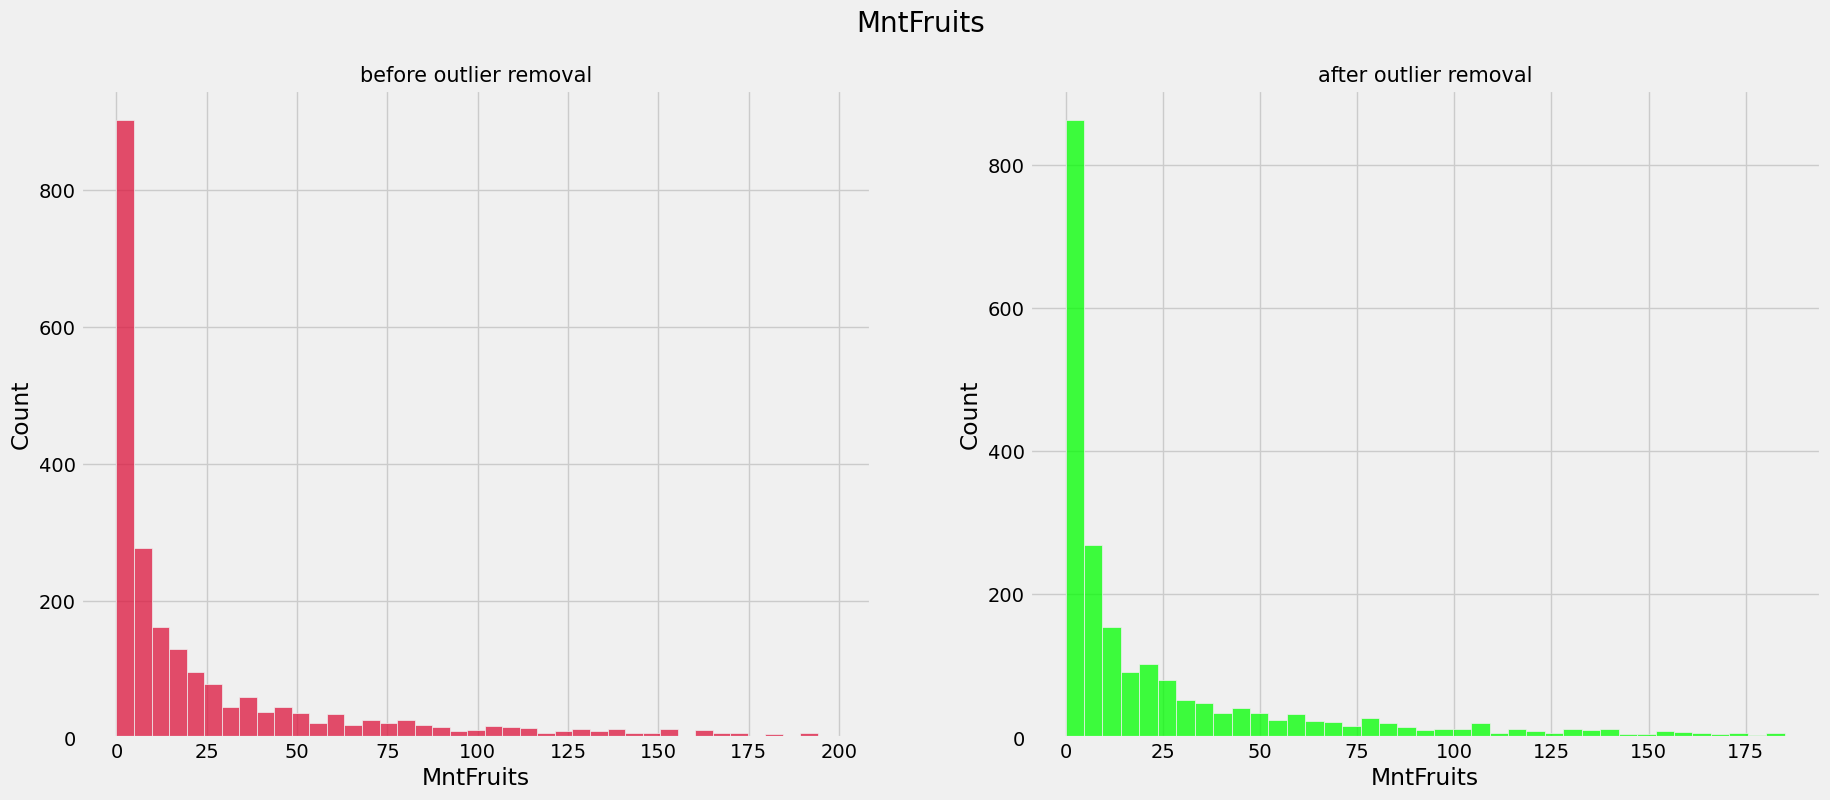

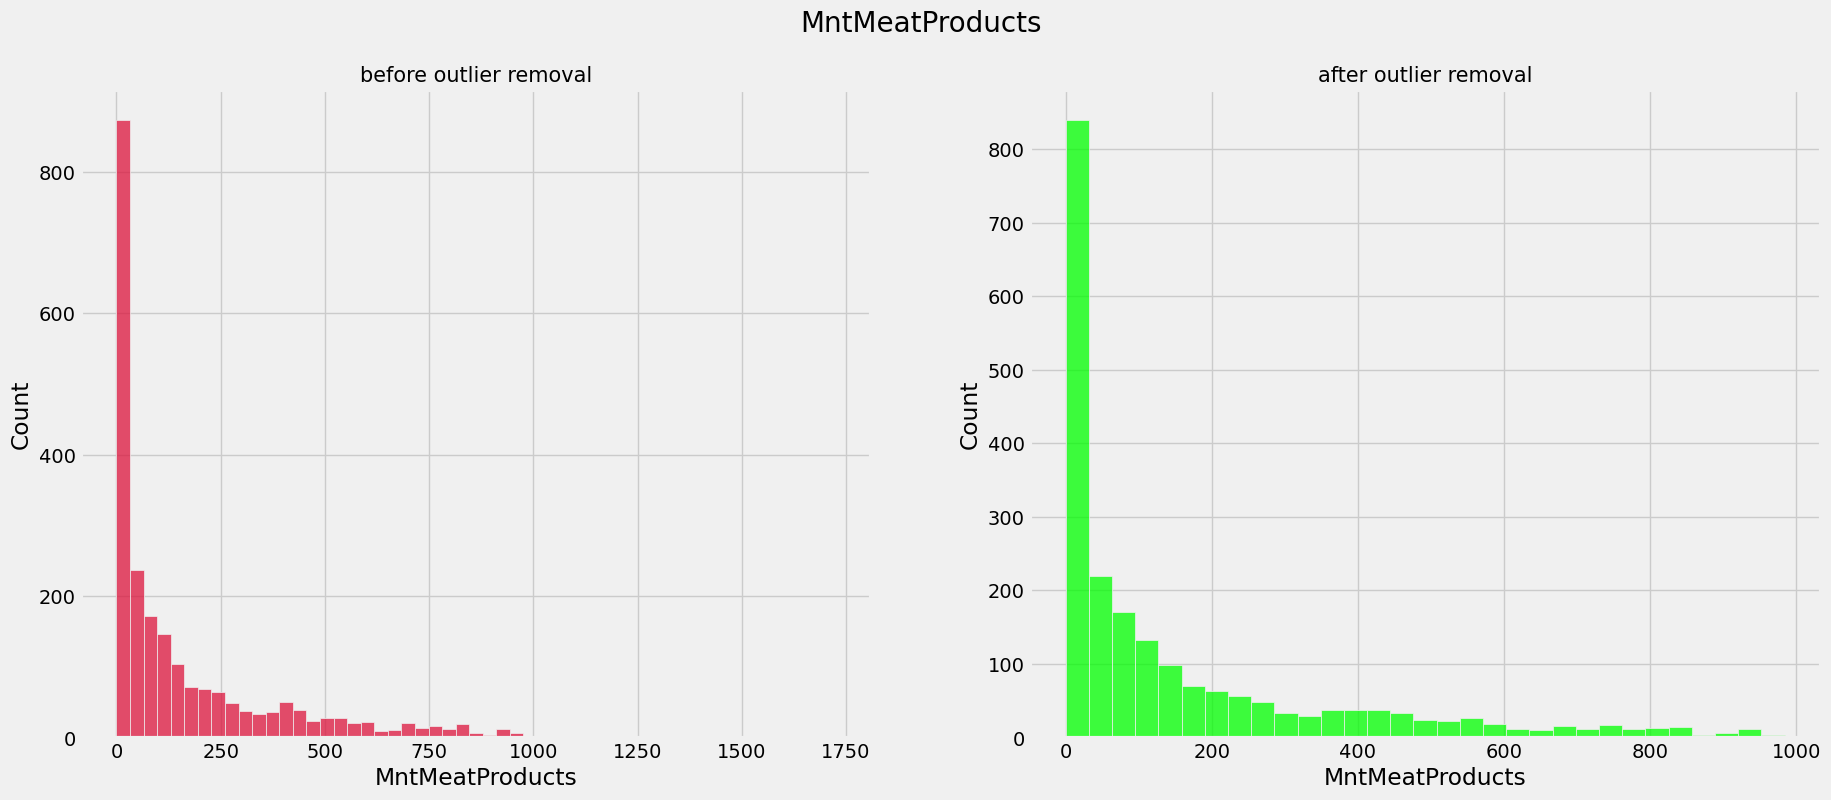

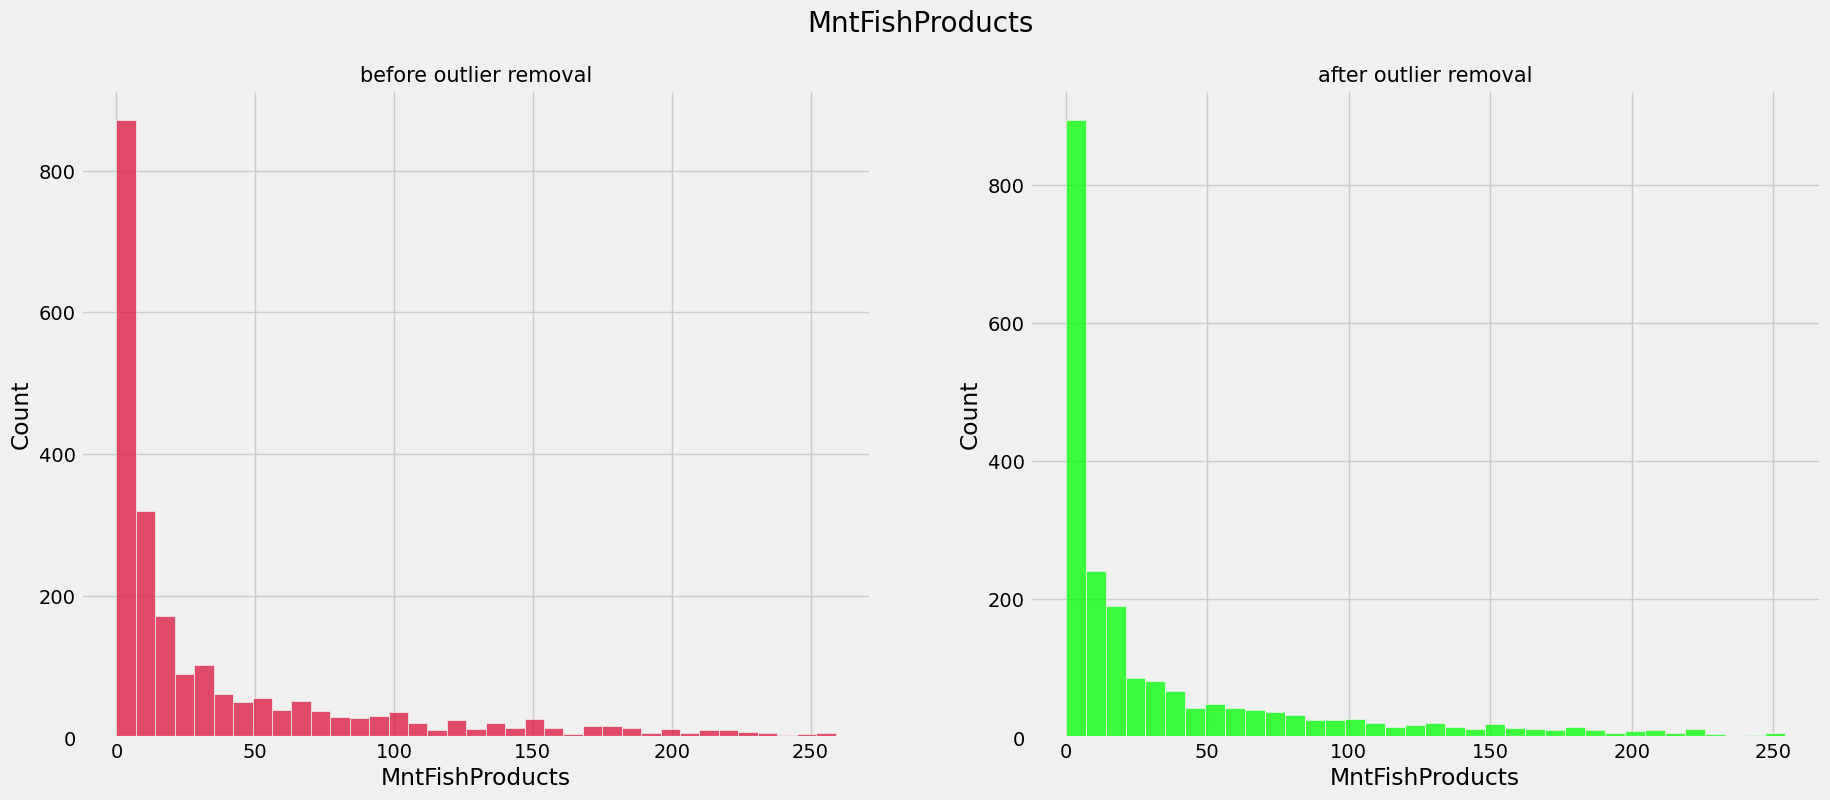

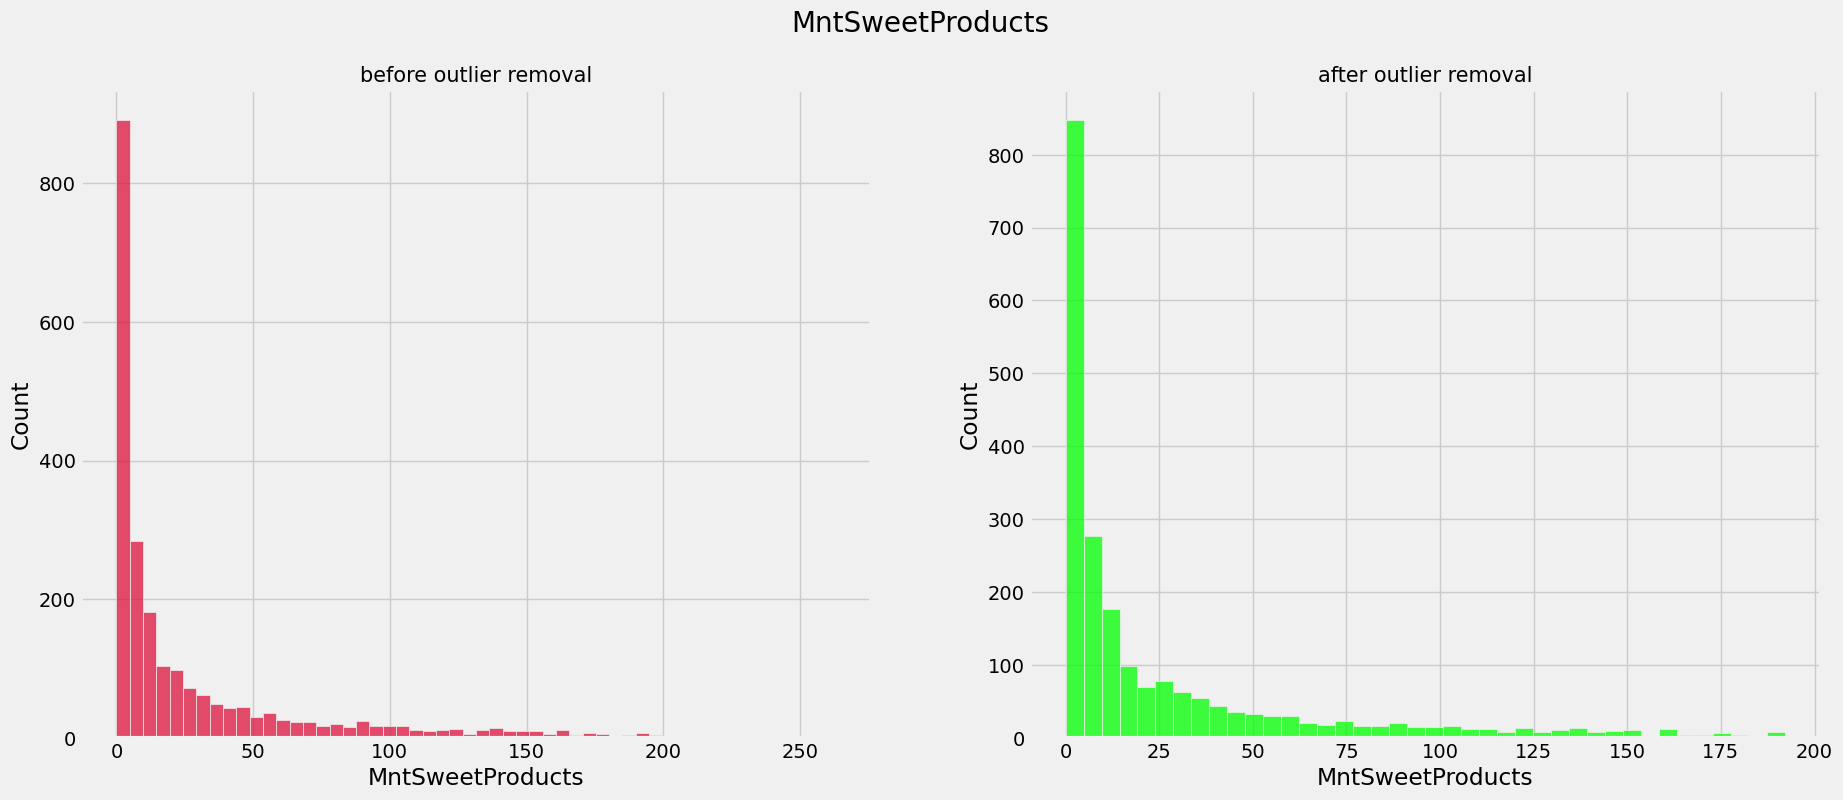

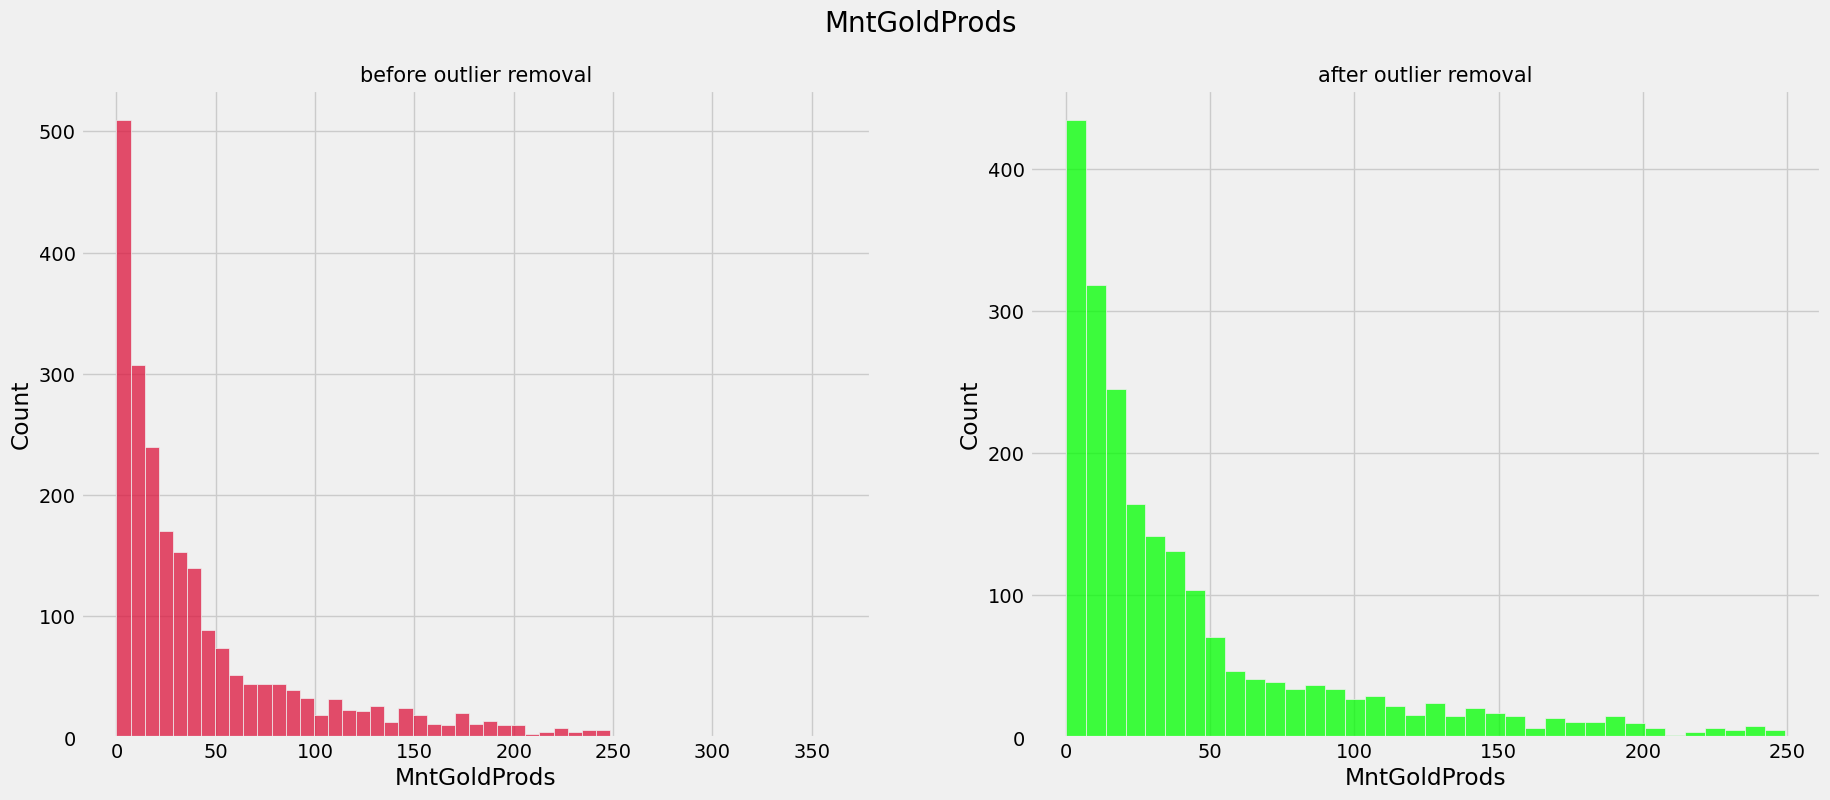

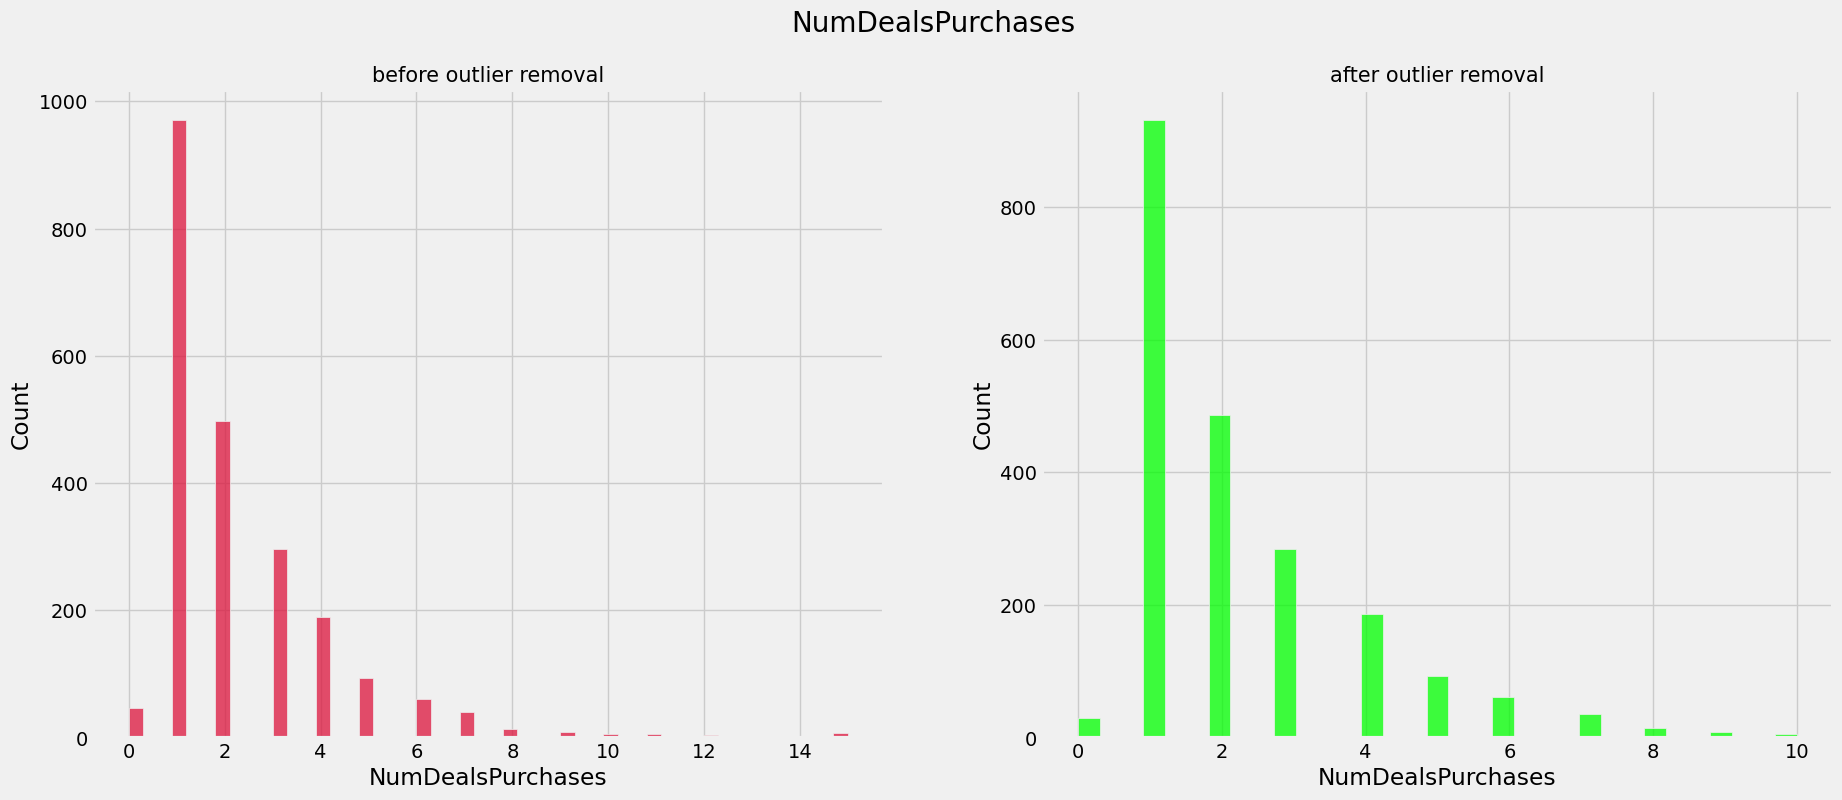

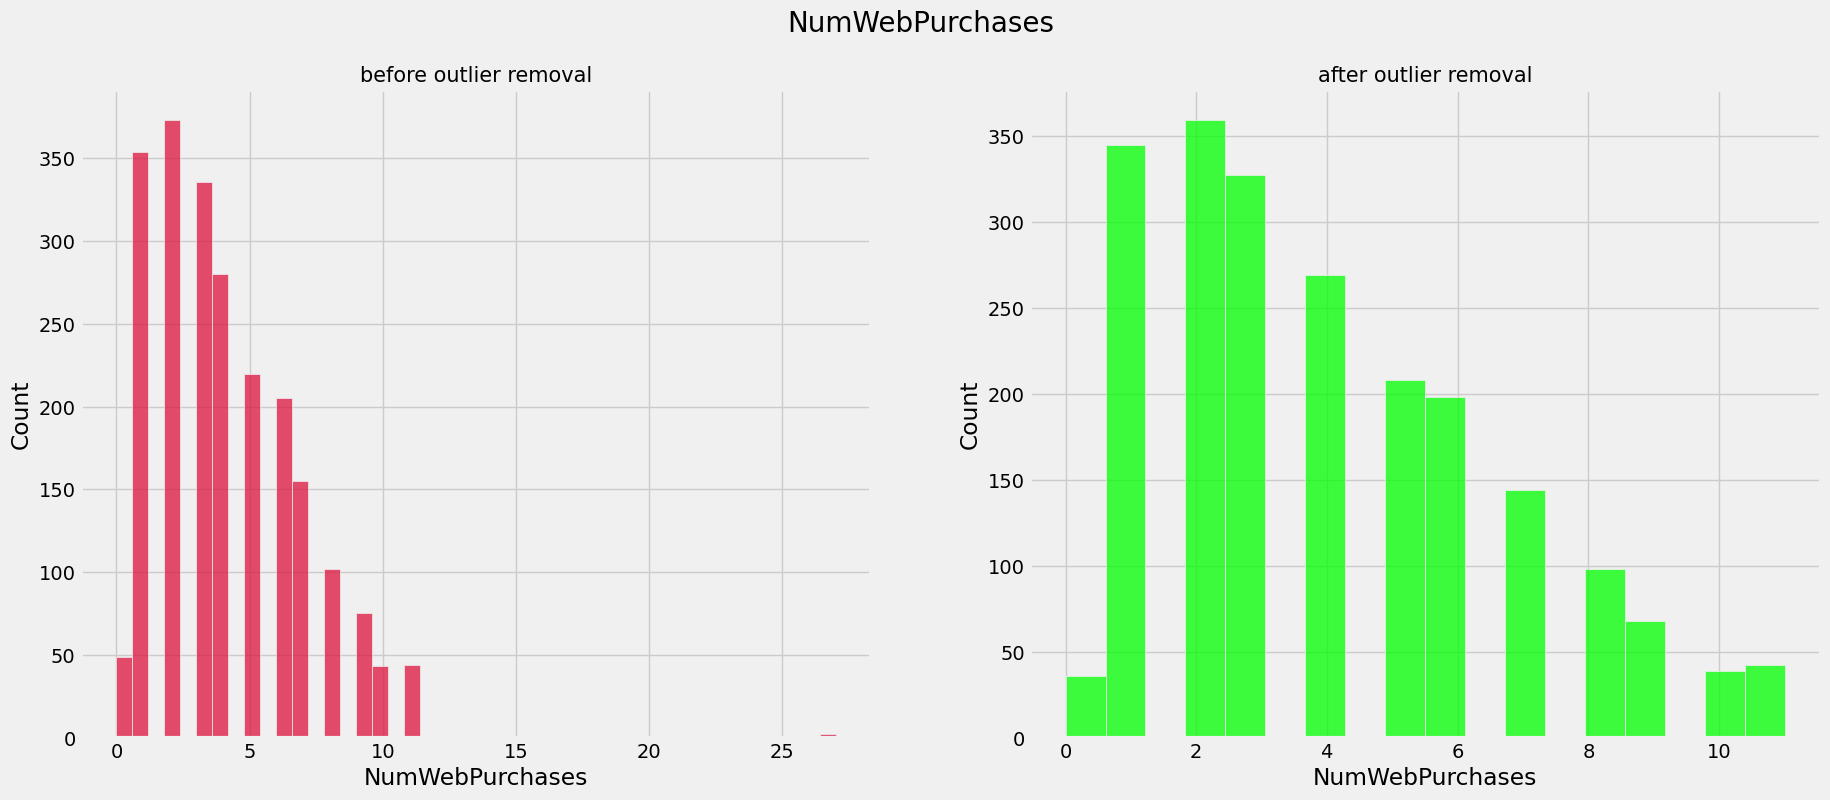

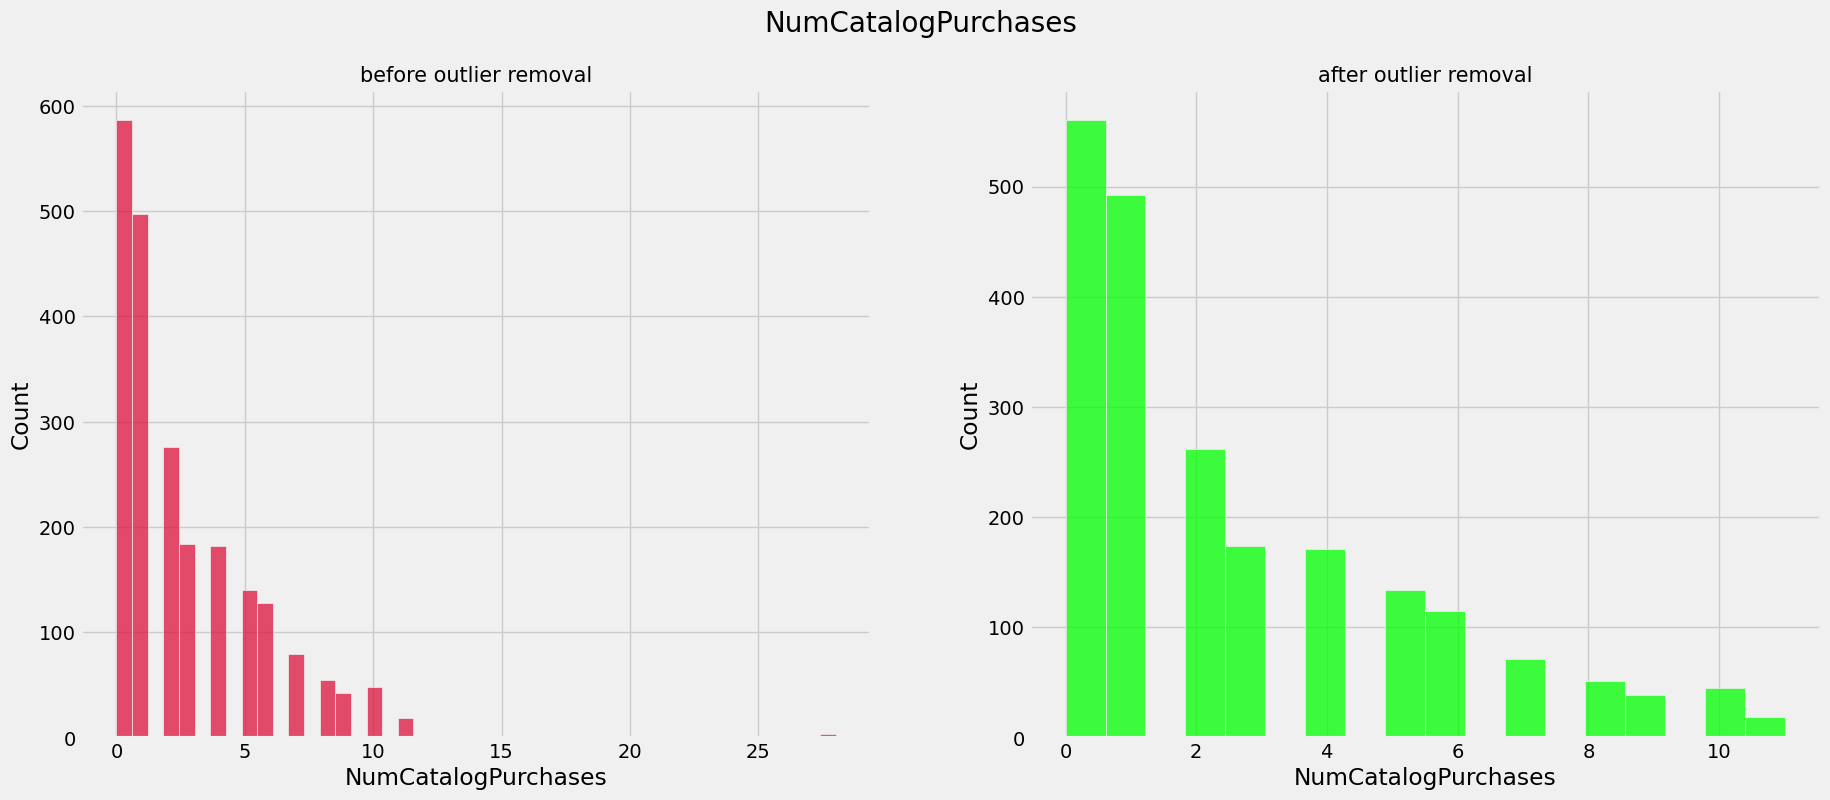

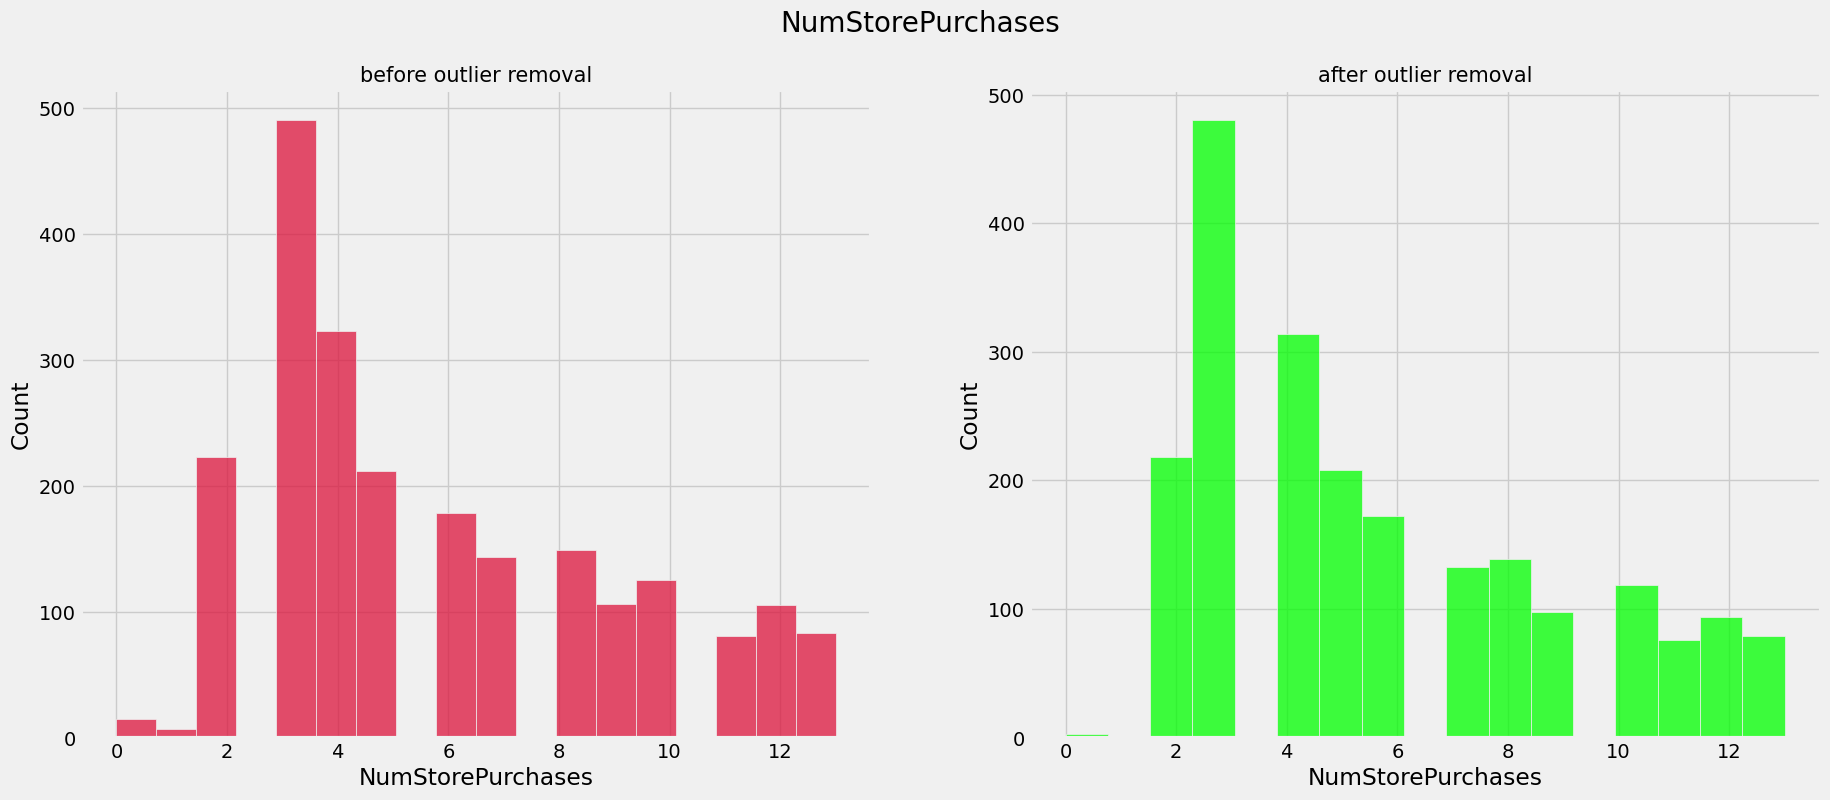

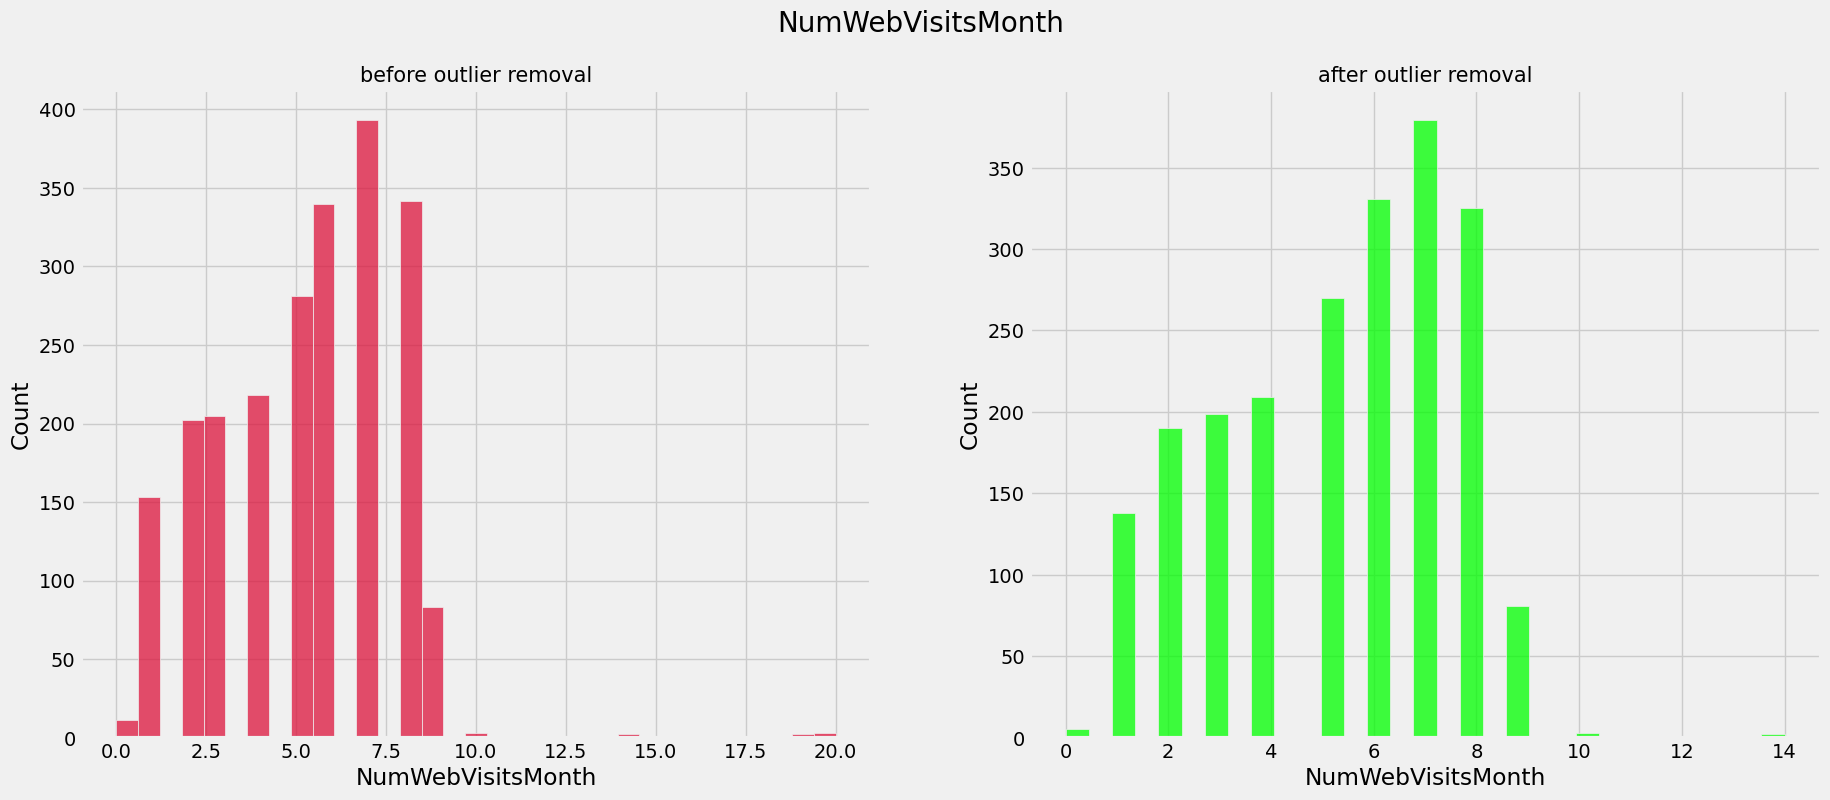

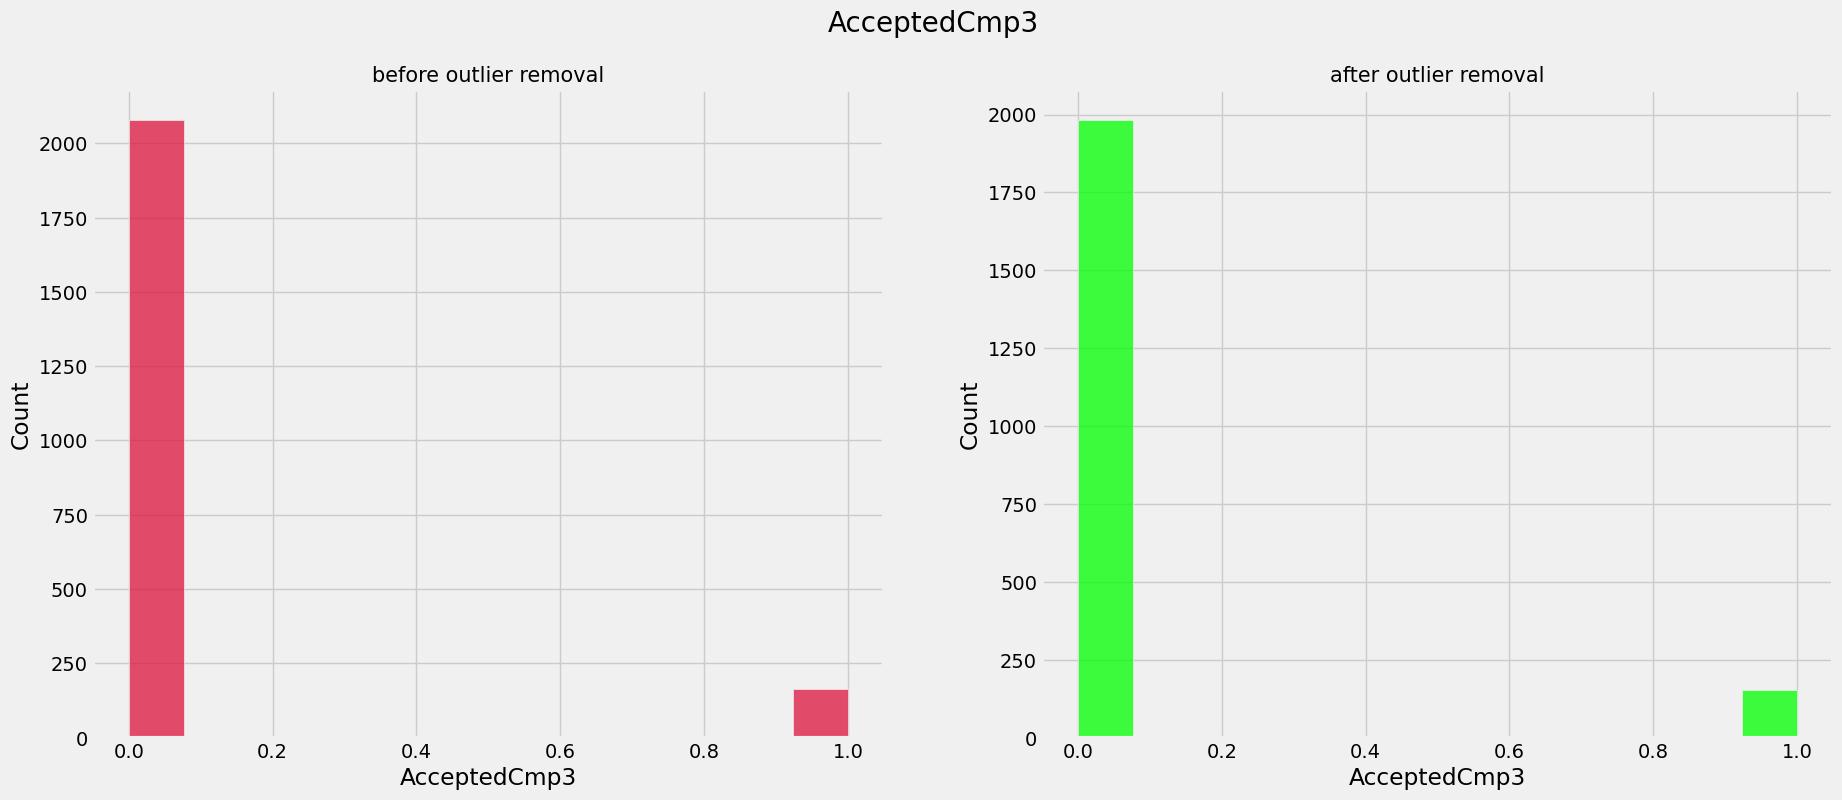

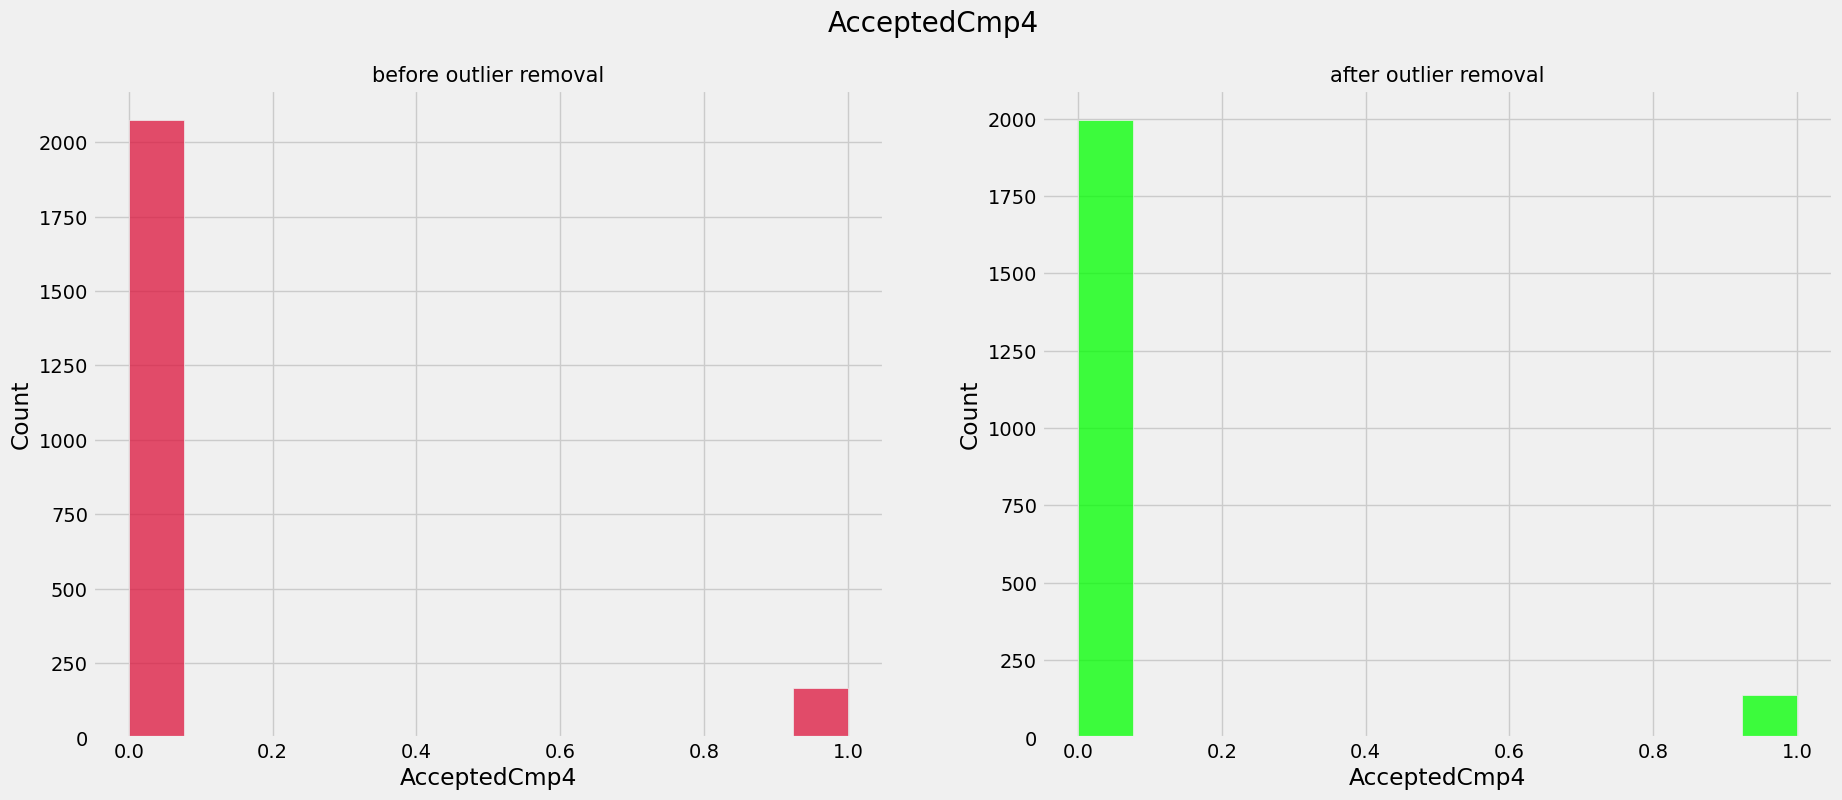

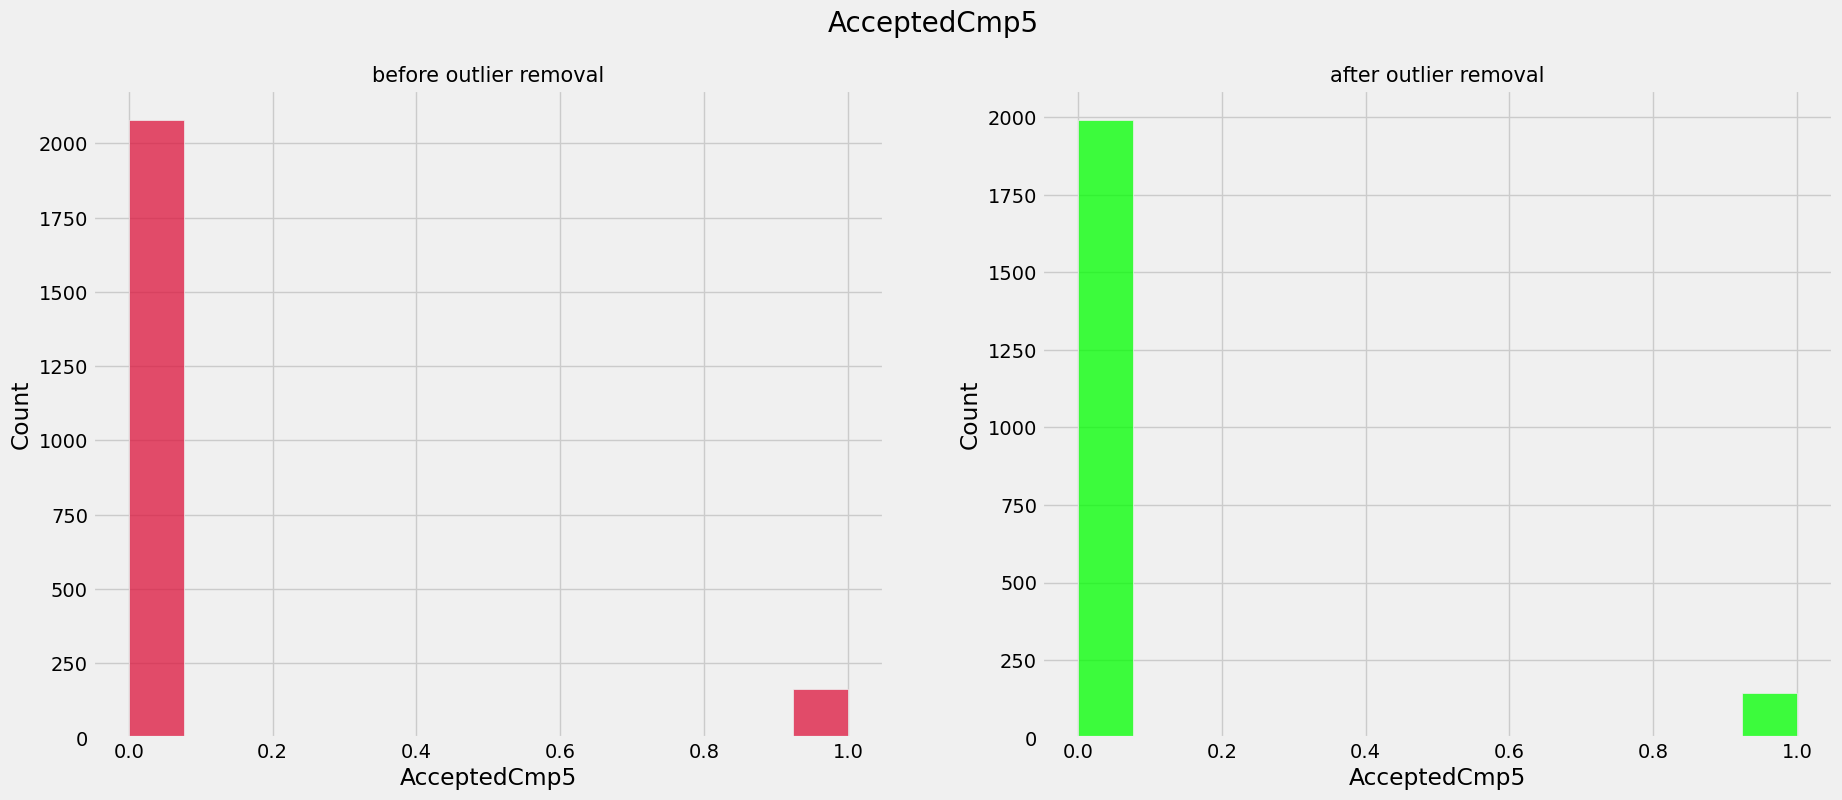

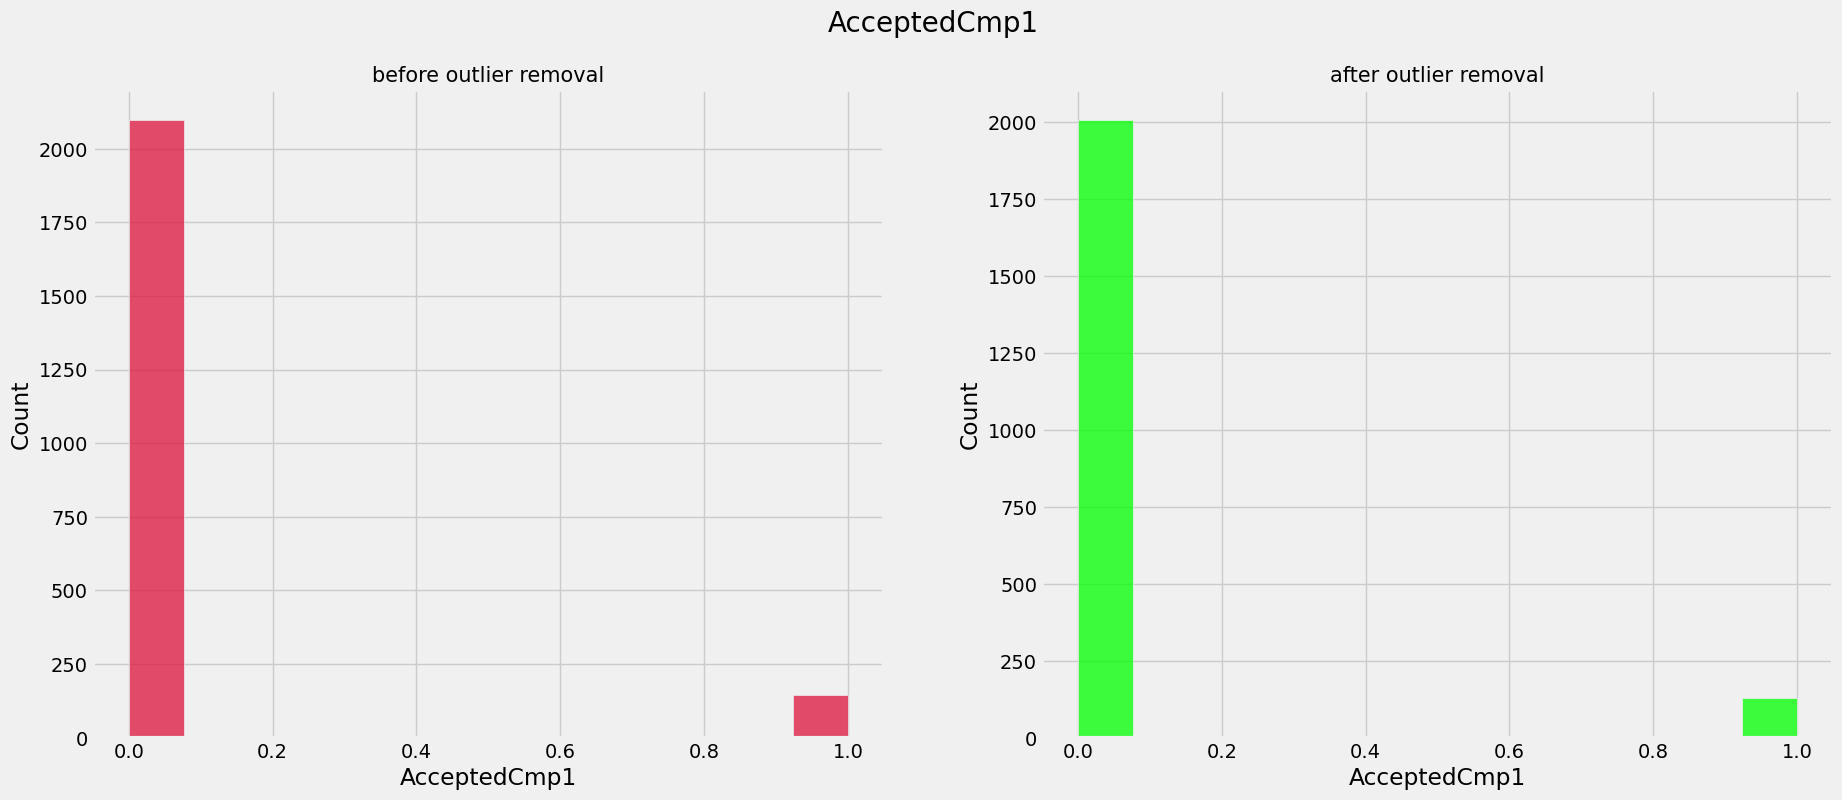

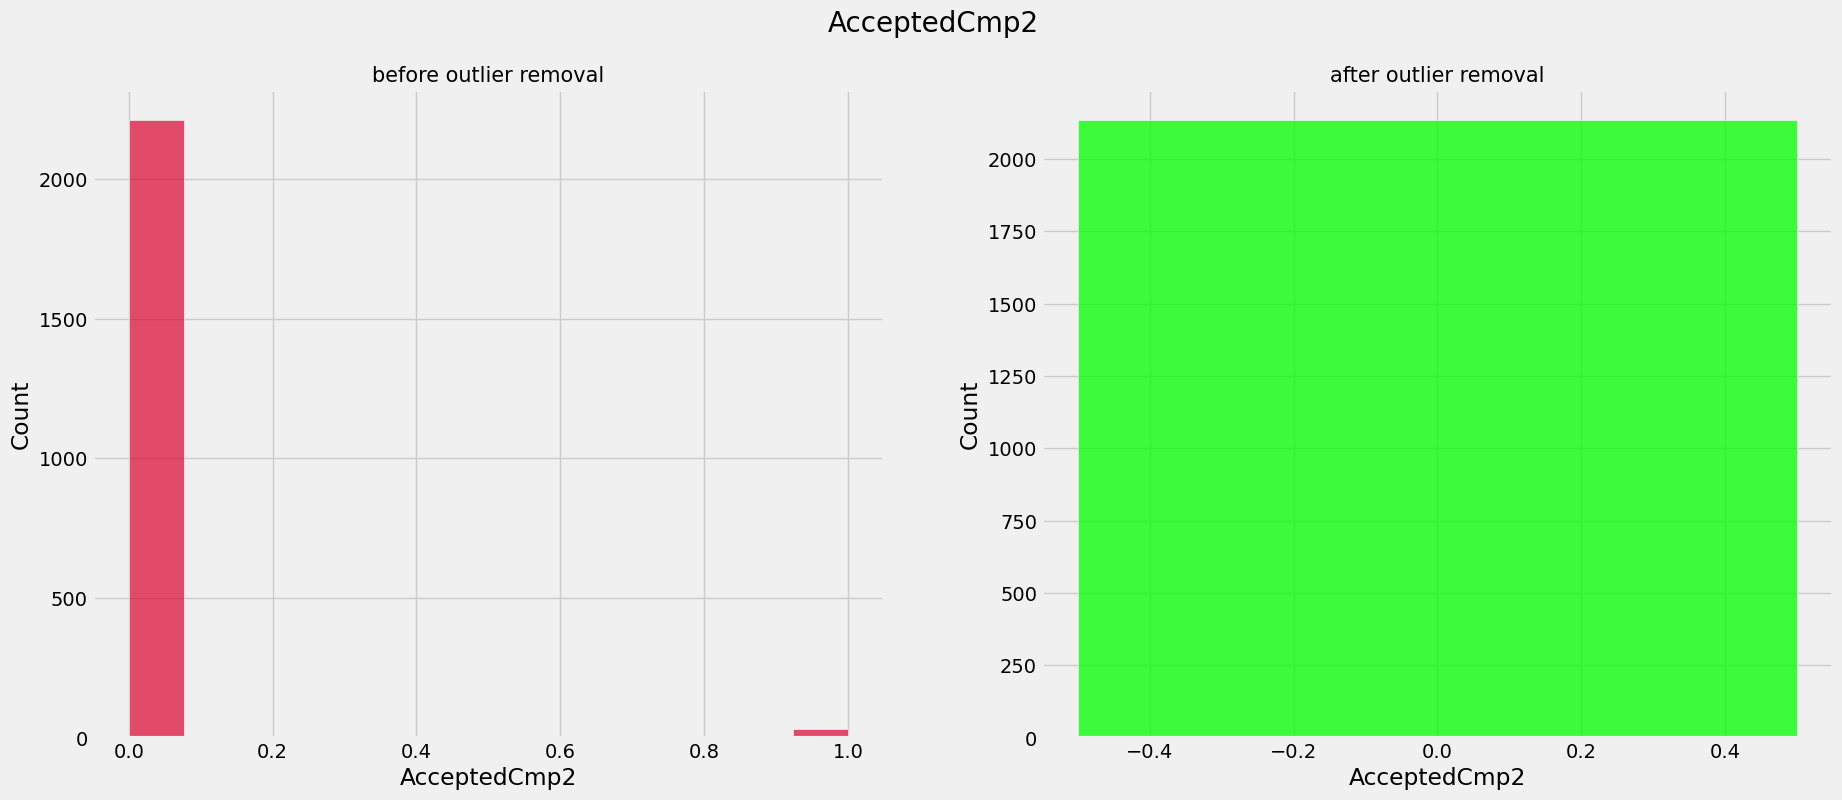

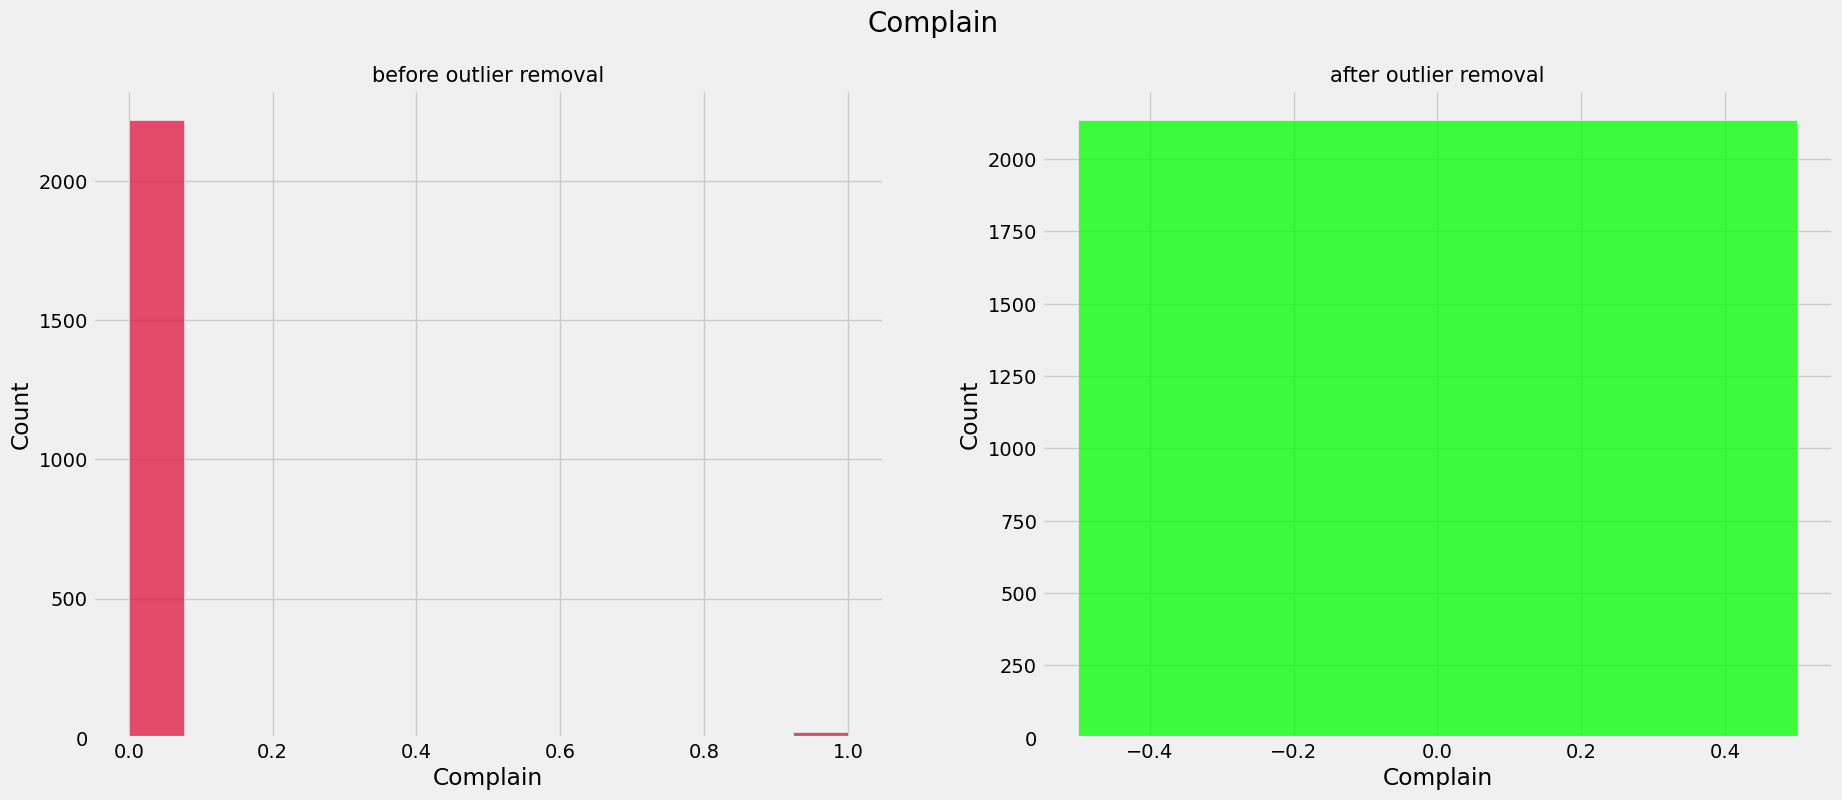

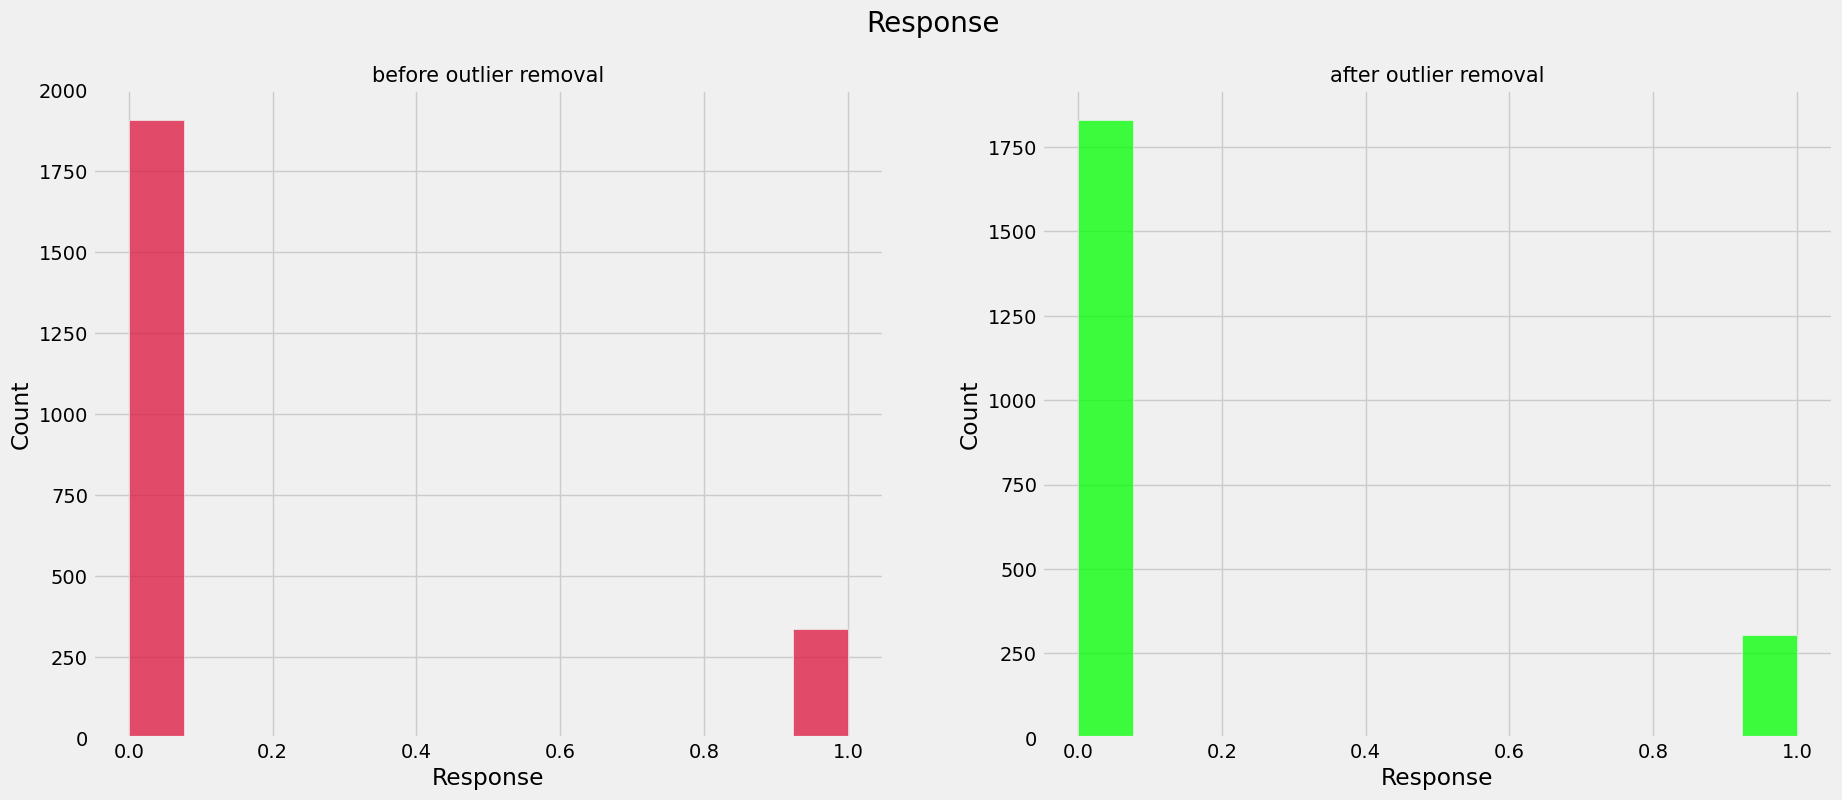

In [13]:
for col in numericals:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    sns.histplot(data[col], color="crimson", ax=axes[0])
    sns.histplot(cleaned_data[col], color="lime", ax=axes[1])
    axes[0].set_title("before outlier removal", fontsize=15)
    axes[1].set_title("after outlier removal", fontsize=15)
    fig.suptitle(col, fontsize=20)
    plt.show()

In [14]:
data=cleaned_data

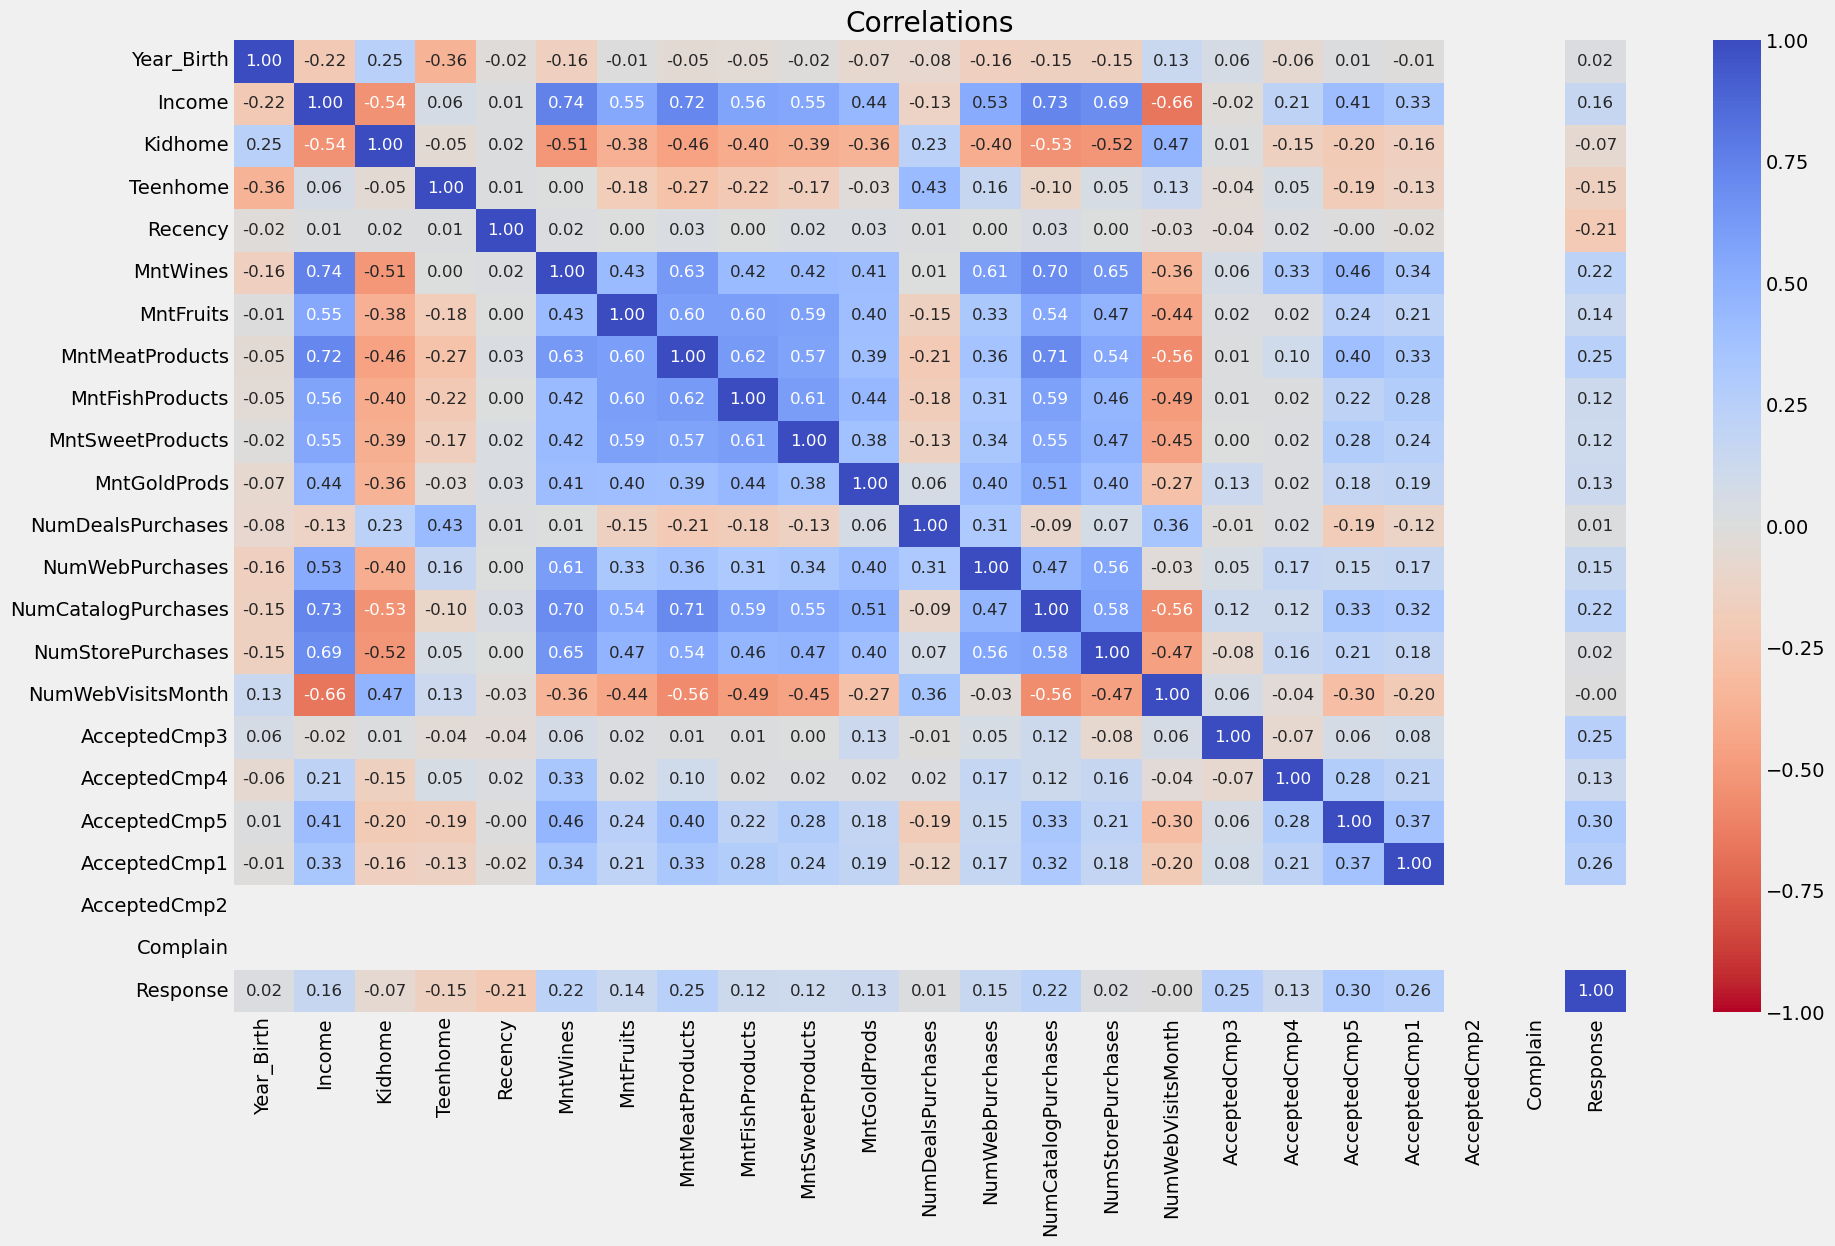

In [15]:
plt.figure(figsize=(20,12))
sns.heatmap(data[numericals].corr(), annot=True, cmap="coolwarm_r", annot_kws={"fontsize":12}, fmt=".2f", vmin=-1)
plt.title("Correlations")
plt.show()

In [16]:
for val in ["Absurd", "YOLO", "Alone"]:
    data = data[data["Marital_Status"] != val]

In [17]:
filler = data["Income"].median()
data["Income"] = data["Income"].fillna(filler)

In [18]:
data["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [19]:
edu_encoder = {"Basic":0, "2n Cycle":1, "Graduation":2, "Master":3, "PhD":4}
data["Education"].replace(edu_encoder, inplace=True)
mar_encoder = {"Single":0, "Together":1, "Married":2, "Divorced":3, "Widow":4}
data["Marital_Status"].replace(mar_encoder, inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2126 non-null   int64  
 1   Education            2126 non-null   int64  
 2   Marital_Status       2126 non-null   int64  
 3   Income               2126 non-null   float64
 4   Kidhome              2126 non-null   int64  
 5   Teenhome             2126 non-null   int64  
 6   Recency              2126 non-null   int64  
 7   MntWines             2126 non-null   int64  
 8   MntFruits            2126 non-null   int64  
 9   MntMeatProducts      2126 non-null   int64  
 10  MntFishProducts      2126 non-null   int64  
 11  MntSweetProducts     2126 non-null   int64  
 12  MntGoldProds         2126 non-null   int64  
 13  NumDealsPurchases    2126 non-null   int64  
 14  NumWebPurchases      2126 non-null   int64  
 15  NumCatalogPurchases  2126 non-null   i

In [21]:
cleaned_data

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  \
0          58       635         88              546  ...                   10   
1          38        11          1                6  ...                    1   
2          26       426         49              127  ...                    2   
3          26        11          4               20  ...                    0   
4          94       173         43              118  ...                    3   
...       ...       ...        ...              ...  ...                  ...   
2235       46       709         43              182  ...                    3   
2236       56       406          0               30  ...                    2   
2237       91       908         48              217  ...                    3   
2238        8       428         30              214  ...                    5   
2239       40        84          3               61  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0         0         1  
1                0             0             0         0         0  
2                0             0             0         0         0  
3                0             0             0         0         0  
4                0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[2133 rows x 25 columns]

In [22]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler(quantile_range=(0,95))
scaleddata = rs.fit_transform(data)
scaleddata = pd.DataFrame(scaleddata, columns=data.columns)

In [23]:
!pip install umap-learn

In [24]:
import umap
ump = umap.UMAP(random_state=11, n_components=3)
umap_data = ump.fit_transform(scaleddata)

In [25]:
!pip install plotly_express

In [26]:
import plotly_express as px
px.scatter_3d(x=umap_data[:,0], y=umap_data[:,1], z=umap_data[:,2], title="Distribution after UMAP")

In [27]:
conda install -c conda-forge hdbscan

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [28]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=150)
clusterer.fit(umap_data)

HDBSCAN(min_cluster_size=50, min_samples=150)

In [29]:
px.scatter_3d(x=umap_data[:,0], y=umap_data[:,1], z=umap_data[:,2], color=clusterer.labels_.astype(str), title="UMAP => HDBSCAN")

C:\Users\Asus-2020\AppData\Local\Temp\ipykernel_6240\1790127759.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



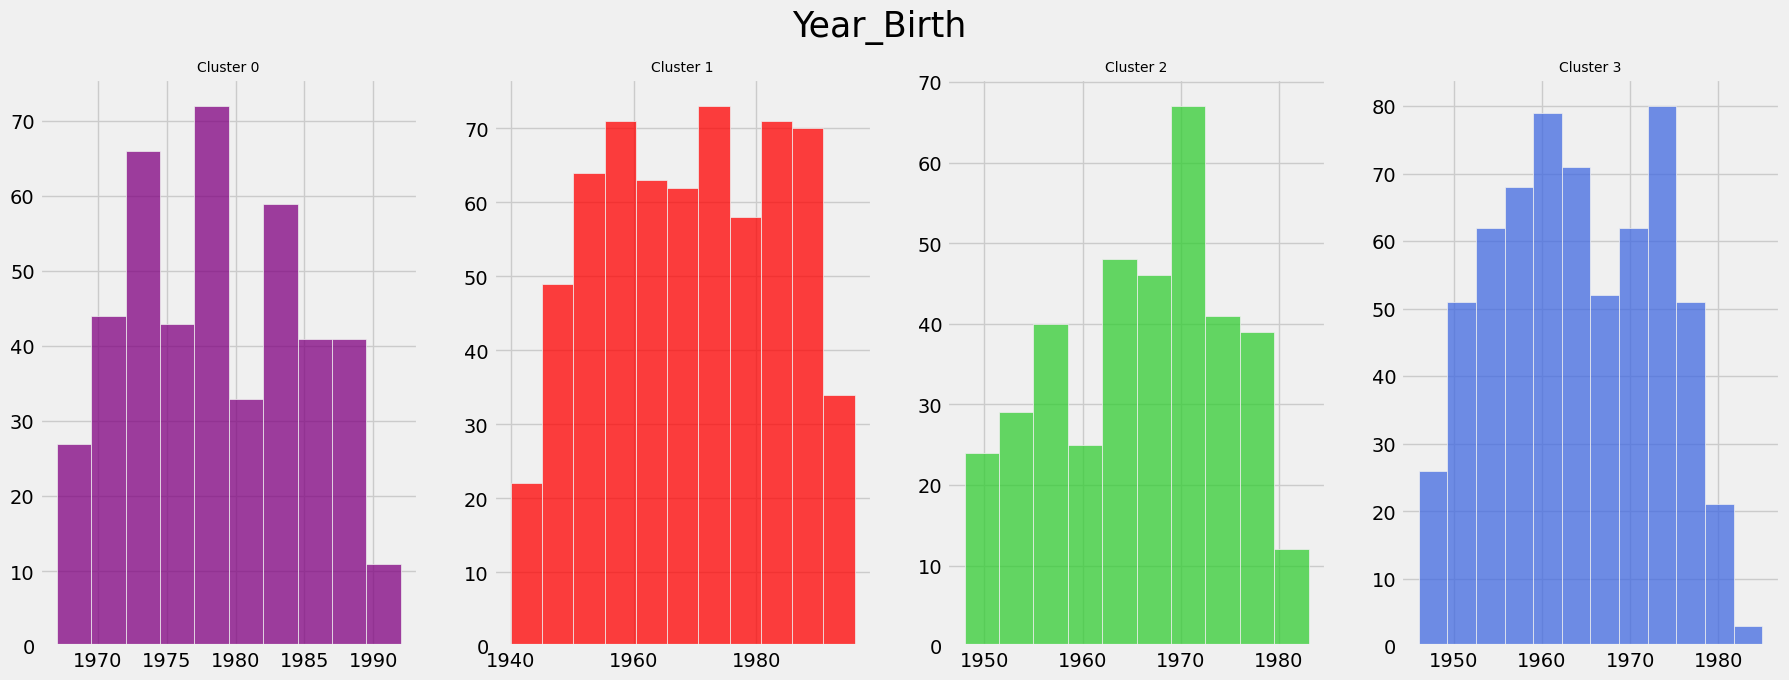

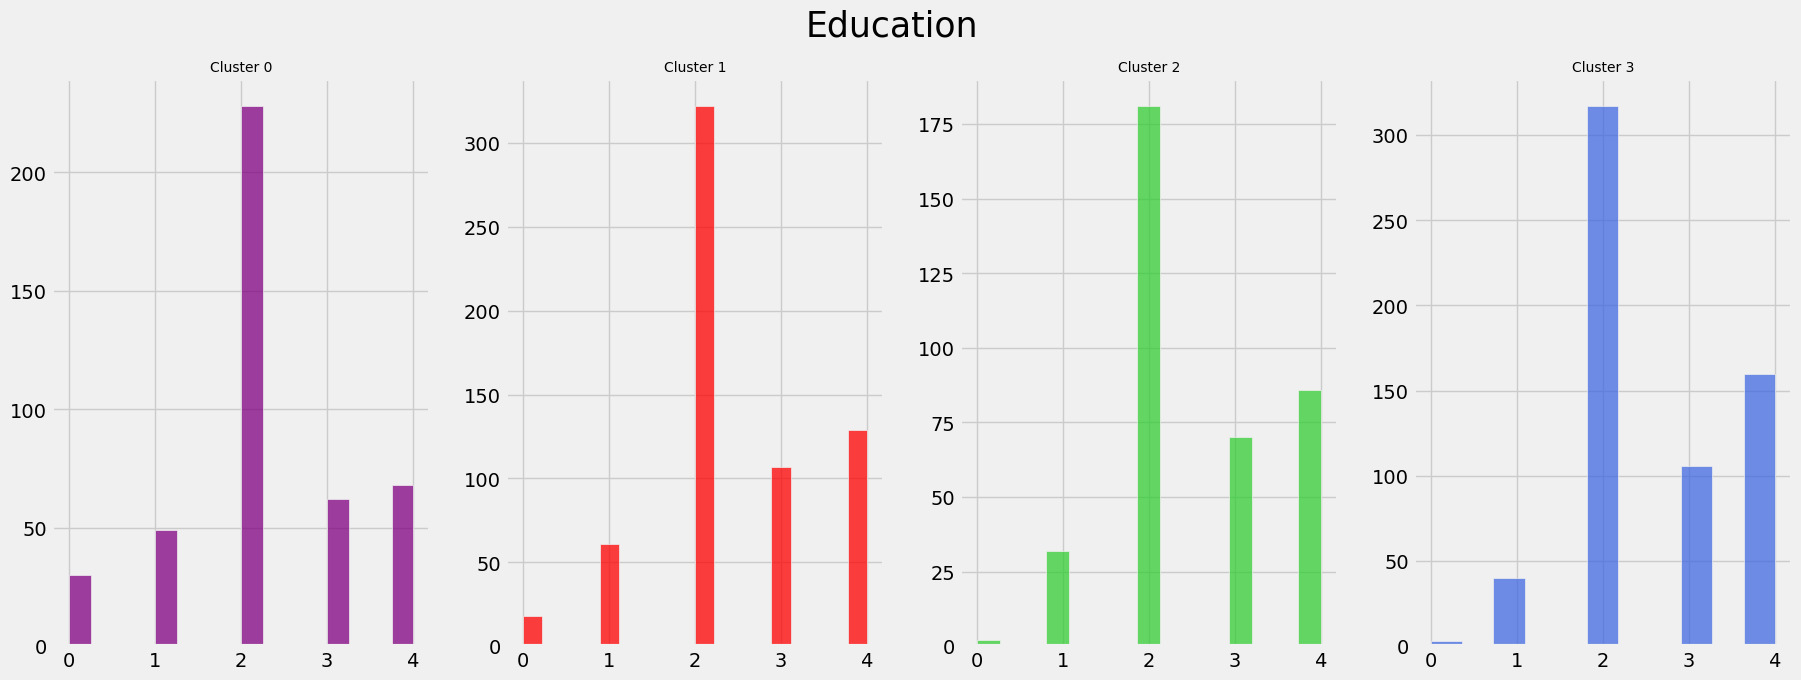

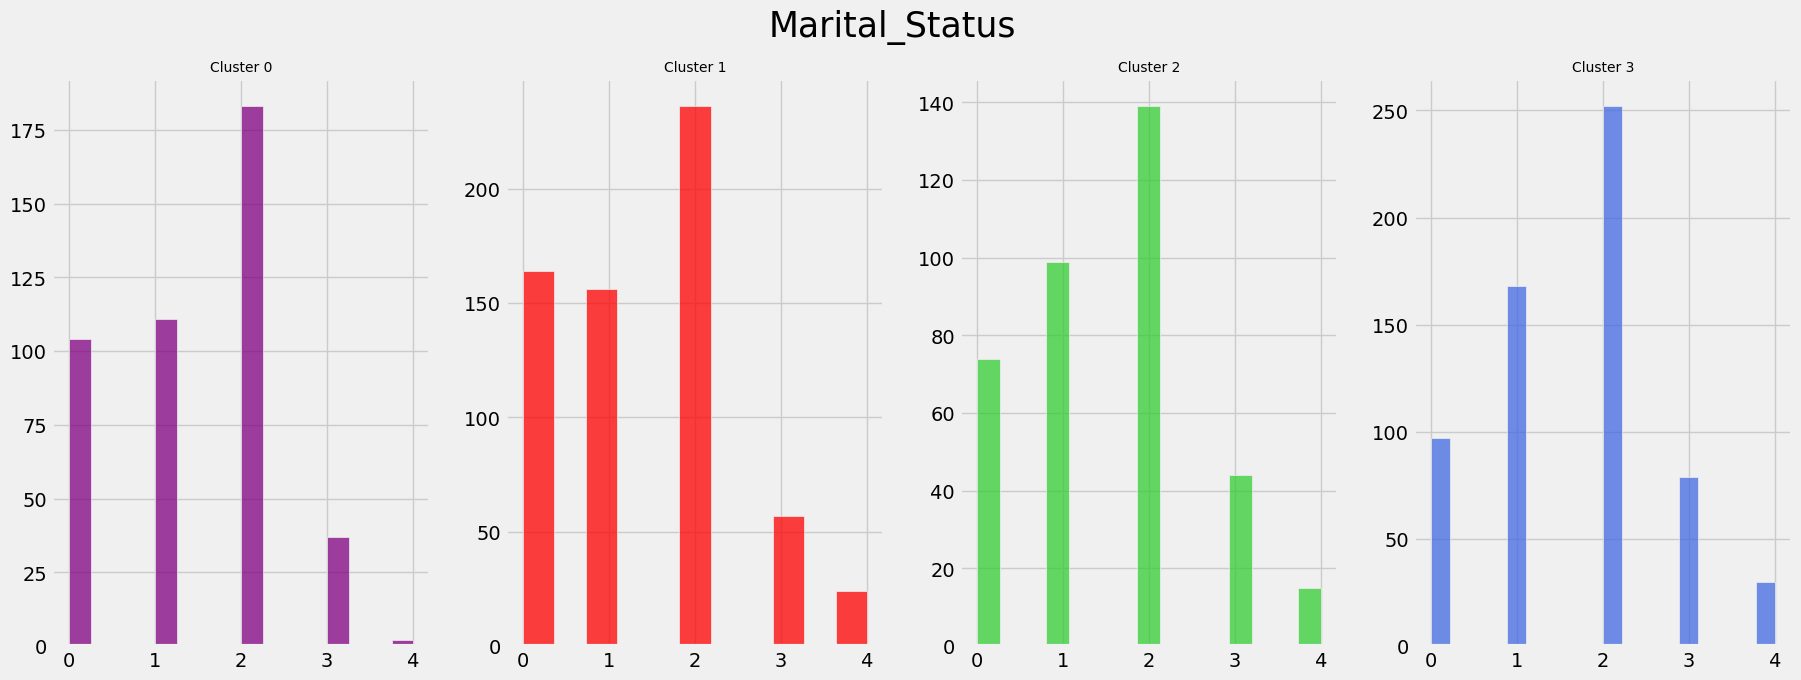

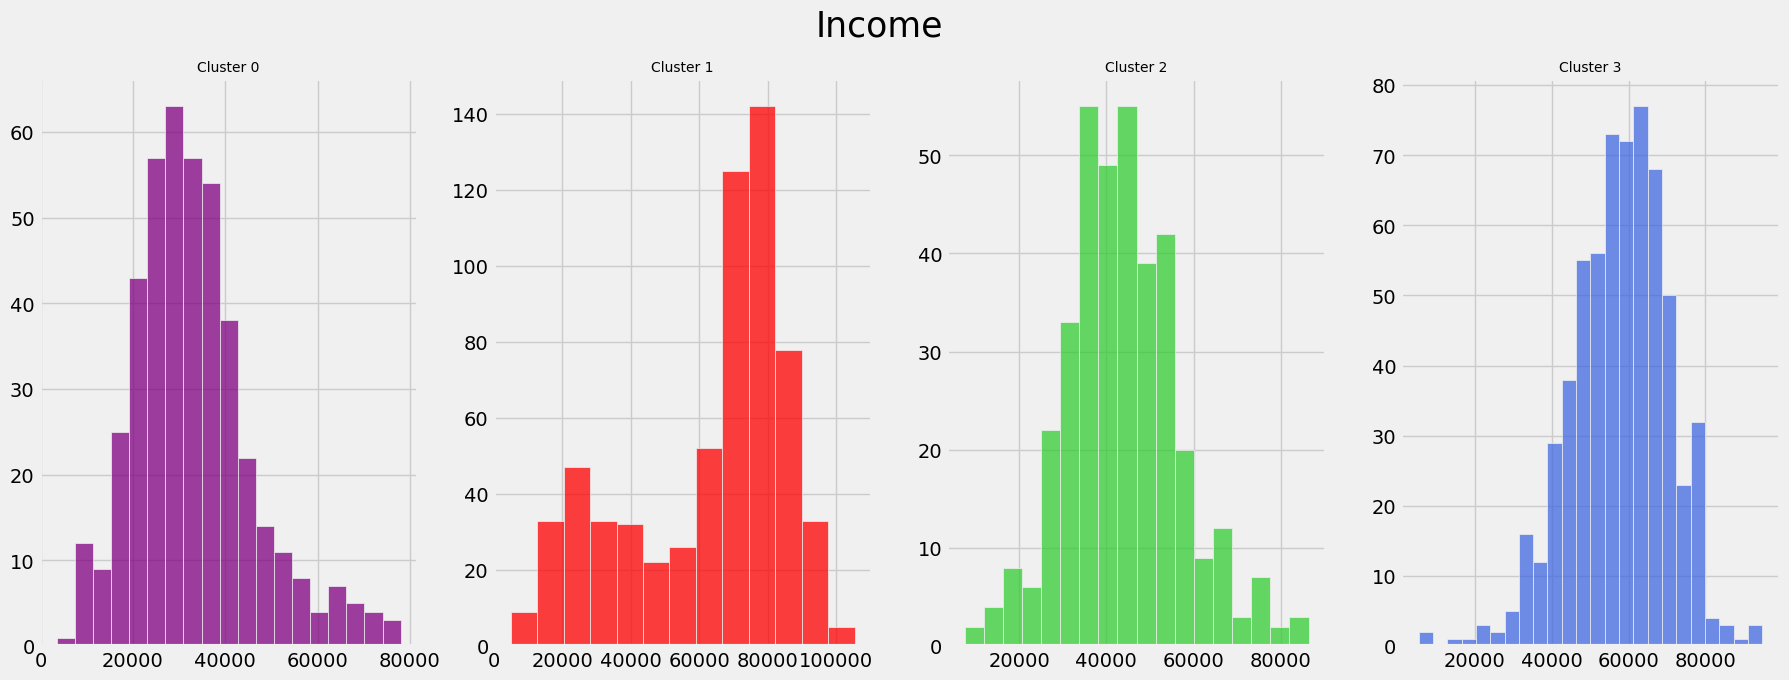

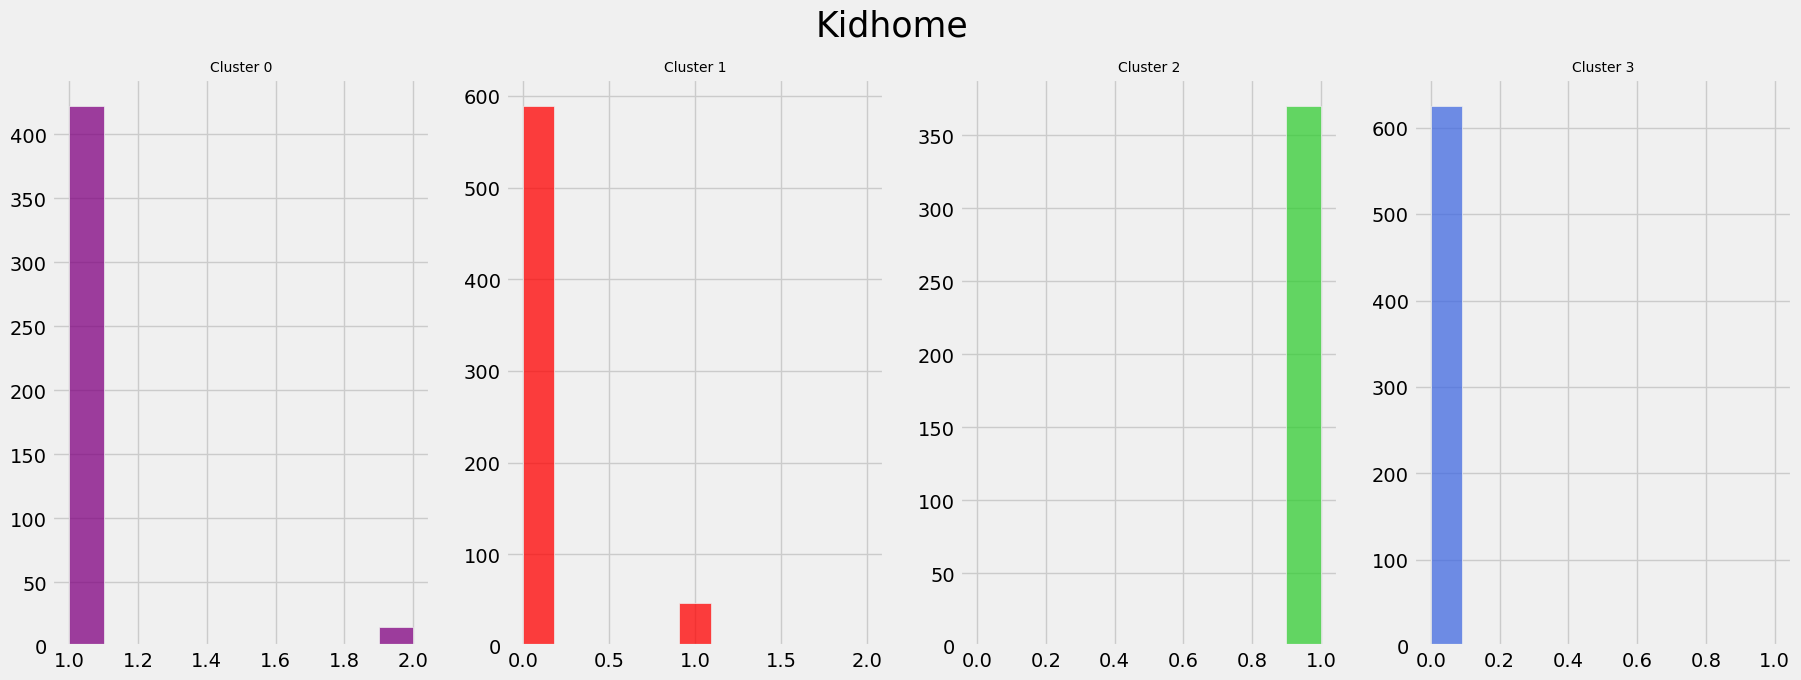

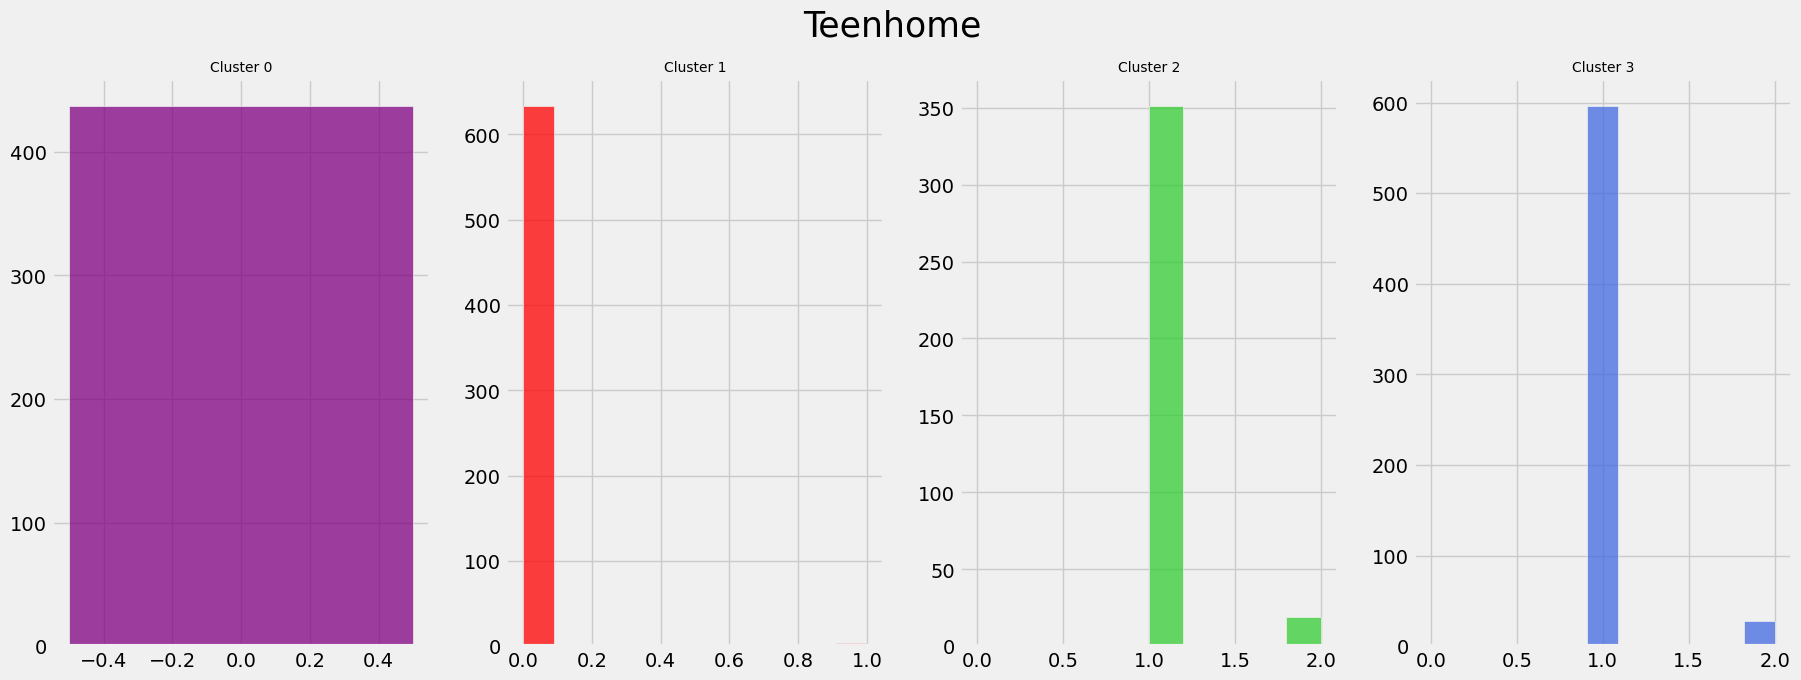

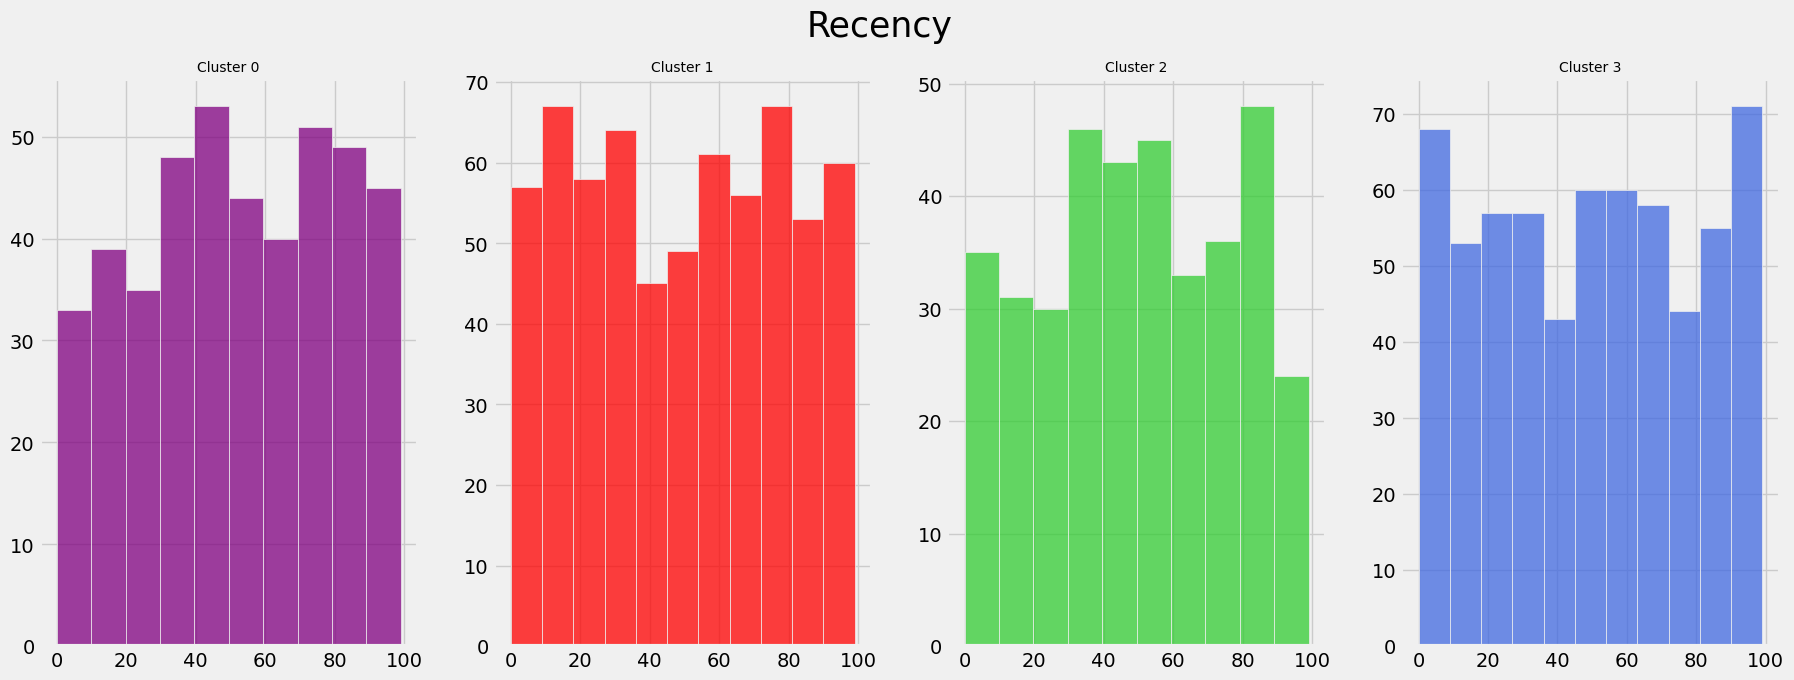

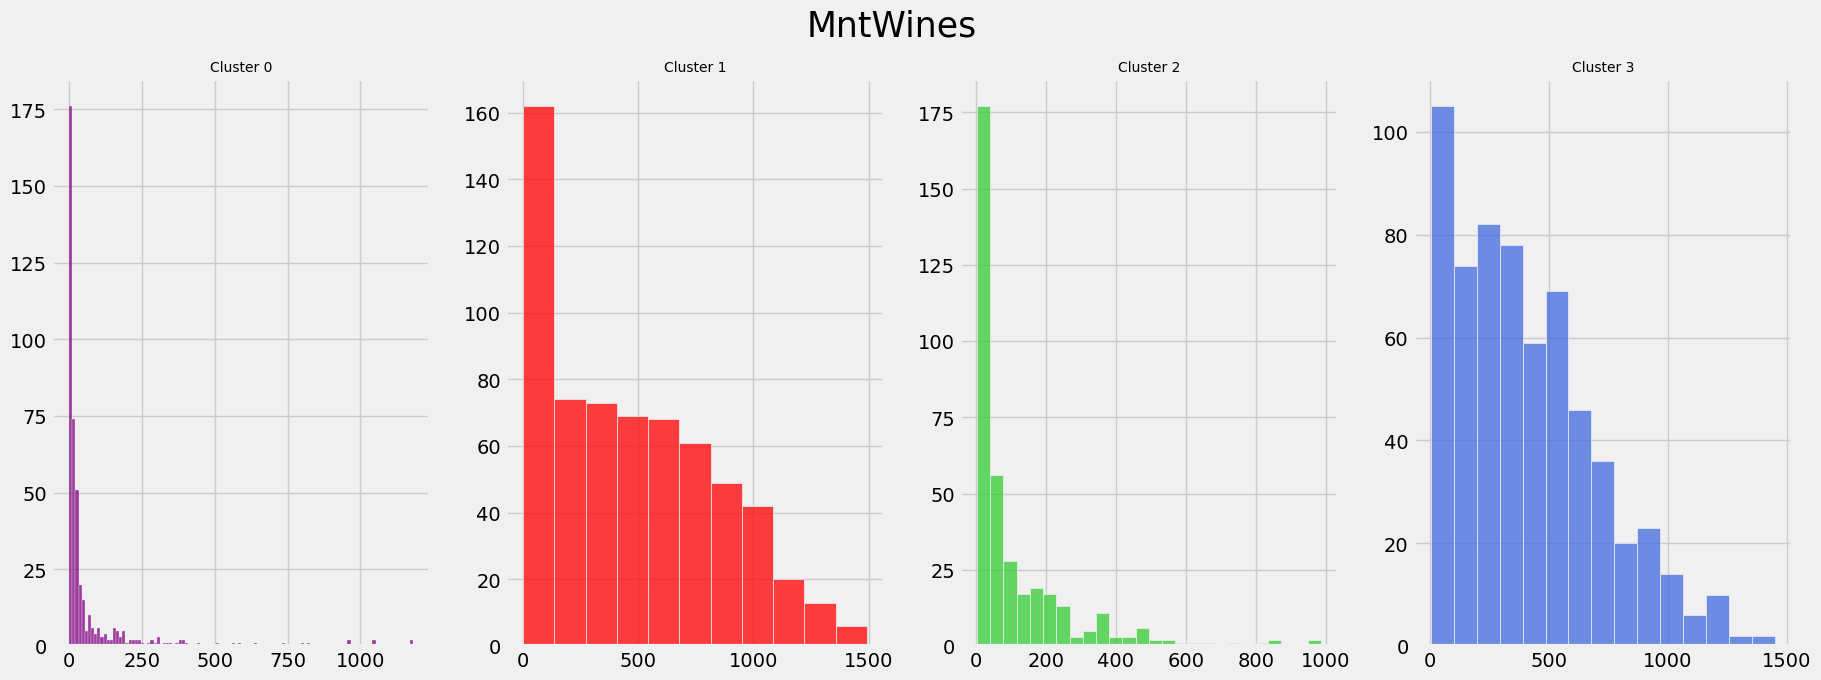

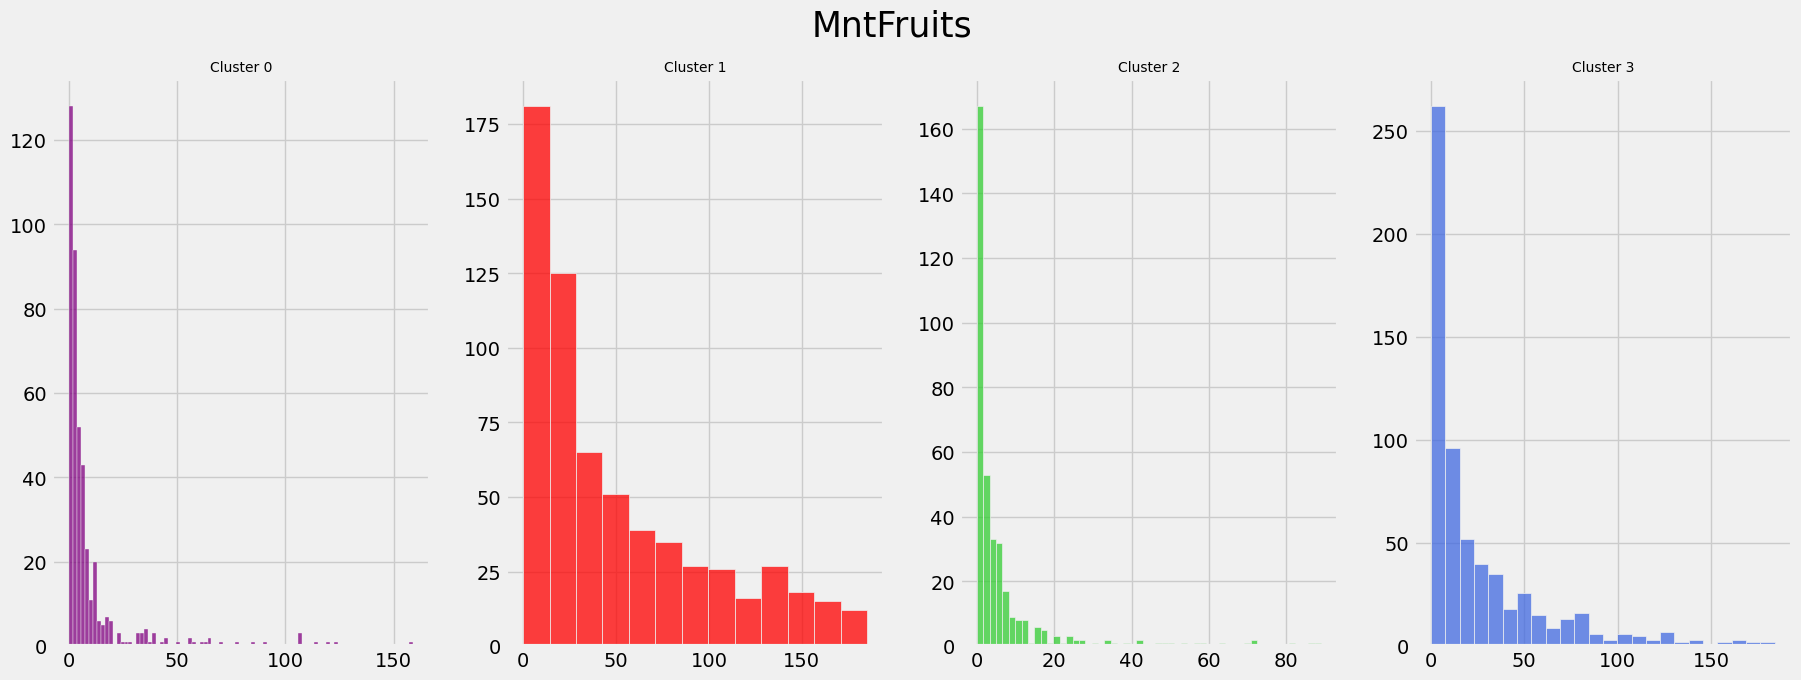

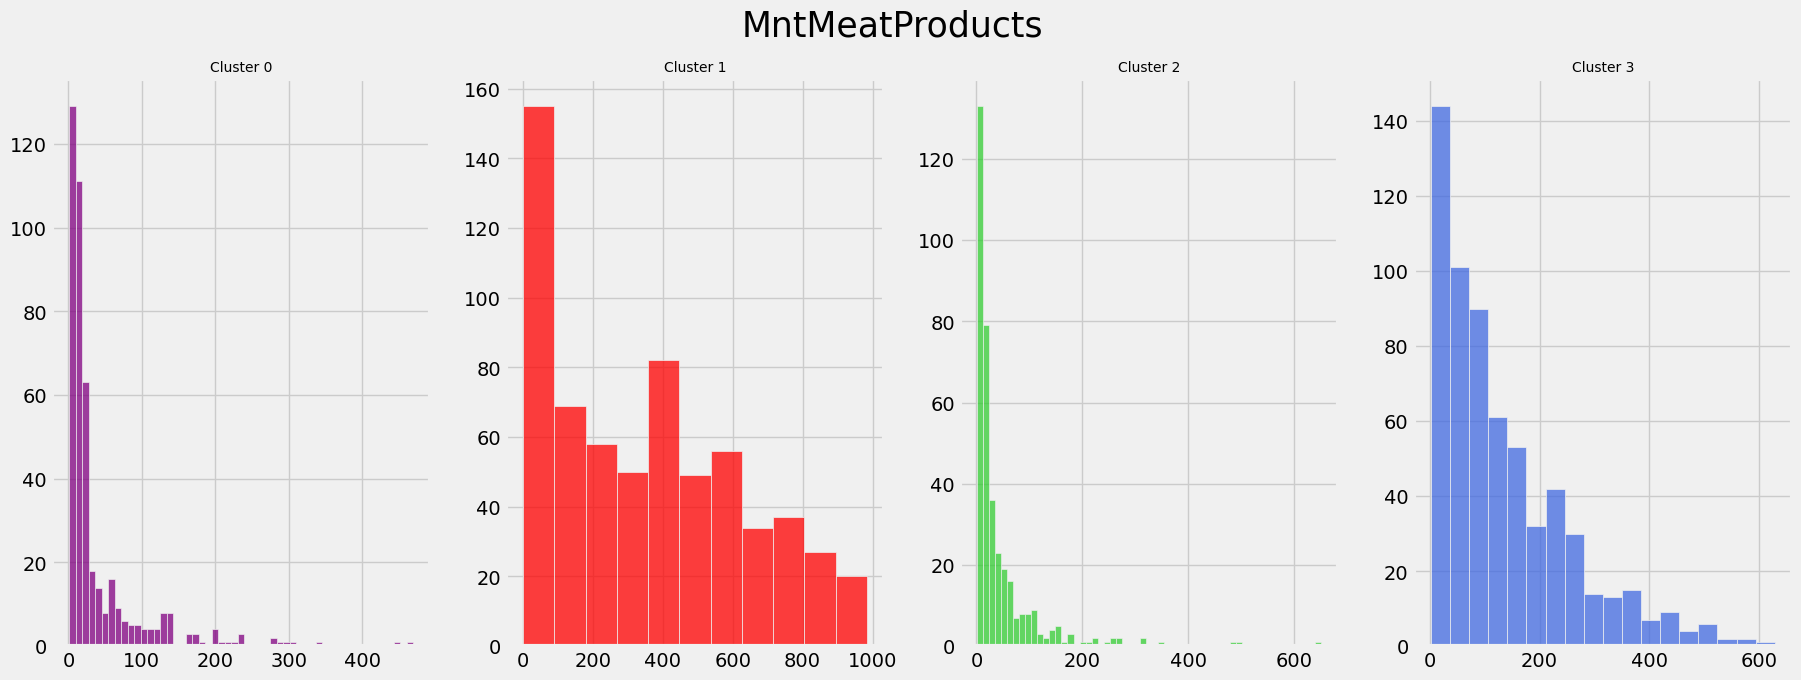

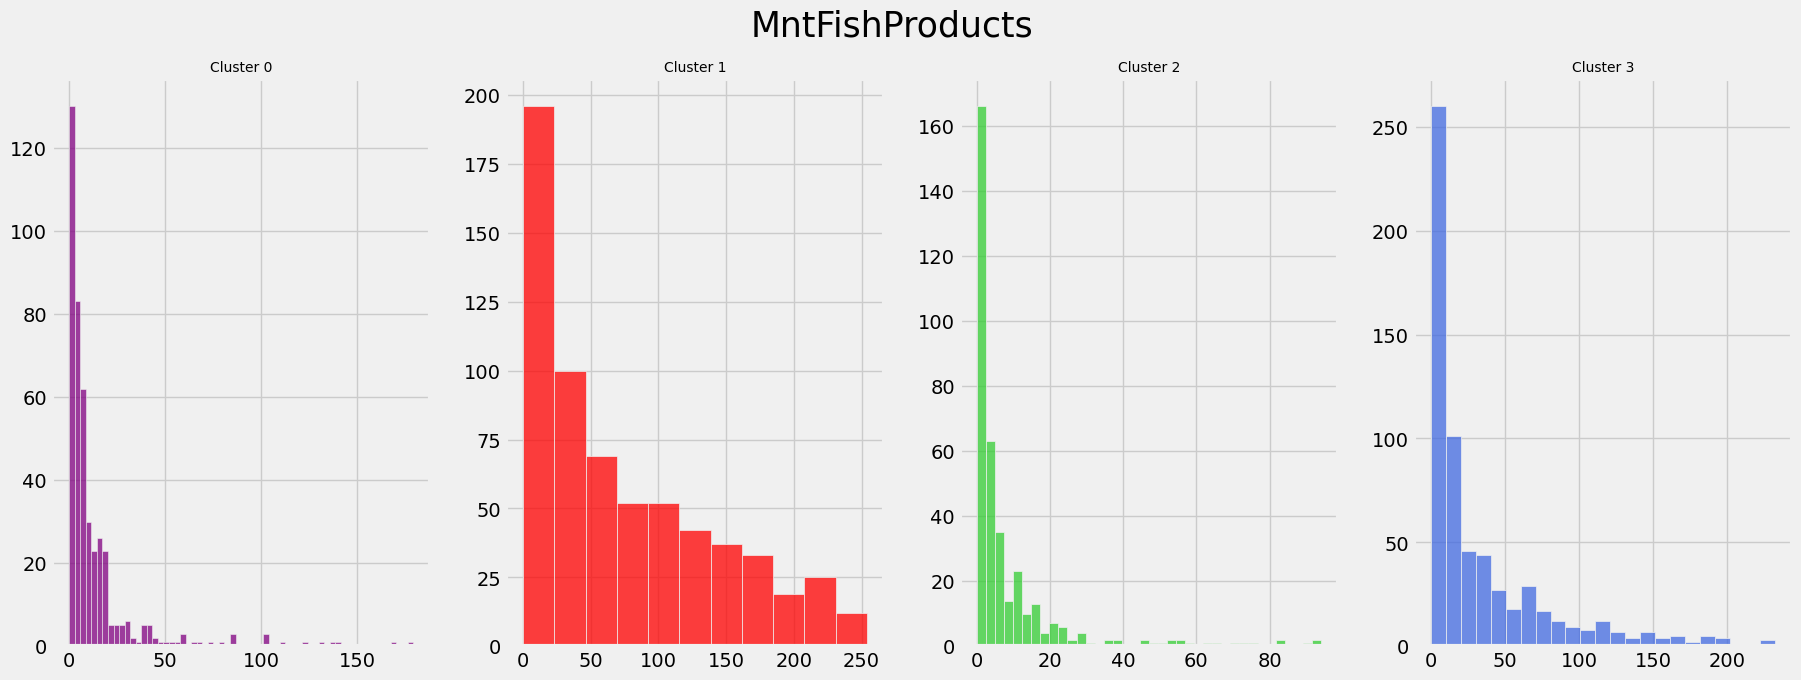

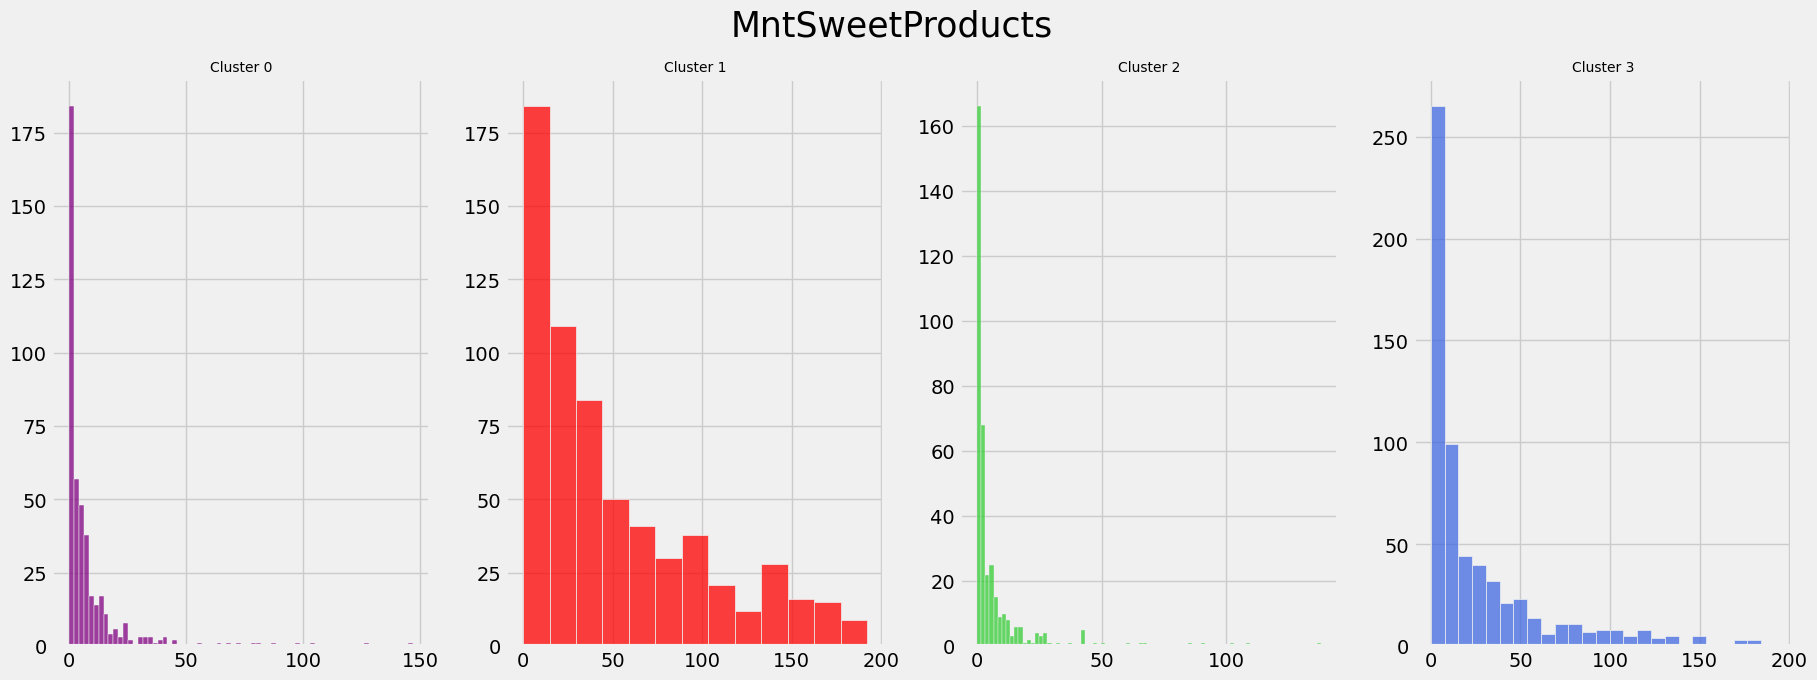

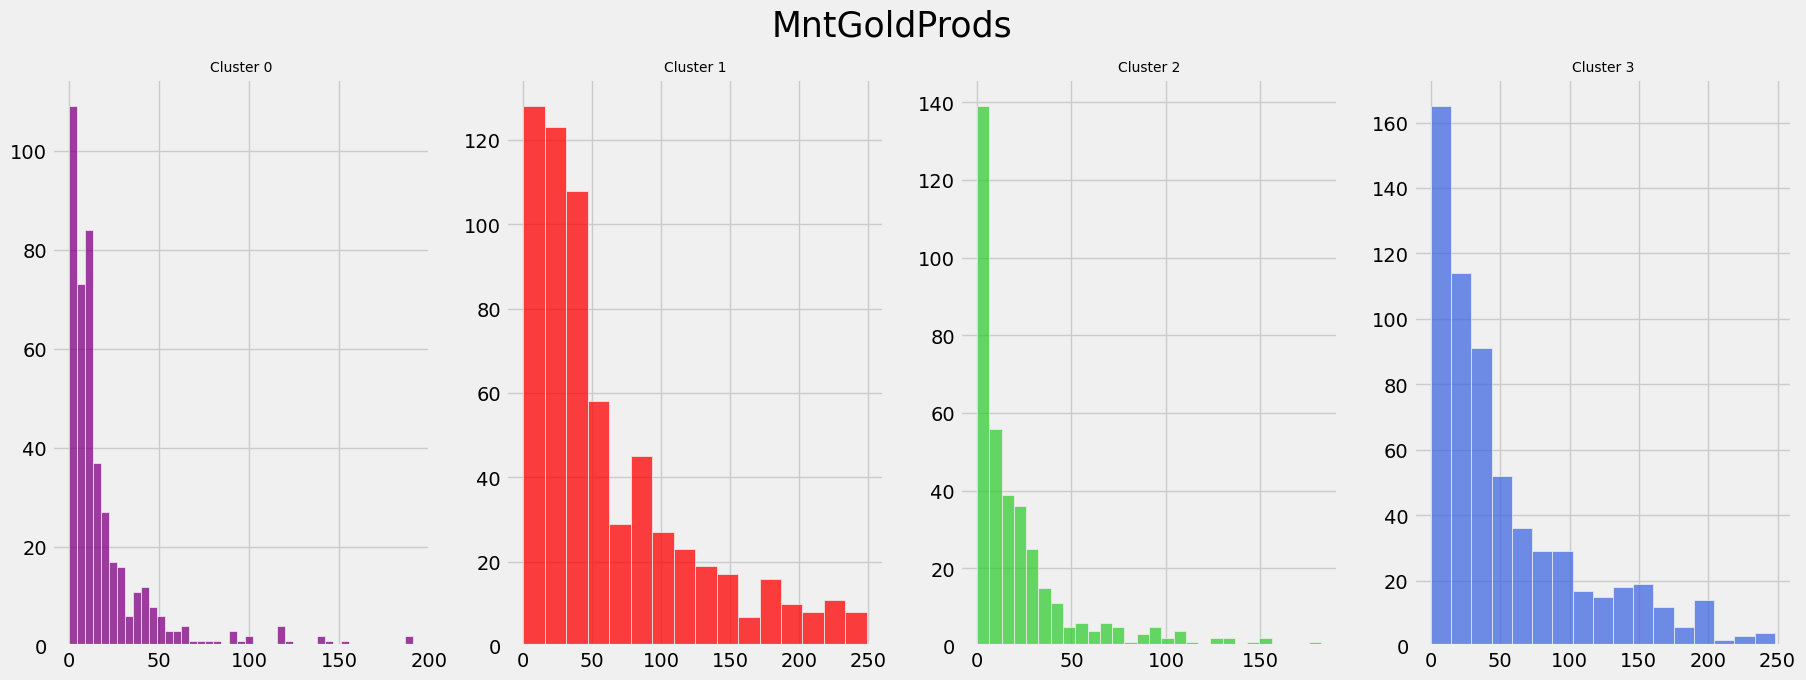

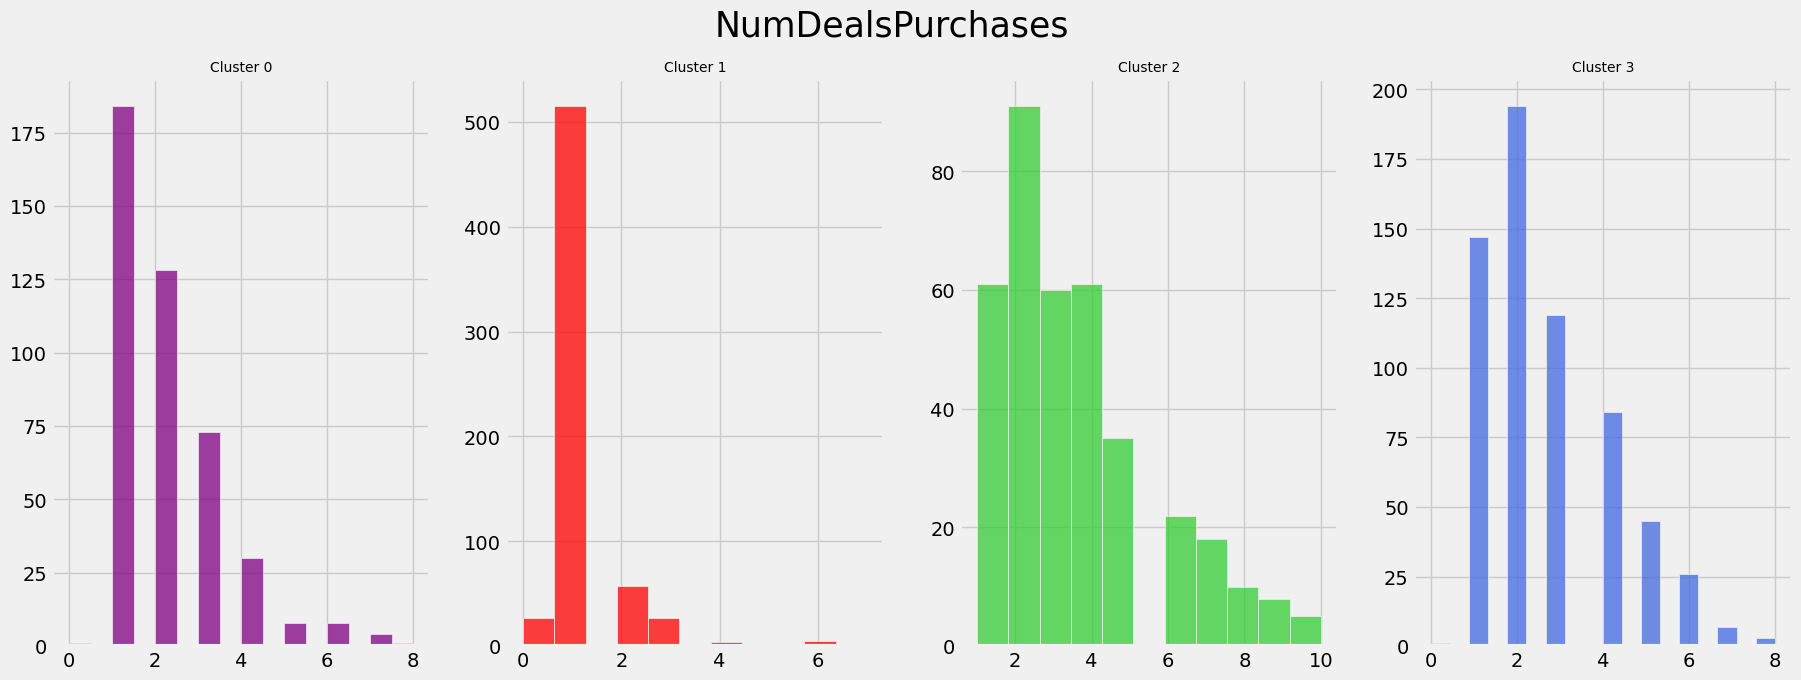

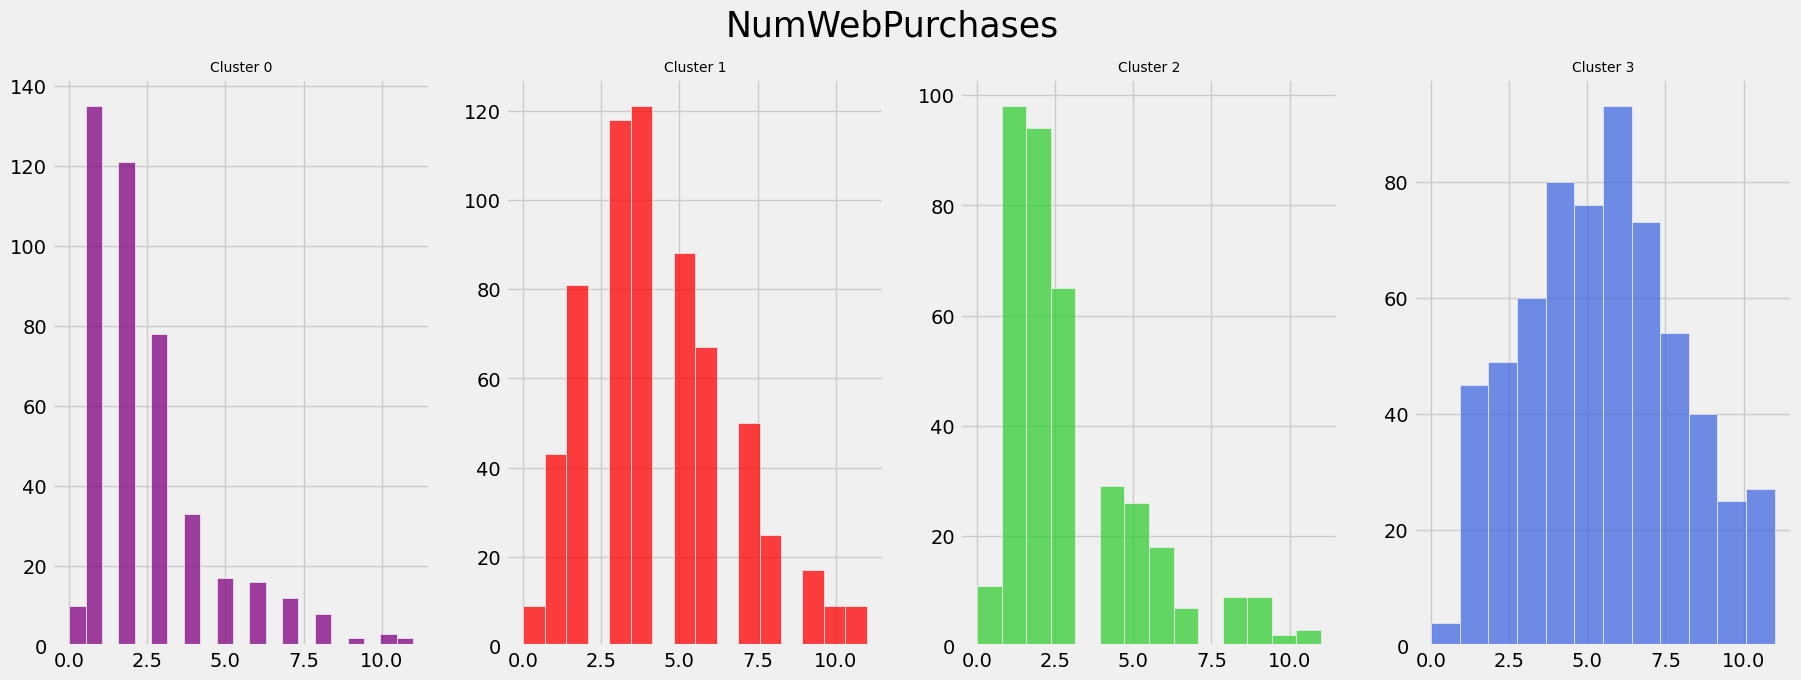

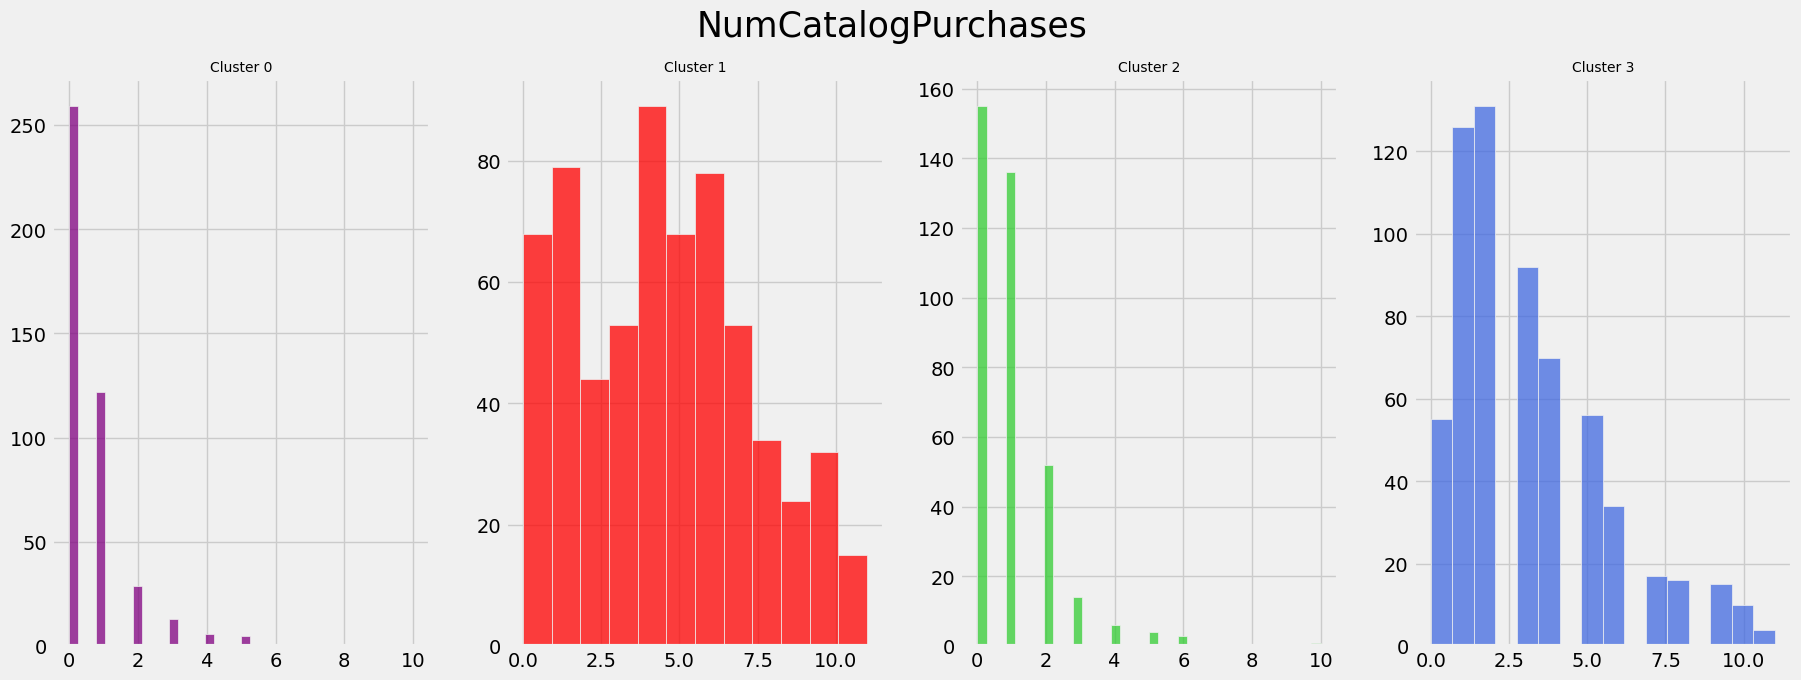

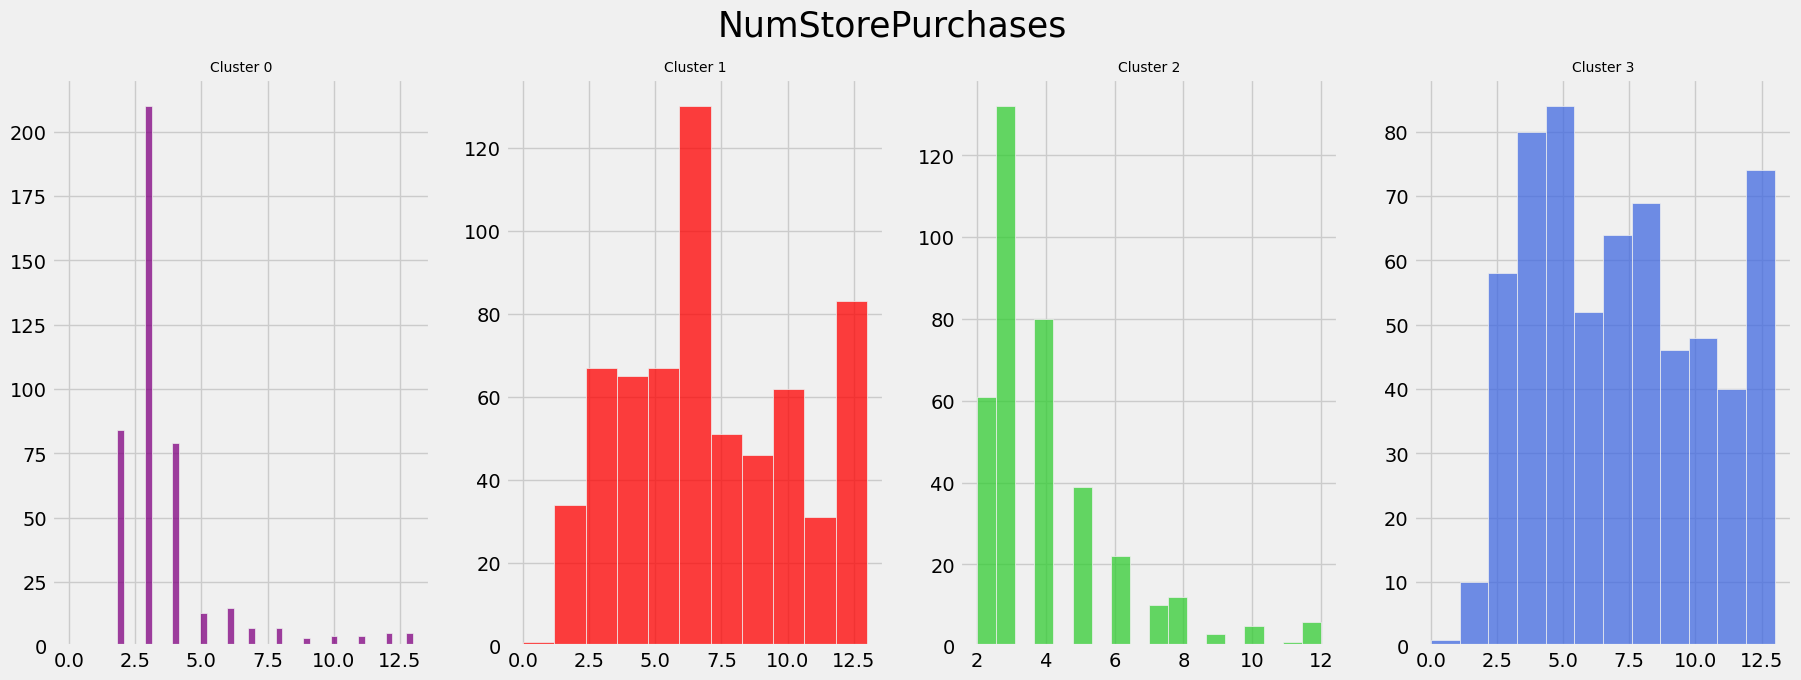

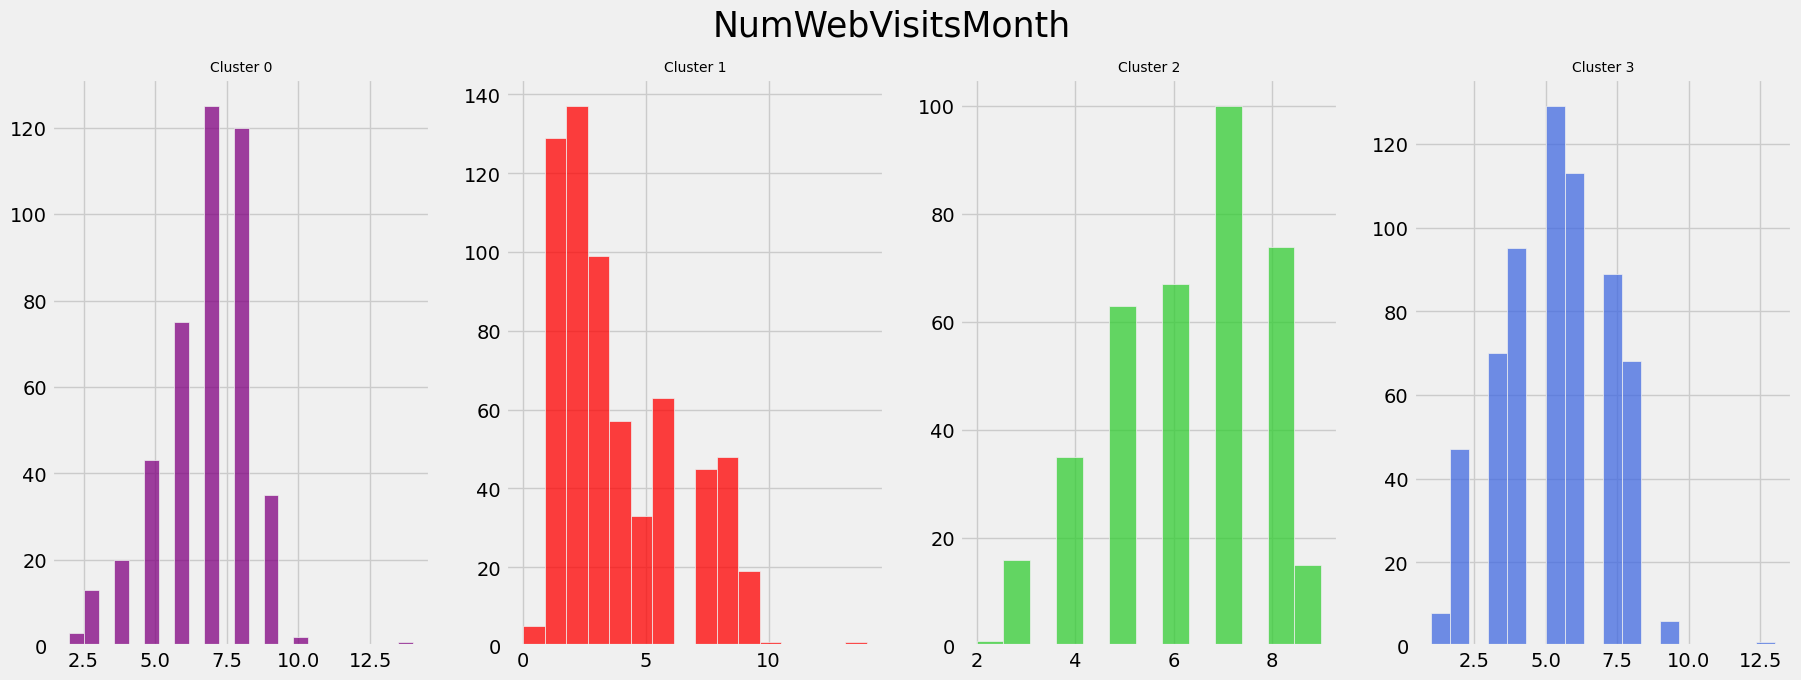

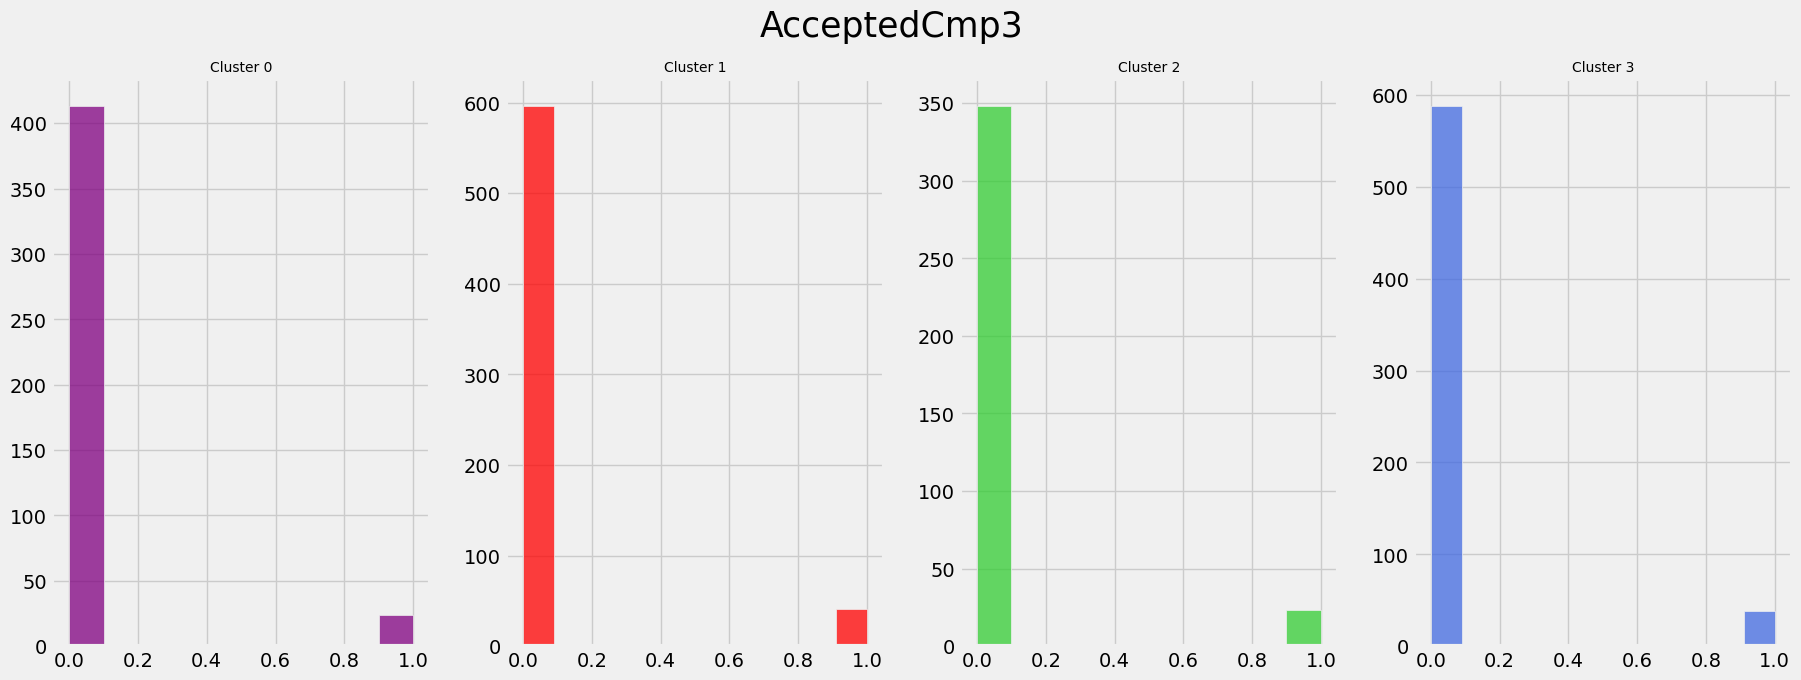

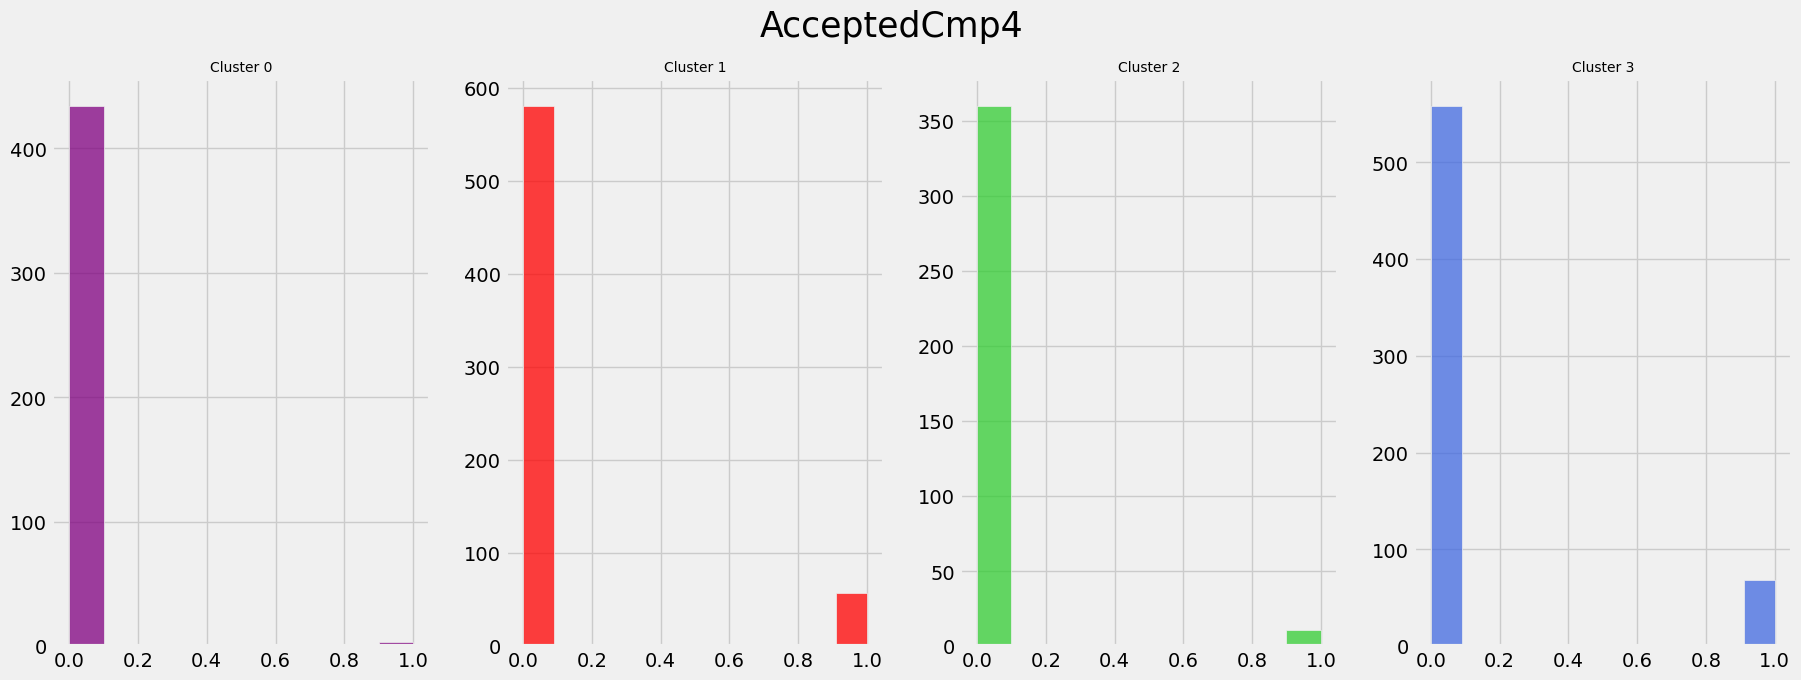

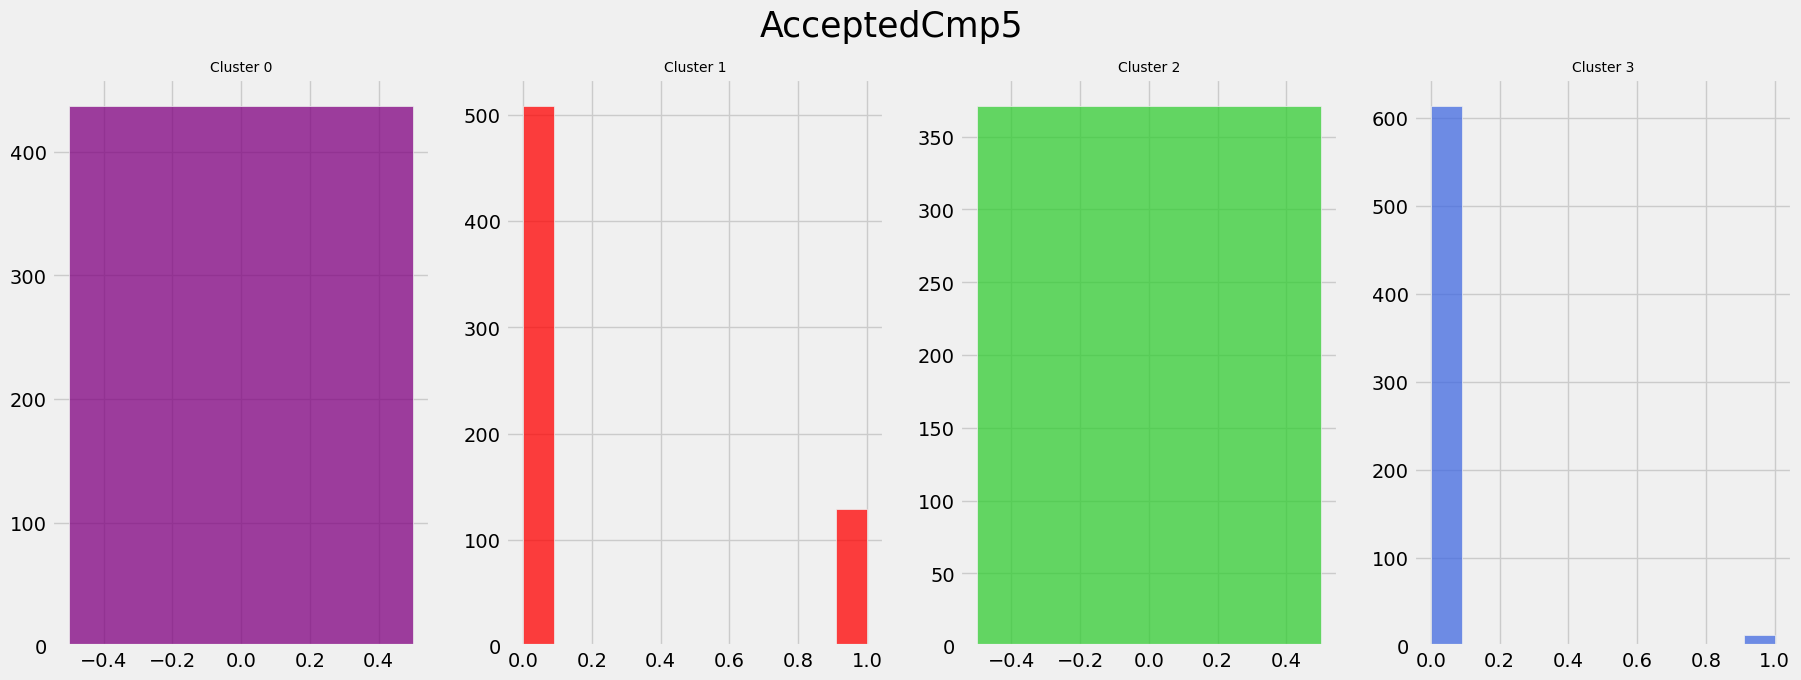

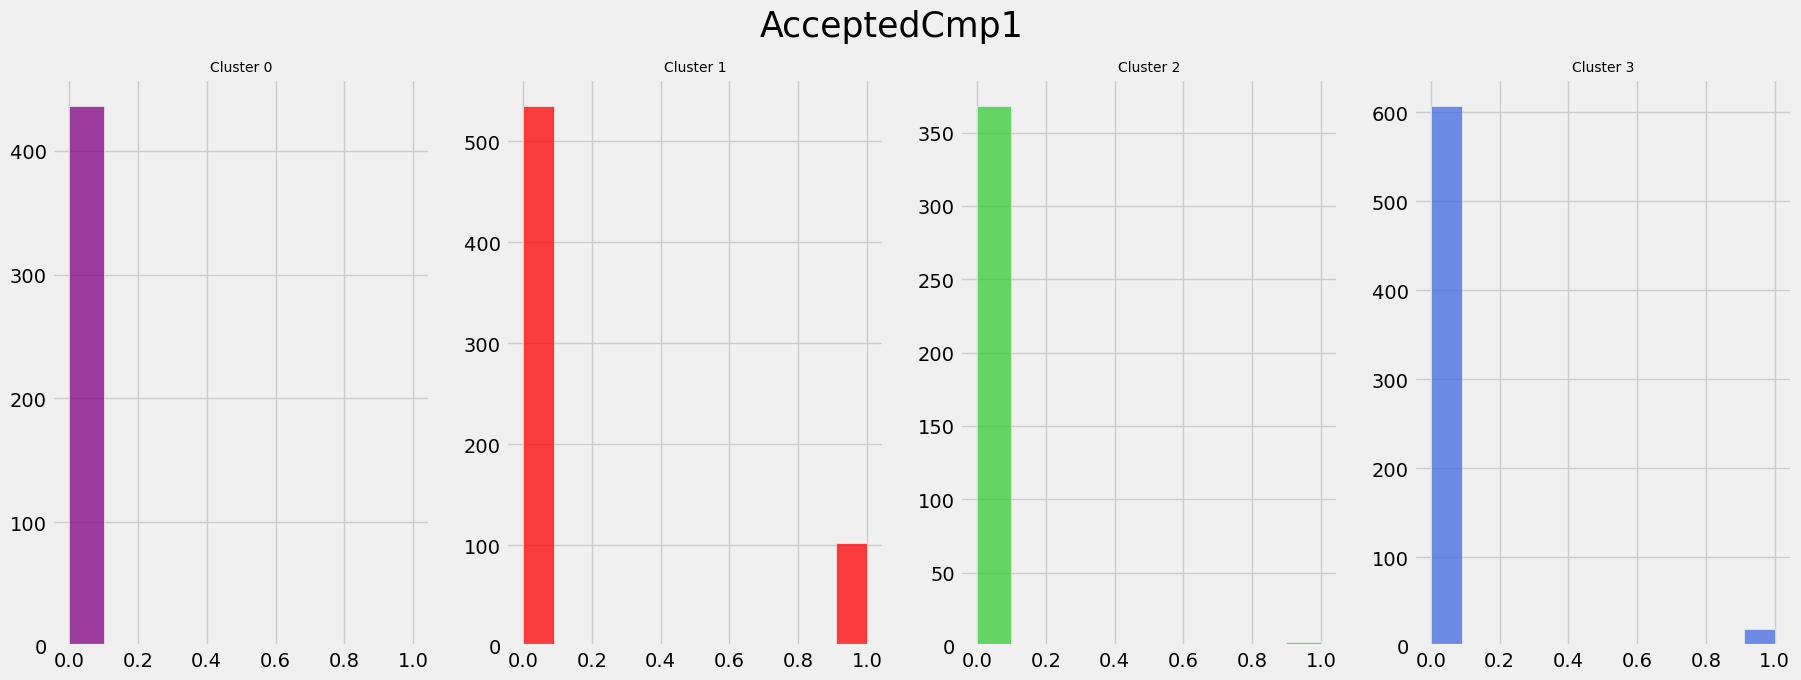

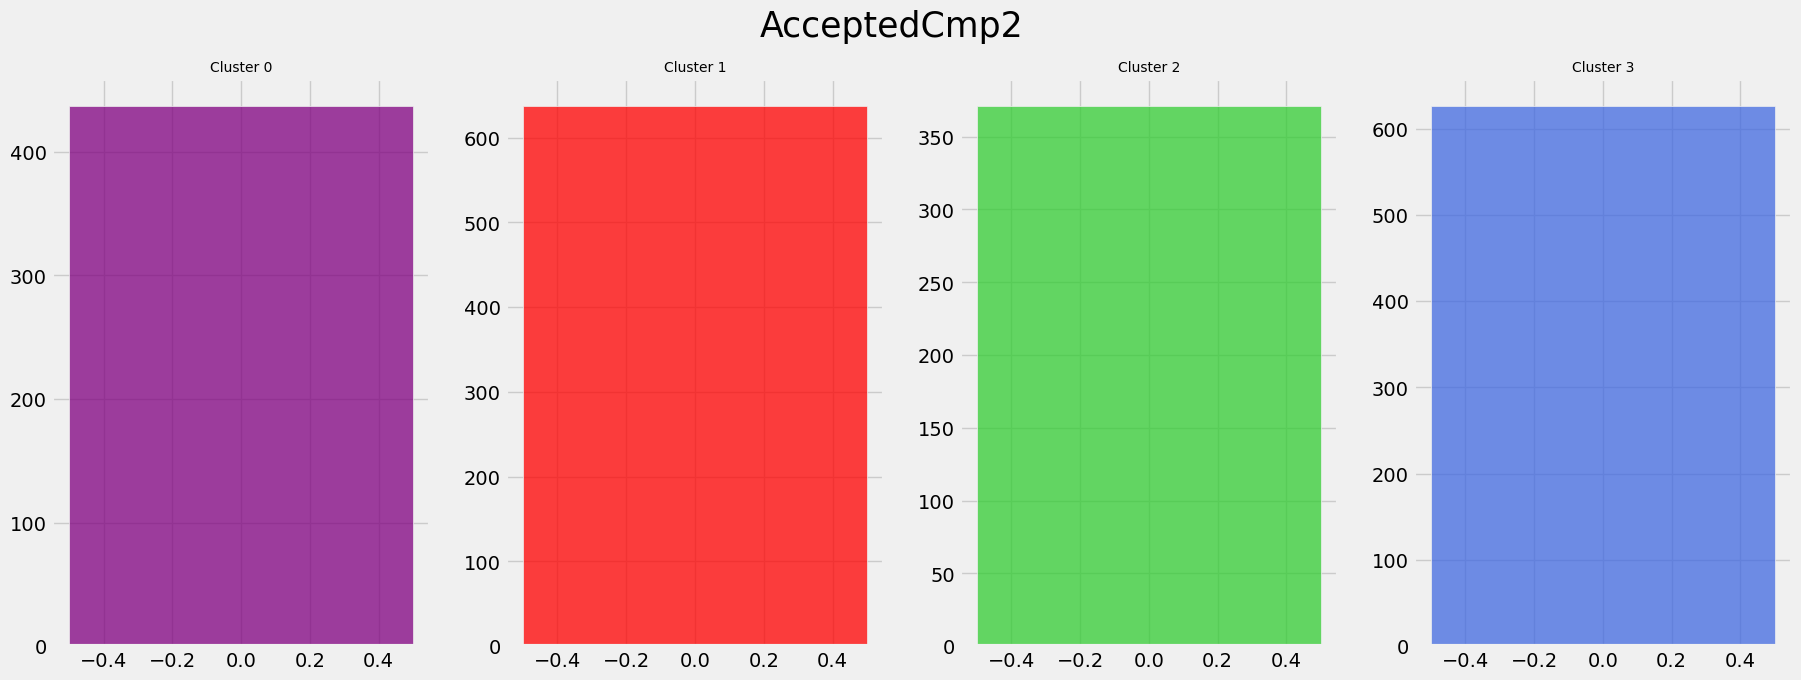

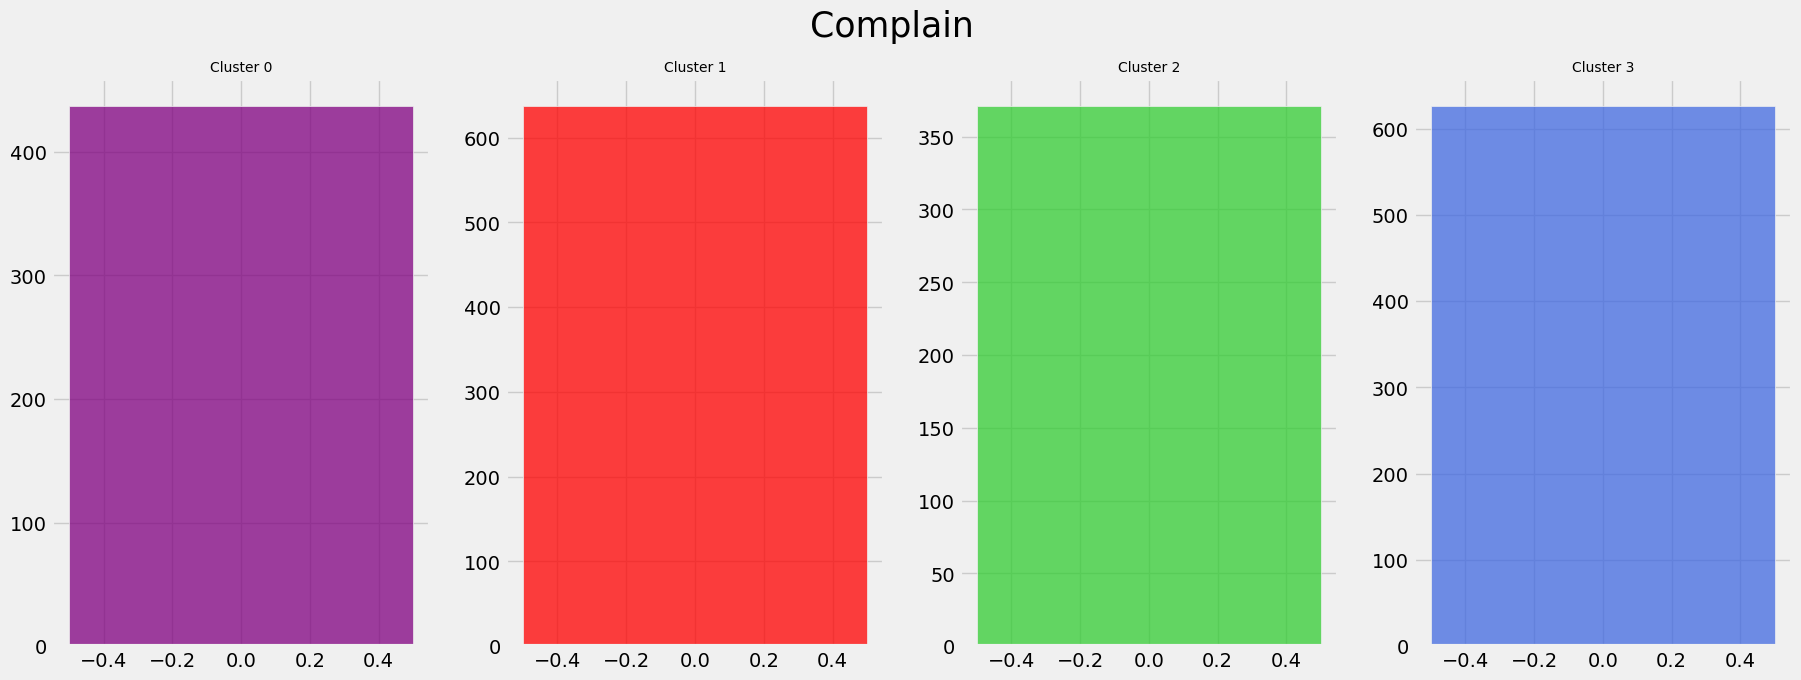

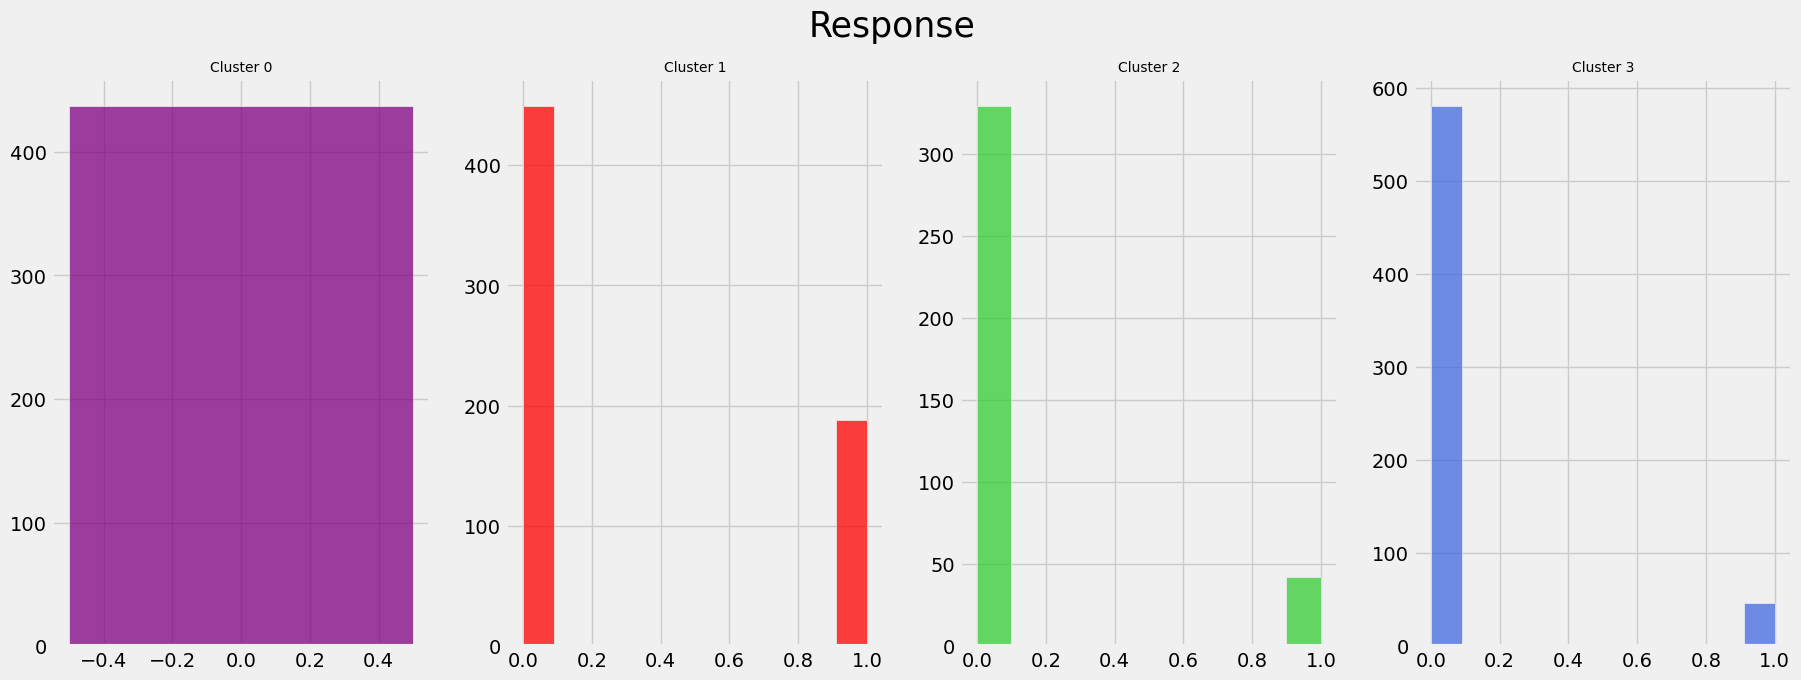

In [30]:
for col in data.columns:
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,7))
    fig.suptitle(col, fontsize=25)
    c = data[col]
    sns.histplot(x=c[clusterer.labels_==0], color="purple", ax=axes[0])
    sns.histplot(x=c[clusterer.labels_==1], color="red", ax=axes[1])
    sns.histplot(x=c[clusterer.labels_==2], color="limegreen", ax=axes[2])
    sns.histplot(x=c[clusterer.labels_==3], color="royalblue", ax=axes[3])
    for i in range(4):
        axes[i].set_xlabel(None)
        axes[i].set_ylabel(None)
        axes[i].set_title(f"Cluster {i}", fontsize=10)
plt.show()